# Tweet Sentiment Analysis - My approach

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

So the first step was to load the train and test set

In [120]:
train_data = pd.read_csv("./data/train_E6oV3lV.csv")
test_data = pd.read_csv("./data/test_tweets_anuFYb8.csv")

## Looking at the data

Here, we can check the first 5 entries of the dataset, in order to have a better perception of the data

In [121]:
train_data.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [122]:
import seaborn as sns

Now, I will check for how the classes are distributed

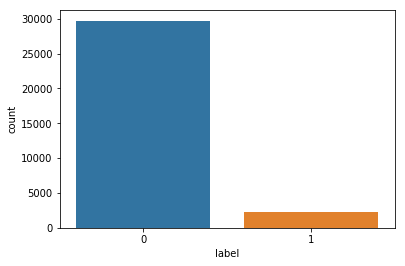

In [123]:
sns.countplot(x='label', data=train_data)

We can see that there is serious class imbalance. The class 0 (or non-hate speech class), has 29720 obbservation, and class 1 (or hate-speech class) has only 2242 observations

In [124]:
train_data.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

Next, I will drop the "ID" column, given that does not have any predictive power and when a dataset is imported using the Pandas package, a "Index" column is created, as we can see below

In [125]:
train_data.drop(['id'],axis=1,inplace=True)
test_data.drop(['id'],axis=1,inplace=True)

In [126]:
train_data.head()

label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation

In [127]:
train_data[train_data.label == 0].head(10)

label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation
5      0  [2/2] huge fan fare and big talking before the...
6      0   @user camping tomorrow @user @user @user @use...
7      0  the next school year is the year for exams.ð...
8      0  we won!!! love the land!!! #allin #cavs #champ...
9      0   @user @user welcome here !  i'm   it's so #gr...

In [128]:
train_data[train_data.label == 1].head(10)

label                                              tweet
13       1  @user #cnn calls #michigan middle school 'buil...
14       1  no comment!  in #australia   #opkillingbay #se...
17       1                             retweet if you agree! 
23       1    @user @user lumpy says i am a . prove it lumpy.
34       1  it's unbelievable that in the 21st century we'...
56       1            @user lets fight against  #love #peace 
68       1  ð©the white establishment can't have blk fol...
77       1  @user hey, white people: you can call people '...
82       1  how the #altright uses  &amp; insecurity to lu...
111      1  @user i'm not interested in a #linguistics tha...

## Initial Feature Engineering

In [129]:
train_data['pre_clean_len'] = [len(t) for t in train_data.tweet]

Given that, in the NLP field (and the machine learning field in general), feature extraction is the most difficult part of a project and for sanity purposes, I wanted to check the pre-cleaning tweet lenght and the post tweet length (a little later on...)

In [130]:
train_data[train_data.label == 0].head(10)

label                                              tweet  pre_clean_len
0      0   @user when a father is dysfunctional and is s...            102
1      0  @user @user thanks for #lyft credit i can't us...            122
2      0                                bihday your majesty             21
3      0  #model   i love u take with u all the time in ...             86
4      0             factsguide: society now    #motivation             39
5      0  [2/2] huge fan fare and big talking before the...            116
6      0   @user camping tomorrow @user @user @user @use...             74
7      0  the next school year is the year for exams.ð...            143
8      0  we won!!! love the land!!! #allin #cavs #champ...             87
9      0   @user @user welcome here !  i'm   it's so #gr...             50

In [131]:
train_data[train_data.label == 1].head(10)

label                                              tweet  pre_clean_len
13       1  @user #cnn calls #michigan middle school 'buil...             74
14       1  no comment!  in #australia   #opkillingbay #se...            101
17       1                             retweet if you agree!              22
23       1    @user @user lumpy says i am a . prove it lumpy.             47
34       1  it's unbelievable that in the 21st century we'...            104
56       1            @user lets fight against  #love #peace              39
68       1  ð©the white establishment can't have blk fol...            110
77       1  @user hey, white people: you can call people '...             87
82       1  how the #altright uses  &amp; insecurity to lu...             77
111      1  @user i'm not interested in a #linguistics tha...            129

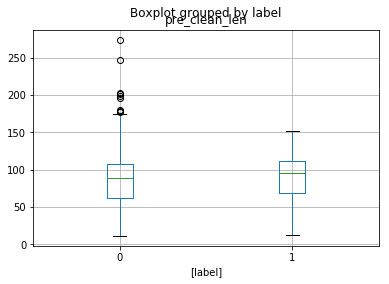

In [132]:
train_data.boxplot(by='label')

So, checking the boxplot and the IQR measure, we see that the median of the pre-clean lenght is pretty similar, but the 75% quartile, of classe 0 is quite far from the same measure of class 1. Is this significant enough for me to use this as feature? Probably not. Moving on...

In [133]:
train_data['num_exclamation'] = [t.count("!") for t in train_data.tweet]

Given that, in the NLP field (and the machine learning field in general), feature extraction is the most difficult part of a project, I just wanted to check if one class had more exclamation marks than the other (the hypothesis for testing would be that hate speech tweets had more exclamation marks than non-hate speech)

In [134]:
train_data.head()

label                                              tweet  pre_clean_len  \
0      0   @user when a father is dysfunctional and is s...            102   
1      0  @user @user thanks for #lyft credit i can't us...            122   
2      0                                bihday your majesty             21   
3      0  #model   i love u take with u all the time in ...             86   
4      0             factsguide: society now    #motivation             39   

   num_exclamation  
0                0  
1                0  
2                0  
3                3  
4                0

As we can see from the plot below, that, contrary to what I thought, there are more exclamation marks in the positive tweets than in the negative tweets. Even so, the difference is not significant, so using this as feature in the learning algorithm, is probably not a good idea. Moving on...

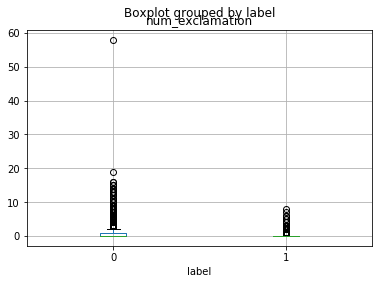

In [135]:
train_data.boxplot(column='num_exclamation', by='label')

## Cleaning the data

Now, I will move on to the cleaning part. The first step, in my view, was to remove the "@user" mentions, given that these were anonamyzed. The function below, can work with any regular expression and removes every occurence.

In [136]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [137]:
import re
train_data['new_tweet'] = np.vectorize(remove_pattern)(train_data['tweet'], "@[\w]*")
test_data['new_tweet'] = np.vectorize(remove_pattern)(test_data['tweet'], "@[\w]*")

For sanity reasons, lets check the first 5 entries of the data set, now with a new column, "new_tweet", with the user mentions removed.

In [138]:
train_data.head()

label                                              tweet  pre_clean_len  \
0      0   @user when a father is dysfunctional and is s...            102   
1      0  @user @user thanks for #lyft credit i can't us...            122   
2      0                                bihday your majesty             21   
3      0  #model   i love u take with u all the time in ...             86   
4      0             factsguide: society now    #motivation             39   

   num_exclamation                                          new_tweet  
0                0    when a father is dysfunctional and is so sel...  
1                0    thanks for #lyft credit i can't use cause th...  
2                0                                bihday your majesty  
3                3  #model   i love u take with u all the time in ...  
4                0             factsguide: society now    #motivation

Now I will lowercase every word in the column that I created above.

In [139]:
train_data['new_tweet'] = train_data['new_tweet'].str.lower()
test_data['new_tweet'] = test_data['new_tweet'].str.lower()

Below, I have the main cleaning function. This function does the following tasks:

- Remove HTML characters that are not useful (Using BeautifulSoup package).
- Remove encoding characters and errors.
- Check for abbbreviations of common words in english.
- Remove non-character symbols
- Tokenize each tweet using the NLTK Tokenizer

In [140]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
from bs4 import BeautifulSoup

In [141]:
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def clean_tweet(text):
    soup = BeautifulSoup(text, "html5lib")
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], bom_removed)
    letters = re.sub("[^a-zA-Z]", " ", neg_handled)
    letters_only = re.sub("amp","", letters)
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

Applying the function above to the "new_tweet" column...

In [142]:
train_data['new_tweet'] = train_data['new_tweet'].apply(clean_tweet)
test_data['new_tweet'] = test_data['new_tweet'].apply(clean_tweet)

Checking again (sanity reasons) the result of applying this function...

In [143]:
train_data.head()

label                                              tweet  pre_clean_len  \
0      0   @user when a father is dysfunctional and is s...            102   
1      0  @user @user thanks for #lyft credit i can't us...            122   
2      0                                bihday your majesty             21   
3      0  #model   i love u take with u all the time in ...             86   
4      0             factsguide: society now    #motivation             39   

   num_exclamation                                          new_tweet  
0                0  when father is dysfunctional and is so selfish...  
1                0  thanks for lyft credit can not use cause they ...  
2                0                                bihday your majesty  
3                3            model love take with all the time in ur  
4                0                  factsguide society now motivation

Again a little bit of creative feature engineering and sanity reasons: check the length of the tweets after cleaning

In [144]:
train_data['post_clean_len'] = [len(t) for t in train_data.new_tweet]

In [145]:
train_data.head()

label                                              tweet  pre_clean_len  \
0      0   @user when a father is dysfunctional and is s...            102   
1      0  @user @user thanks for #lyft credit i can't us...            122   
2      0                                bihday your majesty             21   
3      0  #model   i love u take with u all the time in ...             86   
4      0             factsguide: society now    #motivation             39   

   num_exclamation                                          new_tweet  \
0                0  when father is dysfunctional and is so selfish...   
1                0  thanks for lyft credit can not use cause they ...   
2                0                                bihday your majesty   
3                3            model love take with all the time in ur   
4                0                  factsguide society now motivation   

   post_clean_len  
0              89  
1             104  
2              19  
3              39  
4              33

Checking for missing values...

In [146]:
train_data[train_data.isnull().any(axis=1)].head()

Empty DataFrame
Columns: [label, tweet, pre_clean_len, num_exclamation, new_tweet, post_clean_len]
Index: []

## Exploratory Data Analysis

Everything seems okay! Lets draw a word clound for each class:

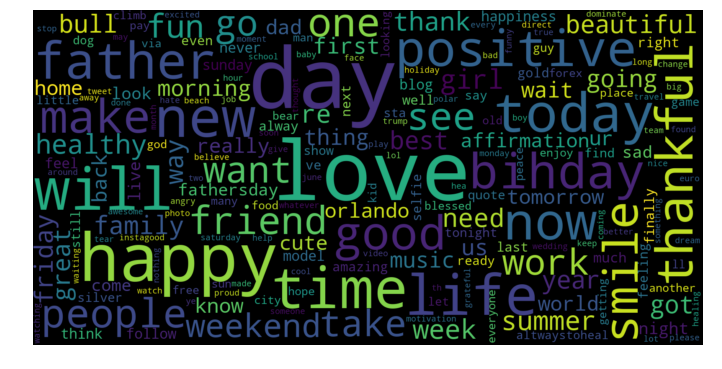

In [147]:
neg_tweets = train_data[train_data.label == 0]
neg_string = []
for t in neg_tweets.new_tweet:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,collocations=False).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

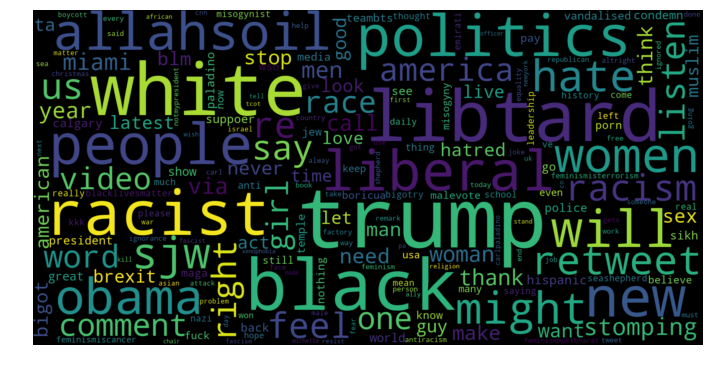

In [148]:
neg_tweets = train_data[train_data.label == 1]
neg_string = []
for t in neg_tweets.new_tweet:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,collocations=False).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

(No surprises here...)

Okay, so now, lets go a little bit deeper: lets go into token frequency, using CountVectorizer from sklearn.

In [149]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(train_data.new_tweet)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Lets check how many unique tokens we have...

In [150]:
len(cvec.get_feature_names())

37518

Now, lets see what are the most common tokens and their prevelance in each one of the classes

In [151]:
neg_doc_matrix = cvec.transform(train_data[train_data.label == 0].new_tweet)
pos_doc_matrix = cvec.transform(train_data[train_data.label == 1].new_tweet)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.columns = ['positive', 'negative']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

positive  negative  total
the      9396       843  10239
to       9300       568   9868
you      5452       500   5952
and      4580       368   4948
in       4253       452   4705
for      4262       250   4512
is       3846       462   4308
of       3801       461   4262
my       3645        73   3718
it       3441       204   3645

The concept of "stop words" is screaming at us right now, if we take a look to the table below. This words are very common words, and can be seen as noise of the dataset (inherent to almost every NLP task...). Lets not remove them for now. 

Zipf’s Law states that a small number of words are used all the time, while the vast majority are used very rarely. There is nothing surprising about this, we know that we use some of the words very frequently, such as “the”, “of”, etc, and we rarely use the words like “aardvark” (aardvark is an animal species native to Africa). However, what’s interesting is that “given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.”

Excellent video about Zipf's Law: https://www.youtube.com/watch?time_continue=2&v=fCn8zs912OE

Text(0.5,1,'Top 500 tokens in tweets')

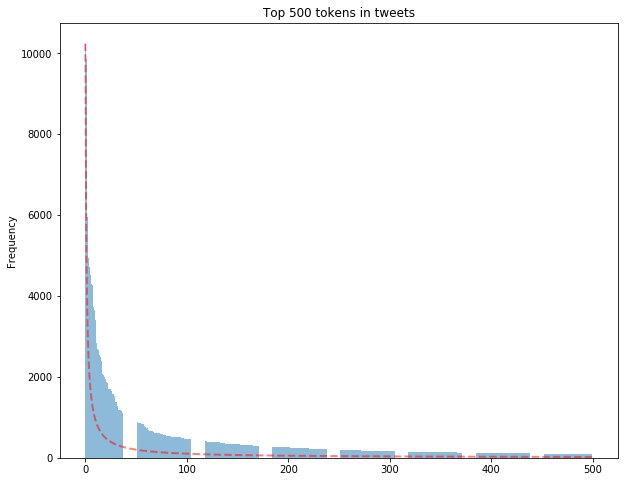

In [152]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

From the plot above, we can see that the Zipf's law is somewhat followed in our corpus

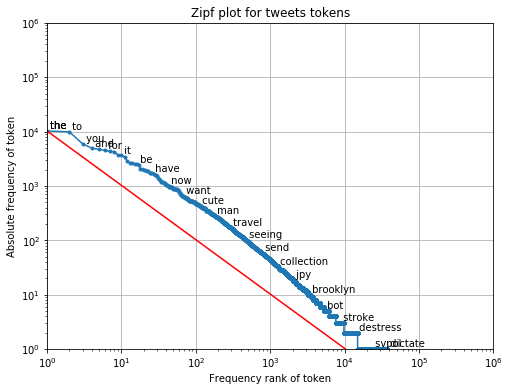

In [153]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

Comparing the Zipf distribution of the words and the true Zipf law, we can see a resemblance.

Lets remove the stop words (CountVectorizer flag "stop_words):

In [154]:
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(train_data.new_tweet)
neg_doc_matrix = cvec.transform(train_data[train_data.label == 0].new_tweet)
pos_doc_matrix = cvec.transform(train_data[train_data.label == 1].new_tweet)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.columns = ['positive', 'negative']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

positive  negative  total
love          2801        27   2828
day           2384         9   2393
happy         1695        12   1707
just          1289        79   1368
like          1041       139   1180
life          1169         7   1176
time          1128        22   1150
today         1081        14   1095
new            931        72   1003
thankful       952         0    952

So the results, after removing the stop words is pretty different. I ranked the most common tokens, and not surprisingly, the tokens that ranked higher were from the majority class. 

But lets look at the frequency values of the minority class. Everything is pretty normal, right? (In terms of the ratio between the positives and negatives). What about words like "like", "just"? Can have different meanings:

- "just perfect"
- "just stupid"
- etc

So, lets rank the bi-grams (frequency-wise) and see if some pattern can be extracted:

In [155]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(ngram_range=(2, 2), stop_words="english")
ngrams = c_vec.fit_transform(train_data.new_tweet)
count_values = ngrams.toarray().sum(axis=0)
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
    print(ng_count, ng_text)

445 father day
429 thankful positive
352 positive affirmation
326 model love
325 time ur
325 love time
296 blog silver
285 silver gold
263 gold forex
239 altwaystoheal healthy
223 fathers day
215 polar bear
175 dominate bull
175 direct want
175 bull dominate
175 bull direct
150 bing bong
142 climb racing
142 bear climb
131 good morning
122 happy bihday
120 looking forward
115 happy father
112 simulator need
112 need tear
112 need adapt
112 gorilla simulator
112 environment need
112 adapt environment
111 love instagood
108 tear city
97 feel like
97 attack bull
86 old tweets
86 finally way
84 way delete
84 tweets useful
84 delete old
83 useful deletetweets
83 instagood photooftheday
78 tbt cute
76 cute beautiful
76 beautiful followme
75 yeah good
75 good bing
75 bong bing
75 aww yeah
74 looks like
73 love life
72 sjw liberal
72 libtard sjw
72 libtard libtard
72 liberal politics
71 racing polar
71 racing angry
71 living cold
71 bear living
71 angry polar
69 healthy healing
67 like like
65

10 day best
10 couple weeks
10 counting days
10 consumer price
10 came home
10 body doplants
10 blessed thankful
10 blessed day
10 bihday cake
10 april blog
10 amen share
10 allow child
10 abrahamhicks lawofattraction
9 year anniversary
9 xxx nasty
9 world love
9 work love
9 white open
9 white girl
9 wedding anniversary
9 want know
9 ve waiting
9 try follow
9 toptags days
9 today happy
9 things allow
9 thankful love
9 thank following
9 summer sun
9 summer hot
9 sources continuous
9 sounds like
9 sneezy bashful
9 smile selfie
9 sleepy sneezy
9 singing amazing
9 shooting orlando
9 shooting history
9 sad hear
9 returns day
9 rebeccas nails
9 really love
9 ready tomorrow
9 quotes hu
9 quote quoteoftheday
9 quantities multiple
9 press conference
9 positive quote
9 places educationfest
9 people orlando
9 passed away
9 oitnb season
9 oh yes
9 nzd usd
9 new track
9 new home
9 new day
9 new car
9 new album
9 near blog
9 nails plymouth
9 na slut
9 multiple sources
9 motivation bed
9 months ago
9

6 just week
6 just think
6 just realized
6 just posted
6 just let
6 just launched
6 joy positive
6 joy joy
6 join nowlinkup
6 jeff sessions
6 jacksonville rooster
6 islamic extremism
6 introduction happy
6 integral family
6 int web
6 instasize fashion
6 instalike instamood
6 instagram instagood
6 instagood love
6 instaaoftheday buffalo
6 innocent people
6 impression accept
6 igersbnw attack
6 hugs thankful
6 hu lost
6 house today
6 hot slut
6 hot shy
6 horrible attack
6 horny young
6 horny naughty
6 hope like
6 hope having
6 home thankful
6 home home
6 home family
6 highest happiness
6 hey saw
6 healthy doplants
6 healing southafrica
6 having paner
6 having great
6 hate crime
6 hard believe
6 happy wedding
6 happy returns
6 happy man
6 happy love
6 happy little
6 happy face
6 happy everyday
6 happy customer
6 happy bday
6 happiness marriage
6 happiness eah
6 happiest place
6 grow followers
6 great news
6 grateful thankful
6 grateful blessed
6 got today
6 got like
6 got email
6 good thi

4 thankful farmers
4 thankful fall
4 thankful cats
4 thankful apologies
4 thank making
4 thank follow
4 thank beautiful
4 thalaivaa vijay
4 th wedding
4 th monthsary
4 th month
4 tell just
4 tell bjp
4 tedtalks tedatibm
4 teaser photography
4 tears thankful
4 taylorswift bull
4 taste thankful
4 target practice
4 talks luis
4 takes special
4 tagsforlikes beautiful
4 tags nothappy
4 tabarez talks
4 suppo friends
4 super duper
4 super cute
4 sunsets thankful
4 sunny sunnyday
4 sunny sunday
4 sunny summer
4 sundaymorning sunday
4 sunday night
4 sunday june
4 sunday fathersday
4 sun sunset
4 sun sea
4 sun love
4 sun beach
4 summer vibes
4 summer life
4 sukhbir jaitley
4 strong unifying
4 strong motivation
4 strong excitem
4 strong excite
4 strong exci
4 stories happy
4 stop smiling
4 stop hate
4 stop giving
4 stephcurry outburst
4 stay stay
4 stay positive
4 stay happy
4 state mind
4 stanley cup
4 sta watching
4 sta packing
4 squeaking frog
4 springfield bull
4 spring summer
4 spring memori

3 workout motivation
3 working hard
3 working class
3 work progress
3 work make
3 work jobs
3 work hours
3 work got
3 work freestyle
3 work did
3 words wisdom
3 words love
3 words live
3 wor conference
3 woop woop
3 wonderful place
3 won stanley
3 women men
3 women like
3 women got
3 woman love
3 woman fine
3 woh watching
3 wo rk
3 wiwt metoday
3 wishes mad
3 wishes fathersday
3 wishes dads
3 wish time
3 wish just
3 wish best
3 wiping negativity
3 win win
3 win game
3 wild plants
3 wide awake
3 white woman
3 white minority
3 white man
3 white house
3 white guy
3 white crayon
3 white christmas
3 white blue
3 white background
3 white americans
3 whisky connoisseur
3 wet slut
3 wet kinky
3 went great
3 wembley stadium
3 weeks left
3 weeks going
3 weeks bump
3 weekend work
3 weekend wedding
3 weekend summer
3 weekend sta
3 weekend smile
3 weekend really
3 weekend life
3 weekend happiness
3 weekend good
3 weekend filled
3 weekend family
3 weekend bihday
3 weekend ahead
3 week week
3 week pr

3 opkillingbay seashepherd
3 opening date
3 open minded
3 ootd wiwt
3 ontheredcarpet cousin
3 online shopping
3 onda temple
3 omg ve
3 omg tears
3 omg new
3 omg finally
3 old guy
3 old acc
3 okay happy
3 ok positive
3 oil intermarket
3 oh yea
3 oh wow
3 oh ve
3 oh just
3 oh did
3 oh bluehand
3 officially worst
3 officially begun
3 occurred just
3 obama remarks
3 obama gets
3 obama dead
3 obama black
3 ny chair
3 nuuring positive
3 nude slut
3 nude sex
3 notmypres wtf
3 nothappy crying
3 note story
3 note setting
3 non white
3 non stop
3 non racist
3 nofilter love
3 nitro gas
3 nightclub orlando
3 night shift
3 night orlando
3 night old
3 night live
3 nigger lifelessons
3 nigeria football
3 nice weekend
3 nice way
3 nice sun
3 nice poetry
3 nice meet
3 nice evening
3 nice big
3 newyork newyorkcity
3 newyear business
3 news weekend
3 news media
3 news hear
3 news cricket
3 new world
3 new teacher
3 new shop
3 new shoes
3 new school
3 new restaurant
3 new record
3 new pic
3 new order
3 ne

3 girl summer
3 girl smile
3 girl porn
3 girl loves
3 girl girly
3 girl girls
3 girl friendship
3 girl friend
3 gift love
3 gift came
3 ghost love
3 ghazals jokes
3 gettingfitter gettingfit
3 getting wrong
3 getting real
3 getting paid
3 getting married
3 getting closer
3 getting close
3 getting better
3 gets excited
3 germany selfie
3 germany gogermany
3 ger land
3 geordie shore
3 genetics mt
3 gender neutral
3 gb usb
3 gazal nice
3 gay men
3 gay matters
3 gay lgbt
3 gay goblins
3 gas truck
3 games android
3 game weak
3 game sad
3 game nbafinals
3 game nba
3 game far
3 game come
3 fwis fashion
3 future year
3 future tech
3 future mobile
3 future goals
3 future bright
3 funy follow
3 funny time
3 funny special
3 funny silly
3 funny loveislove
3 fundraising director
3 funday sunday
3 funday family
3 fun times
3 fun thankful
3 fun tease
3 fun socially
3 fun pay
3 fun instagood
3 fun instadaily
3 fun happiness
3 fun gym
3 fun fun
3 fun family
3 fuck yeah
3 fuck want
3 fuck straight
3 fuck

3 allahsoil problem
3 allahsoil people
3 allahsoil familiar
3 allah bless
3 alkalamba showcases
3 alex day
3 aldub thweeksary
3 african americans
3 affective disorder
3 advanced value
3 advanced far
3 adds try
3 add snapchat
3 adam saleh
3 actually really
3 actually look
3 actually believe
3 actual blog
3 activities play
3 actions peace
3 action make
3 act violence
3 acquainted punjabi
3 account new
3 account hacked
3 accessnetwork delivered
3 accent feelings
3 absolutely disgusting
3 able walk
3 able sleep
3 able play
3 aap spokesperson
3 aap claim
2 zzzzzzzz cool
2 zydeco dance
2 zuma malema
2 zosh cardo
2 zoo says
2 zone america
2 zk mariott
2 ziplining adventure
2 zipaquira bogotadc
2 zionazi proud
2 zero times
2 zen abstract
2 zelda breath
2 zach game
2 yyt nfld
2 yup saw
2 yup concur
2 yung samu
2 yummy yummy
2 yummy positive
2 yum yummy
2 yum healthy
2 yum dalston
2 yul happy
2 yrs old
2 yrs endless
2 yrs best
2 yoy vs
2 yoy rose
2 yoy dipped
2 youtuber youtube
2 youtube videos


2 victims god
2 victims culture
2 victimized fact
2 vibrant positive
2 vibes summer
2 vibes ripojb
2 viamiano wishes
2 version flag
2 verse charity
2 verona lightweight
2 verified account
2 verge complete
2 venue nice
2 ventura happy
2 ventilation study
2 vent beg
2 venice italy
2 vendor shoplocal
2 vendetta hair
2 veiled gay
2 vehicle cause
2 vegas strip
2 vegas life
2 vegas lasvegas
2 vegas esco
2 ve years
2 ve worn
2 ve winner
2 ve waited
2 ve turned
2 ve trying
2 ve times
2 ve thought
2 ve staed
2 ve spent
2 ve sneak
2 ve perfect
2 ve option
2 ve noticed
2 ve nailed
2 ve lucky
2 ve low
2 ve lovely
2 ve literally
2 ve id
2 ve having
2 ve hate
2 ve happy
2 ve finished
2 ve felt
2 ve far
2 ve experienced
2 ve dozens
2 ve decided
2 ve changed
2 vandal mother
2 values work
2 values schools
2 value generation
2 valley usa
2 valley pls
2 valid criticism
2 vacation summer
2 vacation stas
2 vacation smile
2 vacation markantalya
2 vacation booked
2 utterly people
2 utterly pathetic
2 utterly

2 telling blm
2 tell wish
2 tell week
2 tell story
2 tell reading
2 tell peoples
2 tell love
2 tell jeffery
2 tell girl
2 tell did
2 tel aviv
2 tehaleh welcome
2 teespring hoodies
2 teens socialmedia
2 teenager sos
2 teen vogue
2 teen girls
2 teen gay
2 teddy bear
2 technology kan
2 techno vk
2 techjunkiejh daily
2 tech watch
2 tech symptoms
2 tech internet
2 tech industry
2 tech discrimination
2 teary eyed
2 tears gent
2 tears flying
2 tears days
2 tears blue
2 teared sisterhood
2 teapay biher
2 teamwork love
2 teamspeak channels
2 teamshide stay
2 teams ready
2 teammates dance
2 teamhawthorn ready
2 teamfollowback rocktheretweet
2 team win
2 team thug
2 team th
2 team suppo
2 team say
2 team play
2 team phit
2 team leaving
2 team kareena
2 team friday
2 team fish
2 team comes
2 team amazing
2 team alw
2 teachers thankful
2 teachers did
2 teacher writing
2 teach st
2 teach children
2 tea bag
2 te gofoe
2 tds tdl
2 tdl day
2 tcot whined
2 tcot tpc
2 tcot tlot
2 tcot feminism
2 tci grea

2 shower today
2 shower time
2 showed true
2 shout people
2 shout dads
2 shot stabbed
2 shot killed
2 shot ibiza
2 shot head
2 shopthemint weekend
2 shopping time
2 shopping spree
2 shopping like
2 shopping fashion
2 shopping day
2 shopping buy
2 shoppers parking
2 shopper riclswtravelbook
2 shoplocal fathersday
2 shop lifter
2 shop coming
2 shootings normal
2 shootings just
2 shootings happening
2 shootings bombing
2 shootings attack
2 shooting video
2 shooting usa
2 shooting mean
2 shooting killing
2 shooting killed
2 shooting disneygatorattack
2 shooting beretta
2 shooting attack
2 shooting american
2 shoot thursday
2 shoes wait
2 shoes today
2 shoes jewelry
2 shoes instatags
2 shoes afraid
2 shoe shine
2 shockingly increasingly
2 shocking video
2 shocked learn
2 sho waste
2 sho term
2 sho stand
2 sho hair
2 sho film
2 shitty things
2 shit weak
2 shit trump
2 shit smh
2 shit proving
2 shit happens
2 shit girls
2 shis joie
2 shine booths
2 shift work
2 shift dresses
2 shideism teamsh

2 proud love
2 proud keepitlocal
2 proud gay
2 proud family
2 proud congressional
2 proud africa
2 prototype new
2 protestors college
2 protest denounce
2 protect means
2 prostitutes hatespeech
2 propoganda jew
2 propaganda real
2 propaganda fear
2 promoting vulgar
2 promoting greatness
2 promises quotes
2 promises lead
2 promise ll
2 promise blacklivesmatter
2 projects got
2 projection springst
2 projection auspol
2 project youthpreprofessional
2 project way
2 project coming
2 progressive minions
2 progressive country
2 progress weekend
2 progress week
2 programmed hillbots
2 profit hits
2 profiling main
2 profiling economicapahied
2 profiling cologne
2 profile stressfreedays
2 profile blm
2 professor makes
2 professionals staup
2 professional networking
2 professional help
2 prof ur
2 prof pres
2 products etsy
2 production mom
2 product doncasterphotographer
2 product development
2 producer house
2 produced dj
2 process wiright
2 process digme
2 problems tuckercarlson
2 problem world

2 oh day
2 oh damn
2 oh boy
2 oh amazing
2 officially registered
2 officially reached
2 officially month
2 officially eyes
2 officially begin
2 official wants
2 official today
2 official paladino
2 officerstaff acab
2 officers goaded
2 office flair
2 offical jews
2 offered help
2 offer iron
2 ofc cameron
2 oculusrift htcvive
2 ocean fun
2 occur civil
2 obviously related
2 obstruction goes
2 obsessed bitcoin
2 obligation sense
2 obamas wish
2 obamas embarrass
2 obama unfair
2 obama speech
2 obama soros
2 obama slammed
2 obama shooter
2 obama realize
2 obama policies
2 obama muslims
2 obama like
2 obama let
2 obama joins
2 obama jarretts
2 obama ignorant
2 obama hillary
2 obama happen
2 obama guns
2 obama fyi
2 obama cnn
2 obama christmaseve
2 obama calls
2 obama blame
2 obama ape
2 nyc woman
2 nyc cop
2 nyc amazing
2 ny caign
2 nuts disagreement
2 nut jobs
2 nurses week
2 nurses begin
2 number overdoses
2 numad travel
2 nude video
2 nude pics
2 nude hardcore
2 nude beach
2 nsfw self
2 n

2 married robe
2 married celebrated
2 marketing pa
2 market meat
2 market drive
2 market day
2 market crashed
2 mark hackett
2 marine mud
2 marijuana arrests
2 maria god
2 mari nats
2 margaret lee
2 marcus allen
2 march greenspan
2 marbs marbella
2 maraton runner
2 map human
2 mansion tupac
2 mans baby
2 manner traveling
2 manifesting power
2 mango tanamsendiri
2 manga original
2 manchester spain
2 manami instagram
2 manager look
2 management making
2 manage big
2 man threaten
2 man smile
2 man said
2 man rory
2 man really
2 man needed
2 man man
2 man make
2 man lol
2 man lied
2 man known
2 man know
2 man killed
2 man just
2 man having
2 man happy
2 man guy
2 man gun
2 man gets
2 man game
2 man forced
2 man fathersday
2 man eah
2 man college
2 man alive
2 man actions
2 mama maria
2 mama blogger
2 mall people
2 mall hopping
2 malign image
2 malia shake
2 male stillwithher
2 male illegal
2 making way
2 making trip
2 making things
2 making sure
2 making student
2 making smile
2 making poi

2 left happy
2 left feeding
2 left enter
2 left bihday
2 left admit
2 left activist
2 leeds love
2 leeds beckett
2 lee runbeck
2 lee blaske
2 ledwell inspired
2 lede come
2 lebron pushing
2 leaving work
2 leaving religion
2 leaving month
2 leaving house
2 leaving home
2 leaving happy
2 leaving greece
2 leaving day
2 leave weeks
2 leave way
2 leave untill
2 leave troubles
2 leave tour
2 leave sunday
2 leave room
2 leave house
2 leave heat
2 leave couple
2 leave brexit
2 leather crystals
2 leather children
2 learninglife life
2 learning researching
2 learning experience
2 learn share
2 learn secret
2 learn read
2 learn prayingfororlando
2 learn love
2 learn learn
2 learn feelgood
2 learn apaheid
2 leaps backwards
2 leaked online
2 leak udta
2 leagueoflegends twitch
2 league teams
2 leadership failing
2 leadership award
2 leader reveals
2 lead nation
2 lead death
2 le sister
2 le ku
2 lds church
2 lbs week
2 lbgt community
2 lazy day
2 laziness issue
2 laying sofa
2 lay bed
2 lawyer humor

2 hello twitterworld
2 hello tubbytoons
2 hello sunshine
2 hello summer
2 hello self
2 hello saturday
2 hello photography
2 hello love
2 hello inshot
2 hello day
2 hell yeah
2 hell surprised
2 hell right
2 helix bridge
2 held tears
2 held arm
2 held accountable
2 heh lel
2 heels case
2 heeeeere nationalroseday
2 hedgehog letsplay
2 hech hr
2 heavy cast
2 heat map
2 heat home
2 heas love
2 heas change
2 hearing sip
2 hearing hide
2 hearing amodu
2 heard tomorrow
2 heard lot
2 heard dead
2 heard boy
2 heard amazing
2 hear word
2 hear shootings
2 hear ripchristina
2 hear orlando
2 hear new
2 hear mum
2 hear kurds
2 healthybody vrecipes
2 healthy yummy
2 healthy tuesdaymotivation
2 healthy things
2 healthy society
2 healthy perfect
2 healthy monday
2 healthy mind
2 healthy lunch
2 healthy independent
2 healthy herbalife
2 healthy heatherfitzpatrick
2 healthy health
2 healthy day
2 healthy brain
2 healthy blogginggals
2 healthy blessed
2 healthy balance
2 health wealth
2 health space
2 heal

2 future years
2 future visit
2 future value
2 future thx
2 future save
2 future india
2 furious bar
2 funnymemes funny
2 funny weather
2 funny wacky
2 funny true
2 funny tragically
2 funny thegooddinosaur
2 funny strange
2 funny smile
2 funny read
2 funny positive
2 funny politics
2 funny loveit
2 funny lol
2 funny laugh
2 funny humour
2 funny hilarious
2 funny heabroken
2 funny girl
2 funny fun
2 funny friends
2 funny cute
2 fundraising helping
2 funding fathersday
2 funding close
2 funday smile
2 fun wedding
2 fun water
2 fun travel
2 fun time
2 fun tagsforlikes
2 fun sustainableliving
2 fun surprise
2 fun southbeach
2 fun selfie
2 fun saturday
2 fun positive
2 fun playing
2 fun music
2 fun make
2 fun life
2 fun hungry
2 fun hot
2 fun healthy
2 fun happy
2 fun hair
2 fun guys
2 fun girls
2 fun girl
2 fun gift
2 fun free
2 fun follow
2 fun end
2 fun divers
2 fun cute
2 fun bekindalways
2 fun beach
2 fun amazing
2 fulfilling life
2 fulfilled life
2 fuher recognition
2 fuelled day
2 fu

2 exactly feel
2 exact thing
2 ex super
2 ex girlfriend
2 ex councillor
2 ex boyfriend
2 evolution lot
2 evil jew
2 evil bihday
2 evidence standard
2 everytime wear
2 everyday ridiculously
2 everyday makes
2 everyday gratitude
2 everyday feel
2 everyday day
2 everybody day
2 everybody ate
2 events used
2 event ve
2 event tomorrow
2 event friday
2 event excited
2 event brentwood
2 evenings fun
2 evening splendid
2 evening family
2 eve weybridge
2 eve going
2 eve christmas
2 eva tom
2 euros sta
2 euros feel
2 european monetary
2 europe trip
2 europe today
2 europe proves
2 europe ain
2 euro stas
2 euro sta
2 euro piranaship
2 euro marseille
2 euro life
2 euro compare
2 euro begin
2 euro area
2 eur chf
2 eu xians
2 eu referendum
2 etsy site
2 ethnocentrism normal
2 ethnicity biblical
2 estuaryfringefestival kicks
2 esteem willing
2 estate sale
2 establishment blk
2 especially ve
2 especially refuted
2 especially hu
2 escaped attention
2 escape relax
2 ery let
2 era standing
2 equity fundi

2 decision make
2 decision inside
2 decision control
2 decided poussey
2 decided look
2 decided happy
2 decided feminist
2 decided bit
2 decide love
2 decades ove
2 debut album
2 deaths caused
2 deaths blamed
2 death toll
2 death sentence
2 death miss
2 death jocox
2 death friends
2 death dream
2 dearly missed
2 dear john
2 dear god
2 dear cutys
2 dear america
2 deanambrose wrestling
2 deal courage
2 dead white
2 dead thought
2 dead terrorist
2 dead sporadic
2 dead kitten
2 dead americans
2 dead alive
2 dazzling oomf
2 dayslinky reading
2 days work
2 days wohwhile
2 days weekend
2 days ss
2 days run
2 days perform
2 days okay
2 days mall
2 days love
2 days lots
2 days lives
2 days late
2 days keshi
2 days holiday
2 days harvest
2 days graduation
2 days good
2 days estuaryfringefestival
2 days date
2 days dad
2 days complaint
2 days childcare
2 days captains
2 days best
2 days asks
2 days aneveningwithcyrus
2 days ahead
2 dayoff chill
2 day yosoytupadre
2 day xoxo
2 day writing
2 day wo

2 cavs fans
2 cavett robe
2 cautious woman
2 caused overlap
2 caused islamic
2 cause sent
2 cause did
2 cause celebration
2 cause brown
2 caught camera
2 caturday caturday
2 caturday cat
2 catsoftwitter caturday
2 catchup twitter
2 catches boating
2 catch shows
2 catapults cinema
2 cat shoes
2 cat pictures
2 cat meat
2 cat lol
2 cat lady
2 cat instagram
2 cat dog
2 cat cers
2 cast iron
2 case just
2 case emergency
2 case better
2 casandra blonde
2 carving inspiration
2 carving fish
2 carrying gun
2 carry guns
2 carlpaladino election
2 carl palladino
2 caring just
2 caridge couple
2 careful playing
2 careers careeradvice
2 care shark
2 care people
2 care money
2 care feel
2 care anymore
2 care abt
2 cards arrived
2 cardinals drafting
2 card bbcnews
2 car today
2 car night
2 car lost
2 car leave
2 car home
2 car crash
2 car caffine
2 captured day
2 captains practices
2 capitalism vs
2 capable burnsurvivor
2 caoon network
2 caoon crying
2 canucks game
2 cannon speaks
2 canine dog
2 canihe

2 atp tennis
2 atm favourite
2 atlutd flagfriday
2 atleast person
2 atitude like
2 athoscuba paditv
2 athletics meeting
2 athlete selfish
2 athena xx
2 ate steak
2 aswad agreed
2 assumptions entire
2 assessments new
2 assembly principal
2 assault weapon
2 ass wwe
2 ass people
2 ass nigga
2 ass fine
2 ass america
2 aspect peshawar
2 asks play
2 asks im
2 asking dr
2 asked better
2 ask test
2 ask languages
2 ask endorse
2 ask dr
2 asianmen datingapps
2 asian women
2 asian beauty
2 ashamed values
2 ascot times
2 ascot fashion
2 ascot cute
2 arriving tomorrow
2 arriving smaccdub
2 arrived sky
2 arrived ready
2 arrived post
2 arrived caignfest
2 arrive manner
2 arrive doing
2 army peru
2 arm shower
2 ariellesloth na
2 argued felony
2 argue nigga
2 arff change
2 aren work
2 aren talking
2 areacodemixshow cc
2 area orlandostrong
2 archives relaxing
2 arab states
2 april previous
2 apps help
2 approx weeks
2 appreciation followed
2 appreciate love
2 appreciate fathers
2 application ag
2 applet

1 york enlightened
1 york dude
1 york dreaming
1 york digitaltransfo
1 york day
1 york daily
1 york city
1 york ceegee
1 york bistro
1 yooo bitch
1 yoo tee
1 yonge queen
1 yonge eglinton
1 yongbae sol
1 yong girl
1 yong forever
1 yonex nanoray
1 yolo youtube
1 yolo xoxo
1 yolo umbrella
1 yolo stoops
1 yolo smile
1 yolo selflove
1 yolo magic
1 yolo lovinglife
1 yolo lived
1 yolo happines
1 yolo clearwater
1 yolo blessed
1 yolo attack
1 yojanas indian
1 yoh tarek
1 yogyakaa instagood
1 yogu sweet
1 yogu breakfast
1 yogs instagram
1 yogis like
1 yogi yogatacherdublin
1 yogi team
1 yogi namaste
1 yogi life
1 yogi holiday
1 yogawien vienna
1 yogateacher yogalife
1 yogatacherdublin namaste
1 yogastudios yogalilies
1 yogaretreat retreat
1 yogaoffthemat nomakeupselfie
1 yogalove yogalife
1 yogalove yoga
1 yogalove lifestyle
1 yogalife yogaeverywhere
1 yogainspiration ness
1 yogaeverydamnday yogi
1 yogaeverydamnday yogafixesthings
1 yoga yyc
1 yoga yogini
1 yoga yogateacher
1 yoga yogalove
1 yo

1 xtatic possible
1 xskinnybeautyxo heaache
1 xplore fitness
1 xperiaz xperiaz
1 xperiaz sony
1 xp bannerlord
1 xoxoorlando tubbytoons
1 xoxo xoxo
1 xoxo twitch
1 xoxo teacupride
1 xoxo like
1 xoxo japan
1 xoxo isitaugustyet
1 xoxo friday
1 xoxo feliz
1 xoxo doggiestyle
1 xotic bassist
1 xo pg
1 xo edenandjaysbestday
1 xmas today
1 xmas store
1 xl lg
1 xjapan dream
1 xingmi universe
1 xiii entry
1 xico times
1 xia avfc
1 xi ukraine
1 xgamer revealed
1 xenstrength yoga
1 xenophobic whitesupremacist
1 xenophobic trump
1 xenophobic scaredy
1 xenophobic natural
1 xenophobic isolationist
1 xenophobic image
1 xenophobia wi
1 xenophobia times
1 xenophobia socialjustice
1 xenophobia sins
1 xenophobia papalbull
1 xenophobia misogyny
1 xenophobia lockerroomtalk
1 xenophobia genderinequality
1 xenophobia drink
1 xenophobia blink
1 xenophobes tell
1 xenophobe immature
1 xdcct gratitude
1 xd want
1 xd thx
1 xd teambadassofanarchy
1 xd stupidthoughts
1 xd snapchat
1 xd recorded
1 xd modelling
1 xd l

1 workhard trainhard
1 workhard spoquote
1 workfromhonemom know
1 workfromhome targets
1 workfromhome networkmarketing
1 workfromhome loveit
1 workforce insights
1 workflow selfie
1 workersrights europe
1 workers world
1 workers work
1 workers strike
1 workers stage
1 workers say
1 workers rude
1 workers learn
1 workers iuk
1 workers good
1 workers eye
1 workers experience
1 worker sharing
1 worker killed
1 worker gretchen
1 workedout pibble
1 worked worst
1 worked working
1 worked wearing
1 worked trailer
1 worked til
1 worked thanks
1 worked suspend
1 worked surving
1 worked stressed
1 worked srry
1 worked ska
1 worked security
1 worked sa
1 worked mlc
1 worked let
1 worked highschoolgraduation
1 worked great
1 worked got
1 worked giant
1 worked fitter
1 worked est
1 worked day
1 worked cowan
1 worked beard
1 workday today
1 workday sunnyday
1 workbuddy leaving
1 workaholic rosario
1 work youtube
1 work xboxones
1 work workplacehappiness
1 work workforce
1 work worked
1 work wordpres

1 woman stealing
1 woman standing
1 woman stand
1 woman smile
1 woman sma
1 woman sex
1 woman screaming
1 woman says
1 woman running
1 woman ready
1 woman reaction
1 woman priceless
1 woman presidential
1 woman porn
1 woman popey
1 woman poolside
1 woman notconcernedforanyone
1 woman nice
1 woman neverends
1 woman needs
1 woman najpiekniejsze
1 woman mo
1 woman measured
1 woman makeup
1 woman live
1 woman little
1 woman launched
1 woman latina
1 woman latenight
1 woman jumped
1 woman instafashion
1 woman inspiration
1 woman husband
1 woman hersel
1 woman hello
1 woman haunting
1 woman grocery
1 woman god
1 woman gets
1 woman free
1 woman fishing
1 woman fat
1 woman family
1 woman expected
1 woman ex
1 woman edinburgh
1 woman drops
1 woman demands
1 woman degrading
1 woman death
1 woman dating
1 woman dangerous
1 woman damn
1 woman cou
1 woman cometovisitus
1 woman celtic
1 woman catcalled
1 woman blog
1 woman asian
1 woman america
1 woman allegedly
1 woman acts
1 woman abt
1 wolves sta

1 white newme
1 white navy
1 white muslim
1 white music
1 white murdered
1 white mother
1 white miss
1 white men
1 white males
1 white male
1 white lovelife
1 white love
1 white longhair
1 white liberals
1 white liberalism
1 white liars
1 white li
1 white kwanzaa
1 white jeans
1 white inspiregram
1 white hair
1 white grey
1 white good
1 white glowing
1 white girlvideo
1 white girls
1 white gay
1 white frat
1 white follow
1 white folks
1 white fired
1 white dumbass
1 white devil
1 white daisy
1 white crowd
1 white crep
1 white countries
1 white clean
1 white chipmunks
1 white children
1 white chick
1 white centered
1 white calls
1 white bread
1 white boy
1 white bouncingbaby
1 white blonde
1 white bag
1 white altright
1 white actors
1 white according
1 whit princesses
1 whit people
1 whistling workout
1 whistling straights
1 whistling hymn
1 whistler shredfam
1 whistler lake
1 whispers wayward
1 whispering background
1 whisper music
1 whisper love
1 whisky iftar
1 whisky fitness
1 whisk

1 weekend fellow
1 weekend feijoadacr
1 weekend fathersday
1 weekend father
1 weekend fashionblogger
1 weekend fashion
1 weekend far
1 weekend fans
1 weekend familytrip
1 weekend familytime
1 weekend fabdivas
1 weekend exams
1 weekend escapada
1 weekend ericeira
1 weekend entrepeneur
1 weekend enrique
1 weekend edm
1 weekend ecogreenpark
1 weekend eat
1 weekend dubai
1 weekend driving
1 weekend drinks
1 weekend doyourbest
1 weekend dope
1 weekend donotbeafraid
1 weekend doing
1 weekend djvarra
1 weekend dissapointment
1 weekend dinner
1 weekend delivery
1 weekend decor
1 weekend dears
1 weekend datenight
1 weekend dance
1 weekend cycle
1 weekend croft
1 weekend couple
1 weekend congrats
1 weekend conces
1 weekend coming
1 weekend colorfull
1 weekend clean
1 weekend chills
1 weekend chill
1 weekend chi
1 weekend changes
1 weekend celebrating
1 weekend celebrate
1 weekend causing
1 weekend cantwait
1 weekend bye
1 weekend bwmoves
1 weekend busy
1 weekend buildingfamilies
1 weekend brings

1 way comic
1 way comes
1 way colors
1 way cnet
1 way cloverspay
1 way closer
1 way class
1 way children
1 way cheaper
1 way ch
1 way captive
1 way buying
1 way brighten
1 way bk
1 way bernie
1 way believe
1 way avoid
1 way ashamed
1 way antwerp
1 way anti
1 way airpo
1 way africa
1 way abs
1 way aaahhhh
1 waxworks blackpool
1 waxed time
1 wax shoo
1 wawrinka scheidet
1 wawo nic
1 waving voice
1 waving beautiful
1 waving american
1 waves today
1 waves ocean
1 waves make
1 waves lake
1 waves gorilla
1 waves drifting
1 waves com
1 wave treasures
1 wave reminds
1 wave news
1 wave maybe
1 wave fun
1 wave bro
1 watz hate
1 wattpadquote girls
1 wattpad quote
1 wattpad ps
1 wattpad poem
1 wattpad koalamuffins
1 wattpad check
1 wats sauce
1 wats really
1 wating new
1 wathing tha
1 watever happy
1 waters friends
1 waters disney
1 waterproofs necessity
1 waterproof handbag
1 waterplay sensoryplay
1 watermelon stripe
1 watermelon orange
1 watermelon goot
1 watermelon cucumbers
1 watermelon carvin

1 want hang
1 want growl
1 want gratitude
1 want girl
1 want fund
1 want folks
1 want fly
1 want fixed
1 want fight
1 want feel
1 want feedback
1 want fair
1 want factors
1 want escape
1 want enjoying
1 want enchilada
1 want emoji
1 want email
1 want el
1 want dumdum
1 want driving
1 want doing
1 want dog
1 want diary
1 want degree
1 want deep
1 want dance
1 want dad
1 want cute
1 want cuddle
1 want country
1 want costumes
1 want congratulations
1 want conce
1 want compromised
1 want complain
1 want company
1 want comfo
1 want college
1 want circumvent
1 want christmas
1 want children
1 want child
1 want cheryl
1 want change
1 want cereal
1 want ceffy
1 want caraccident
1 want cali
1 want burger
1 want break
1 want boss
1 want body
1 want blog
1 want black
1 want bigger
1 want beauty
1 want bath
1 want basket
1 want basically
1 want baker
1 want backward
1 want available
1 want ask
1 want argentina
1 want anymore
1 want andy
1 want american
1 want amazing
1 want ain
1 want adrienne
1 w

1 votes trumptler
1 votes remain
1 votes dobetter
1 votes bought
1 votersuppression tyranny
1 voters want
1 voters typical
1 voters ti
1 voters suppoing
1 voters rom
1 voters polled
1 voters near
1 voters million
1 voters love
1 voters like
1 voters lack
1 voters hate
1 voters guilty
1 voters goodluckinnovember
1 voters delivered
1 voters cared
1 voterid maga
1 voterid laws
1 voteremain just
1 voter turnout
1 voter indigenous
1 voter id
1 voter fraud
1 voteleave outoftouch
1 voteleave mp
1 voteleave leaveeu
1 voted yrs
1 voted voted
1 voted vot
1 voted tinyfingeredpuppet
1 voted nazi
1 voted mandate
1 voted hate
1 voted brexit
1 voted bn
1 voted berniesanders
1 vote youlost
1 vote whaiiieeeee
1 vote way
1 vote voting
1 vote vote
1 vote vindictive
1 vote trump
1 vote sway
1 vote story
1 vote sd
1 vote scandals
1 vote rupe
1 vote presidential
1 vote people
1 vote passes
1 vote lunatics
1 vote hillary
1 vote held
1 vote havent
1 vote happy
1 vote gunsense
1 vote euref
1 vote elect
1 vote 

1 veryhard verysad
1 verydisappointed didnt
1 verycontent greatful
1 veryblessed blessed
1 veryangry veryveryangry
1 versus xiii
1 versus play
1 versions lies
1 version wreckingball
1 version twizzlers
1 version singing
1 version set
1 version right
1 version nextstep
1 version mobility
1 version makes
1 version lbsdown
1 version july
1 version ios
1 version god
1 version create
1 version beat
1 version america
1 verses wrote
1 verses buttress
1 versatile sew
1 versatile eah
1 versailles men
1 versace wont
1 versa voteleave
1 versa americans
1 verona cenere
1 veroliabohemia vintage
1 vernon trails
1 vermontsalon weekends
1 vermin protest
1 verizon having
1 veritable pastiche
1 verifying true
1 verified shocking
1 verge death
1 verdejo rueda
1 verde sauce
1 verbs past
1 verbally assailed
1 verbal irony
1 verbal abuse
1 veranza mall
1 verano like
1 verabradley love
1 ver miss
1 venum mma
1 venues ny
1 venue tyne
1 venue summer
1 venue series
1 venue relaxation
1 venue praying
1 venue off

1 ur wish
1 ur weight
1 ur weekend
1 ur voices
1 ur viewing
1 ur ugly
1 ur tweet
1 ur treadmarkjump
1 ur taxes
1 ur summer
1 ur stuck
1 ur struggles
1 ur sr
1 ur special
1 ur soul
1 ur smthg
1 ur smile
1 ur site
1 ur sister
1 ur shit
1 ur set
1 ur self
1 ur screen
1 ur saying
1 ur right
1 ur reply
1 ur prof
1 ur probably
1 ur prettys
1 ur presents
1 ur presentation
1 ur predictions
1 ur posts
1 ur pol
1 ur pants
1 ur newyear
1 ur need
1 ur muchi
1 ur mua
1 ur mouth
1 ur moustache
1 ur mobile
1 ur mercy
1 ur marriage
1 ur man
1 ur major
1 ur mad
1 ur lyks
1 ur logic
1 ur lifestyle
1 ur killing
1 ur interests
1 ur idea
1 ur hols
1 ur head
1 ur gonna
1 ur going
1 ur gay
1 ur fucking
1 ur frnd
1 ur footsteps
1 ur food
1 ur flight
1 ur films
1 ur feelings
1 ur favorite
1 ur fan
1 ur family
1 ur employees
1 ur emotions
1 ur email
1 ur eloquent
1 ur eating
1 ur dream
1 ur dp
1 ur doubledouble
1 ur diet
1 ur day
1 ur croc
1 ur crappy
1 ur course
1 ur cool
1 ur conscious
1 ur come
1 ur client
1

1 typical enjoy
1 typical electionfraud
1 typical egotistical
1 typical cleveland
1 typical city
1 typical basic
1 typical anymore
1 typical ain
1 types taxonomies
1 types people
1 types kinds
1 types just
1 type way
1 type unity
1 type trash
1 type things
1 type stories
1 type shit
1 type recipe
1 type people
1 type parent
1 type offences
1 type nonsense
1 type message
1 type meetings
1 type generation
1 type gamer
1 type follow
1 type dialog
1 type cause
1 type adnansms
1 tyne wear
1 tym month
1 tym knw
1 tym kentuck
1 tym home
1 tym fr
1 tyler youtube
1 tyler ward
1 tyler tomorrow
1 tyl bikelife
1 tyjesus love
1 ty welcome
1 ty trying
1 ty smoke
1 ty share
1 ty recent
1 ty playing
1 ty midweek
1 ty matter
1 ty lovely
1 ty follow
1 ty dear
1 ty bihday
1 ty angie
1 txt state
1 txt away
1 tx youth
1 tx tw
1 tx republican
1 twtr come
1 twt sayin
1 tws opi
1 twoweeks god
1 twogud time
1 twofaced clayfeet
1 twodaystogo countdown
1 twizzlers discontinued
1 twitting minute
1 twitterww trend

1 trying bag
1 trying avoid
1 trying attention
1 trying act
1 tryin cage
1 try yummy
1 try yourbest
1 try wreck
1 try wipe
1 try wedding
1 try trust
1 try tomorrow
1 try time
1 try thursday
1 try tasteoflondon
1 try tail
1 try strikingsugar
1 try stone
1 try stick
1 try squeeze
1 try socks
1 try smile
1 try smh
1 try sell
1 try search
1 try salmon
1 try reverse
1 try remain
1 try real
1 try products
1 try plant
1 try peanutbutteralcohol
1 try peanut
1 try onion
1 try nickels
1 try mood
1 try meet
1 try love
1 try lot
1 try listening
1 try laugh
1 try later
1 try land
1 try kilometer
1 try hummus
1 try hide
1 try harder
1 try happy
1 try googlecardboard
1 try good
1 try getting
1 try fucking
1 try fuckerswin
1 try food
1 try finish
1 try finding
1 try figure
1 try fedup
1 try excited
1 try end
1 try drag
1 try did
1 try destroy
1 try destiny
1 try deny
1 try day
1 try creative
1 try counselingwithdebbie
1 try control
1 try christmaseve
1 try capitalize
1 try buy
1 try bring
1 try breaks

1 tree friends
1 tree fascinating
1 tree drop
1 tree designs
1 tree bay
1 treatyadad funnypic
1 treats women
1 treats symptoms
1 treats schnauzer
1 treats saundra
1 treats new
1 treats massage
1 treats itinerary
1 treats hubby
1 treats highest
1 treats filling
1 treats family
1 treats calgary
1 treatments goody
1 treatments beauty
1 treatment transgender
1 treatment right
1 treatment muslim
1 treatment lakers
1 treatment available
1 treating medicine
1 treating like
1 treating away
1 treated lightly
1 treated ivehadbothexperiences
1 treated govts
1 treated fairly
1 treated corruption
1 treated better
1 treated behavioralhealth
1 treatdad love
1 treat villagewellness
1 treat secret
1 treat right
1 treat restaurants
1 treat respect
1 treat pretty
1 treat performing
1 treat nightoff
1 treat nice
1 treat naturalskincare
1 treat lucky
1 treat jamdoughtnut
1 treat isnt
1 treat hot
1 treat guestblog
1 treat finishing
1 treat family
1 treat fairuse
1 treat differently
1 treat delicious
1 treat

1 tool weekend
1 tool violence
1 tool staup
1 tool say
1 tool making
1 tool job
1 tool fucking
1 tool deployed
1 tool cydia
1 tool chromebook
1 took yrs
1 took warren
1 took verses
1 took think
1 took step
1 took spin
1 took snapchat
1 took snap
1 took screen
1 took remember
1 took photo
1 took pa
1 took oscar
1 took orlando
1 took motivation
1 took money
1 took min
1 took massive
1 took long
1 took life
1 took homeland
1 took high
1 took hard
1 took final
1 took exact
1 took dive
1 took days
1 took cat
1 took bsl
1 took better
1 took awhile
1 took antibiotic
1 took ancestry
1 tooise replaced
1 tooexpensive notwohit
1 tooesrly love
1 tooeasy days
1 toocoldu gofrogs
1 tooblessedtobestressed thankful
1 toobigforahotdog foodcoma
1 toobig sorrybutdoa
1 toobad notmyproblem
1 tonyward ss
1 tonytime squee
1 tonyday tonytime
1 tonyb rap
1 tonyawards tonyday
1 tonyawards musicaltheatre
1 tonyawards lit
1 tonyawards hamilton
1 tonyawards friends
1 tonyawards catch
1 tonya makes
1 tonya kristi
1 

1 today weare
1 today weak
1 today warcraftmovie
1 today wanted
1 today want
1 today wannnn
1 today waiting
1 today volunteering
1 today vj
1 today visit
1 today ve
1 today using
1 today used
1 today uncle
1 today turning
1 today truly
1 today trip
1 today traveler
1 today travel
1 today trains
1 today tragic
1 today tough
1 today todaywasagoodday
1 today toasting
1 today tmrw
1 today tip
1 today timeforchange
1 today till
1 today throatcoattea
1 today thoughtfulthursday
1 today thought
1 today things
1 today thing
1 today theopen
1 today thankyou
1 today thankfulthursday
1 today thankful
1 today text
1 today terrible
1 today tears
1 today team
1 today teaching
1 today teachers
1 today tby
1 today tattoo
1 today table
1 today surf
1 today supposed
1 today superday
1 today super
1 today sunshineshere
1 today sunshine
1 today sunrise
1 today sunny
1 today success
1 today studentlife
1 today student
1 today stuck
1 today strength
1 today stream
1 today straw
1 today stock
1 today staying


1 time videos
1 time valuable
1 time vallaa
1 time vacation
1 time upgrade
1 time unwind
1 time ultrawinds
1 time typically
1 time twitter
1 time turkey
1 time tuningout
1 time tune
1 time ttespos
1 time tryouts
1 time trying
1 time truly
1 time trip
1 time trifles
1 time travelling
1 time trade
1 time town
1 time tonyawards
1 time titanic
1 time thx
1 time thrive
1 time thiyone
1 time think
1 time things
1 time theme
1 time theconjuring
1 time thclasses
1 time thank
1 time tech
1 time teapay
1 time teamangry
1 time teach
1 time talk
1 time taken
1 time szcz
1 time sydney
1 time swing
1 time swimi
1 time swear
1 time sunset
1 time sunglasses
1 time summeriscoming
1 time summer
1 time studies
1 time student
1 time stuck
1 time struggles
1 time street
1 time stream
1 time strawberry
1 time stay
1 time staing
1 time stagustinechurch
1 time staed
1 time st
1 time spirituality
1 time spent
1 time sparkle
1 time spain
1 time son
1 time sob
1 time snuggles
1 time snow
1 time slower
1 time sle

1 ticket super
1 ticket sidney
1 ticket sia
1 ticket shi
1 ticket race
1 ticket purchase
1 ticket oitnb
1 ticket nyc
1 ticket movie
1 ticket lifegoals
1 ticket known
1 ticket july
1 ticket join
1 ticket holder
1 ticket friend
1 ticket edge
1 ticket despatched
1 ticket cantwait
1 ticket branches
1 ticket booked
1 ticket actually
1 ticked tonight
1 ticked bucket
1 tick wetsuit
1 tick sabbath
1 tick openwaterswimming
1 tick goggles
1 ticats loud
1 tibidabo cute
1 tibetan rinpoche
1 tias work
1 tiafoe hype
1 ti ti
1 ti cantwait
1 thys cute
1 thyroid fatloss
1 thy uncle
1 thy self
1 thy brothers
1 thx yes
1 thx ur
1 thx update
1 thx shedding
1 thx pride
1 thx map
1 thx maintenance
1 thx just
1 thx hun
1 thx having
1 thx gift
1 thx dusica
1 thx came
1 thwonder photo
1 thwin musicbank
1 thweeksary weeks
1 thweeksary jesus
1 thweeksary happy
1 thwaed didnt
1 thuzioclub great
1 thursdaytreat funny
1 thursdaythoughts surfsup
1 thursdaythoughts relationships
1 thursdaythoughts feel
1 thursdayshow

1 thing change
1 thing chagne
1 thing cavs
1 thing cars
1 thing btw
1 thing brexit
1 thing books
1 thing bombdropped
1 thing bigger
1 thing beauty
1 thing bagels
1 thing bad
1 thing average
1 thing andthing
1 thing america
1 thing allowed
1 thing agree
1 thing actually
1 thing accomplice
1 thinblueline officerbaker
1 thighs tummy
1 thigh high
1 thieves residents
1 thieves islamicterrorist
1 thieves horses
1 thieves black
1 thier real
1 thier housemade
1 thiefs gready
1 thickskin girl
1 thg pll
1 thfloor wow
1 theyy mad
1 theyre trump
1 theyleftme missthem
1 theyard teamrainforest
1 theworld evrything
1 thewi wisisters
1 thewi hope
1 thewall help
1 thevoice sister
1 thevoice shocked
1 thevoice ripchristina
1 thevioletmonkey aforismi
1 theverdict idiot
1 theunnamed band
1 theunitedstates democrats
1 theturnup lovely
1 thetrust comusic
1 thetazshow humpdaypromos
1 thetaylorway chaos
1 thesunisgone winteriscoming
1 thestrand coventgarden
1 thestoneroses gig
1 thesteakhouse grad
1 thestarsp

1 thank ceainly
1 thank casanova
1 thank card
1 thank bye
1 thank bryguy
1 thank bringing
1 thank blessed
1 thank bjp
1 thank bikini
1 thank beth
1 thank baby
1 thank awesomeness
1 thank assisting
1 thank apple
1 thank annuairemidipyrenees
1 thank amiga
1 thank alywys
1 thank almighty
1 thank adveise
1 thank admint
1 thank accept
1 thanh market
1 thames perfect
1 thalapathy day
1 thalapathy bihday
1 thalaivaa thalapathy
1 thala suriya
1 thala choose
1 thailandtrip day
1 thailand white
1 thailand weakest
1 thailand tiger
1 thailand teambts
1 thailand sunday
1 thailand spanish
1 thailand sonofthemoonid
1 thailand singapore
1 thailand sick
1 thailand night
1 thailand malaysia
1 thailand live
1 thailand leica
1 thailand fantaken
1 thailand bangkok
1 thai gourmet
1 tha voice
1 tha pakale
1 tha michaels
1 tha bah
1 th young
1 th work
1 th woodhouse
1 th wish
1 th uk
1 th tilburg
1 th thehappinets
1 th taeil
1 th surprise
1 th st
1 th slap
1 th season
1 th row
1 th rounder
1 th rip
1 th right

1 teamgrimmie ripchristina
1 teamfriarsjms competitionready
1 teamfollowback openfollow
1 teamfollowback gorilla
1 teamfab dance
1 teamcirce great
1 teamchanlv vegas
1 teamcelticross effos
1 teamcap captainamerica
1 teamca day
1 teambts cnn
1 teamboombaby ftf
1 teambahay anniversary
1 teamangry lakeoffire
1 teamandre idontcareifhesbritish
1 team young
1 team yogs
1 team yeah
1 team won
1 team wengerout
1 team web
1 team ways
1 team wants
1 team want
1 team vodpass
1 team victory
1 team vacation
1 team unbreakable
1 team truly
1 team trucks
1 team time
1 team thousand
1 team surya
1 team surfacebook
1 team stronger
1 team st
1 team soon
1 team smafrenbec
1 team shy
1 team showed
1 team shot
1 team set
1 team season
1 team score
1 team saruman
1 team salesforce
1 team right
1 team rigging
1 team responded
1 team real
1 team ready
1 team present
1 team plays
1 team playoffs
1 team player
1 team people
1 team pchs
1 team payet
1 team nexusdreamteam
1 team mpg
1 team motivation
1 team minut

1 takes revenge
1 takes pr
1 takes place
1 takes piss
1 takes ownership
1 takes just
1 takes house
1 takes hea
1 takes friday
1 takes em
1 takes donations
1 takes dma
1 takes denying
1 takes decisions
1 takes death
1 takes creative
1 takes centre
1 takes ceain
1 takes buy
1 takes blanket
1 takes biracial
1 takes advantage
1 taker thanku
1 takeover june
1 takeoff kicking
1 taken year
1 taken week
1 taken thoughts
1 taken thought
1 taken therapy
1 taken thankyou
1 taken soon
1 taken sign
1 taken shooter
1 taken sat
1 taken ride
1 taken reason
1 taken photo
1 taken nana
1 taken lil
1 taken life
1 taken iwillfindyou
1 taken homegardening
1 taken hatred
1 taken granted
1 taken gay
1 taken fatherly
1 taken father
1 taken evil
1 taken dump
1 taken care
1 taken brainwashed
1 taken bernie
1 taken away
1 takemeback minnieme
1 takemeanywhere got
1 takelife happy
1 takeitoutonme fuck
1 takecontrol onelife
1 takecare marriottcareers
1 takealeapoffaith believeinyourself
1 takashi bihday
1 takalot bo

1 surrender fight
1 surreal juxtaposition
1 surprising rest
1 surprising people
1 surprising day
1 surprises travel
1 surprises store
1 surprises lucky
1 surprises just
1 surprises iamgrateful
1 surprises flowers
1 surprises busy
1 surprises bohochic
1 surprises anymore
1 surprised visit
1 surprised upgraded
1 surprised twonitwittrumpsuppoers
1 surprised tickets
1 surprised said
1 surprised presenting
1 surprised murderer
1 surprised love
1 surprised likes
1 surprised igers
1 surprised hear
1 surprised good
1 surprised exactly
1 surprised coach
1 surprisebihday brunch
1 surprise wonder
1 surprise weasel
1 surprise warm
1 surprise visit
1 surprise trump
1 surprise smiles
1 surprise phoposarecoming
1 surprise parents
1 surprise oops
1 surprise oneself
1 surprise officially
1 surprise maga
1 surprise lagi
1 surprise inbox
1 surprise highlights
1 surprise hesakeeper
1 surprise hermajesty
1 surprise gift
1 surprise crochet
1 surprise come
1 surprise chocolatters
1 surprise chickies
1 surpri

1 sun summerisnotyetover
1 sun summeriscoming
1 sun style
1 sun street
1 sun storms
1 sun stays
1 sun spending
1 sun soaked
1 sun shinning
1 sun seychelles
1 sun sets
1 sun scientists
1 sun sangria
1 sun rises
1 sun rise
1 sun relax
1 sun radiance
1 sun poolday
1 sun pool
1 sun plage
1 sun pine
1 sun picture
1 sun photo
1 sun pet
1 sun pay
1 sun palmtrees
1 sun ootd
1 sun omotesando
1 sun oh
1 sun niceday
1 sun mommylife
1 sun mensfashion
1 sun meditation
1 sun maspalomas
1 sun mallorca
1 sun makes
1 sun life
1 sun lewissuppo
1 sun let
1 sun leaves
1 sun kittycat
1 sun kdrama
1 sun justbecause
1 sun jaunty
1 sun international
1 sun instapuppy
1 sun instagood
1 sun hott
1 sun hot
1 sun holidays
1 sun holiday
1 sun hello
1 sun happy
1 sun hair
1 sun green
1 sun grapes
1 sun goodtimes
1 sun goodmood
1 sun goodmoment
1 sun golfcourse
1 sun goes
1 sun glasses
1 sun garden
1 sun ganda
1 sun friendship
1 sun friday
1 sun floral
1 sun fleves
1 sun felizmiercoles
1 sun fashion
1 sun eye
1 sun e

1 style thing
1 style stylenanda
1 style style
1 style stripedlove
1 style simplicity
1 style shopping
1 style shoplocal
1 style releases
1 style nice
1 style miscegenation
1 style mensstyle
1 style mcklein
1 style man
1 style make
1 style love
1 style looking
1 style likes
1 style life
1 style led
1 style internal
1 style instagramers
1 style healthy
1 style great
1 style gbp
1 style gaskids
1 style fashionista
1 style fashionblogger
1 style eyes
1 style doggy
1 style diet
1 style crib
1 style clothing
1 style chilling
1 style cars
1 style cap
1 style bull
1 style blog
1 style beauty
1 stvoteever leavetheshitbehind
1 stvincent seaview
1 stuttga love
1 stuttga football
1 stussy love
1 sturridge eng
1 sturgeon true
1 sturgeon sends
1 stupidthoughts quote
1 stupids like
1 stupids commenting
1 stupiditysucks quietpeoplearealwaysthoughtweak
1 stupidity pa
1 stupidity matters
1 stupidity makes
1 stupidity internet
1 stupidity circle
1 stupidity blinkered
1 stupidity alcoholic
1 stupidest ha

1 stopped raining
1 stopped laughing
1 stopped fun
1 stopped day
1 stopped biketeam
1 stopped attack
1 stopped affluent
1 stopisalm muslimcontrolnow
1 stophate usa
1 stopgunviolence orlando
1 stopgunsnow orlandotragedy
1 stopbrandingyourselves orlando
1 stop world
1 stop working
1 stop words
1 stop woods
1 stop way
1 stop watching
1 stop watch
1 stop wasteing
1 stop using
1 stop unfiltered
1 stop unbelievable
1 stop twitting
1 stop tweeting
1 stop trouble
1 stop trolling
1 stop texting
1 stop tenthpay
1 stop teasing
1 stop sure
1 stop suppoyourfrontline
1 stop suppoing
1 stop suicidal
1 stop stressing
1 stop stalking
1 stop spending
1 stop speaking
1 stop smoking
1 stop smilepowerday
1 stop smell
1 stop sign
1 stop shit
1 stop sexism
1 stop saying
1 stop saved
1 stop sale
1 stop sad
1 stop route
1 stop robbing
1 stop rip
1 stop racism
1 stop putting
1 stop problem
1 stop praying
1 stop pray
1 stop pointing
1 stop pinkstatus
1 stop perpetuating
1 stop peoria
1 stop people
1 stop pedanti

1 star studded
1 star starek
1 star split
1 star song
1 star sheree
1 star review
1 star really
1 star poppy
1 star players
1 star piano
1 star parking
1 star palindromeweek
1 star music
1 star love
1 star live
1 star like
1 star lesmissingapore
1 star join
1 star ishqbaaz
1 star hoshiday
1 star heroically
1 star happy
1 star gbp
1 star followers
1 star fish
1 star city
1 star cast
1 star break
1 star books
1 star awards
1 staover nt
1 stanton newplay
1 stansmith adidasshoes
1 stans buy
1 stannes wherelifefeelsgood
1 stannes keeping
1 stanleycup winner
1 stanleycup looks
1 stanleycup face
1 stanley rodeo
1 stanley baldwin
1 stangmore park
1 stanford swimmer
1 stanford rapist
1 standwithpulse standwithorlando
1 standwithorlando pulseshooting
1 stands way
1 stands watching
1 stands trying
1 stands pre
1 standout amazing
1 standing wisteria
1 standing says
1 standing racism
1 standing principle
1 standing line
1 standing ideas
1 standing ground
1 standing desk
1 standing ankle
1 standing 

1 spinning kick
1 spineless shameful
1 spineless result
1 spine did
1 spindle zen
1 spinal condition
1 spinach spirulina
1 spinach ham
1 spinach crackers
1 spin win
1 spin tragedy
1 spin irish
1 spin flowas
1 spin et
1 spin casino
1 spilled ranch
1 spiky young
1 spikes soft
1 spike new
1 spike drink
1 spike descending
1 spike boe
1 spies capatalize
1 spidey dottie
1 spiderwebiness snapped
1 spidermonkey naturalhabitat
1 spiderman bihday
1 spicy yum
1 spicy vegetable
1 spicy pork
1 spices legionofboom
1 spicegirls wannabe
1 spiced food
1 spiced coffee
1 spice rubs
1 spice gull
1 spice getting
1 sphere transition
1 speyvalley challengetour
1 spewing nonsense
1 spewing mouth
1 spewed removed
1 spew pig
1 spew consequences
1 spew cnn
1 spew called
1 spent yrs
1 spent years
1 spent year
1 spent water
1 spent watching
1 spent trying
1 spent saturdate
1 spent quality
1 spent lovely
1 spent late
1 spent hours
1 spent faves
1 spent familytime
1 spent entire
1 spent drinking
1 spent doing
1 spen

1 son realized
1 son racist
1 son proudmother
1 son proud
1 son popular
1 son playing
1 son perfect
1 son pay
1 son orlando
1 son nsovo
1 son nd
1 son murdered
1 son missyou
1 son loves
1 son lovely
1 son lose
1 son like
1 son life
1 son lgbtirights
1 son leaves
1 son law
1 son laugh
1 son instead
1 son home
1 son high
1 son gives
1 son girfriend
1 son foreveogether
1 son flipping
1 son fixed
1 son fathersday
1 son england
1 son die
1 son dec
1 son cbs
1 son capitolhillgraffix
1 son came
1 son bla
1 son big
1 son baby
1 son aleksejplatonov
1 son adorable
1 son abuse
1 somuchmoney veryrich
1 somuchfan amazing
1 somuch stressed
1 somone try
1 somn ppl
1 somme revealing
1 somewhereoveherimbow life
1 somewhat healthy
1 somewhat frighteningly
1 someway end
1 somethink goes
1 somethings change
1 somethings cared
1 somethinghastochange orlando
1 somethingboudoir celebritystyle
1 somethin weekend
1 somescam vouchers
1 somerset surrey
1 somerset photography
1 someonesbihdaysomewhere lucky
1 som

1 smiles babysmiles
1 smiles angie
1 smilers banhgerz
1 smiler smilers
1 smilepowerday wednesdaywisdom
1 smilepowerday smile
1 smileonmyface luckygirl
1 smilemore peeps
1 smilemore blessedsundays
1 smilemore behumble
1 smilefamily cool
1 smileday genuinescooters
1 smile yr
1 smile yourslef
1 smile youmakemesmile
1 smile yougotthis
1 smile year
1 smile workplace
1 smile workday
1 smile wonderful
1 smile wiw
1 smile wish
1 smile windy
1 smile wellandco
1 smile weenie
1 smile wednesday
1 smile wedding
1 smile walnuthill
1 smile volkswagen
1 smile vibrant
1 smile uncountable
1 smile tule
1 smile tuesday
1 smile trustinhim
1 smile tranquilidade
1 smile tony
1 smile tired
1 smile thursdaythoughts
1 smile thegoodlife
1 smile thecomeback
1 smile thankyou
1 smile sweet
1 smile sunroot
1 smile sun
1 smile style
1 smile studioflow
1 smile strong
1 smile stripes
1 smile strangers
1 smile stmoritz
1 smile spouse
1 smile specialday
1 smile speak
1 smile sorria
1 smile sonrie
1 smile snapchat
1 smile

1 skip week
1 skip type
1 skip rio
1 skip dived
1 skint shopping
1 skinnywraps entrepreneur
1 skinnygal just
1 skinny looking
1 skinny jeans
1 skinny bitches
1 skinny bakery
1 skinny amateur
1 skinned woman
1 skinned people
1 skinned bans
1 skinheads white
1 skincare relax
1 skincare product
1 skincare fingerscrossed
1 skincare cosmetics
1 skincare beauty
1 skin wonderful
1 skin wisewords
1 skin weird
1 skin vs
1 skin summer
1 skin skincare
1 skin priceless
1 skin nonsense
1 skin matters
1 skin leftist
1 skin instasize
1 skin inmyskin
1 skin heaache
1 skin feelingpretty
1 skin doctor
1 skin color
1 skin check
1 skin cats
1 skin caption
1 skillset seminary
1 skills weekend
1 skills way
1 skills talents
1 skills shoage
1 skills saved
1 skills mihaly
1 skills injustoutbook
1 skills force
1 skills area
1 skilled sail
1 skilled positive
1 skill knowledge
1 skill impoant
1 skill brains
1 skiing reso
1 skiing months
1 skiing mo
1 skies unhappy
1 skies rains
1 skies nevada
1 skies nature
1 ski

1 shrm preconference
1 shrm fav
1 shrm event
1 shrm booth
1 shrinks expected
1 shrink blossom
1 shrimp rooster
1 shrimp italian
1 shri pahlaj
1 shrewsbury food
1 shrewsbury carnival
1 shredit shredislife
1 shredislife downhillmtb
1 shredfam summer
1 shredded foryou
1 shred time
1 shred shredit
1 shrank laundry
1 shoys fucking
1 shoyoroll pifa
1 showyourjeepday jeepmafia
1 showtimestudiotour watch
1 showtime weeks
1 showtime summer
1 showtime know
1 showtime getting
1 showtime conjuring
1 shows white
1 shows week
1 shows ur
1 shows truly
1 shows thankful
1 shows suppoing
1 shows suppo
1 shows straight
1 shows sho
1 shows priceless
1 shows polar
1 shows outta
1 shows open
1 shows ones
1 shows news
1 shows neutral
1 shows muslims
1 shows losing
1 shows like
1 shows les
1 shows leave
1 shows kind
1 shows just
1 shows irresponsible
1 shows imwithher
1 shows horrible
1 shows hiphop
1 shows education
1 shows different
1 shows country
1 shows consideration
1 shows coming
1 shows church
1 shows

1 shesaidyes love
1 shes sweetest
1 shes spoiled
1 shes blithely
1 sheryl having
1 sherrifs depament
1 sherock rockgirls
1 sherman wallaby
1 sherlock did
1 sheriff wah
1 sheriff obama
1 sheriff body
1 sheree alleges
1 shepherd rottweiler
1 shepherd hut
1 shep love
1 shenanigans right
1 shenanigans continue
1 shemale webcam
1 shemale thankyoufohemusic
1 shemad cute
1 shelvey man
1 shelves uber
1 shelter kitty
1 shells seashells
1 shelley longleat
1 shelburne museum
1 sheisthebest glove
1 sheisoftenconfused unfit
1 sheisfour instababy
1 sheila rip
1 sheila absolutely
1 sheikh saad
1 sheikh romance
1 shegotworseithink butbadfromthegetgo
1 shegaveup whiskey
1 sheffield manchester
1 sheffield colourful
1 sheffdocfest bringit
1 sheets thankful
1 sheets new
1 sheets knows
1 sheet lmao
1 sheep sta
1 sheep collection
1 sheep beautiful
1 sheeeeshhh lol
1 shedwool shiftwork
1 shedding light
1 shed weight
1 shed tears
1 shed pounds
1 shed fuckin
1 shearscolourhairsalon fathersday
1 shears colour
1

1 series actor
1 serie yearsofpll
1 serie finished
1 sergi istanbul
1 sergei lavrov
1 serenity pure
1 serenity bless
1 serco workers
1 sequoia weekend
1 sequester tippytop
1 sequence themetalgentleman
1 sequence super
1 sequence agtuk
1 sequels loveit
1 sequel announced
1 sequeira abstracta
1 sepupu daffy
1 septum friend
1 september words
1 september way
1 september wait
1 september transition
1 september threemonthstogo
1 september sleep
1 september role
1 september plansplansplans
1 september nqt
1 september lizzie
1 september ibl
1 september film
1 september doing
1 september days
1 september arrive
1 september apple
1 sept irvine
1 sept came
1 seprates kids
1 sephora sisterday
1 sephora shopping
1 sepatu dahlan
1 separation odd
1 separate rooms
1 separate love
1 separate journeys
1 separate distinct
1 separate country
1 separate cou
1 sep vegas
1 sep amwriting
1 seoul umf
1 seoul south
1 seoul blackandwhite
1 seong hyun
1 seo content
1 seo community
1 sentlel offence
1 sentiments i

1 seattle daily
1 seattle buffalo
1 seatsandtickets music
1 seats waiting
1 seats set
1 seats row
1 seats rally
1 seats july
1 seats intothewoods
1 seats houston
1 seats house
1 seats da
1 seated flmedicaid
1 seated bleachers
1 seatac missmysister
1 seat wife
1 seat relax
1 seat pull
1 seat provo
1 seat litter
1 seat installed
1 seat disgusting
1 seat deep
1 seat boarding
1 seat bihday
1 seat belts
1 seasons want
1 seasons tree
1 seasons firefly
1 seasons come
1 seasoned aist
1 seasonal myfavorite
1 seasonal depression
1 season yangon
1 season working
1 season whitoutelena
1 season whattodoaftehelastepisode
1 season weekendplans
1 season weekend
1 season wait
1 season wags
1 season vijay
1 season vacation
1 season unexpected
1 season trump
1 season trailer
1 season today
1 season tickets
1 season teamjonsnow
1 season summer
1 season sucks
1 season staing
1 season sherlock
1 season seasons
1 season returns
1 season released
1 season reddevils
1 season real
1 season proud
1 season prison

1 sayingimages com
1 sayinggoodbye feelings
1 saying years
1 saying watching
1 saying ward
1 saying violently
1 saying victims
1 saying twoweeks
1 saying tell
1 saying team
1 saying tat
1 saying surname
1 saying sunday
1 saying soon
1 saying song
1 saying sis
1 saying saying
1 saying saw
1 saying said
1 saying ripchristina
1 saying regards
1 saying quotes
1 saying public
1 saying positive
1 saying order
1 saying okay
1 saying notallmen
1 saying let
1 saying leanne
1 saying kill
1 saying kickitout
1 saying jobs
1 saying jack
1 saying improved
1 saying hube
1 saying homophobe
1 saying hillaryclinton
1 saying goodbye
1 saying good
1 saying father
1 saying drainthesw
1 saying donors
1 saying does
1 saying did
1 saying color
1 saying cmon
1 saying cities
1 saying ceain
1 saying butt
1 saying bluntly
1 saying blocked
1 saying blacks
1 saying assassin
1 saying afflumazing
1 saying absolutely
1 sayin instadaily
1 sayin congrats
1 sayeth disturb
1 saycheese styling
1 saycheese gamber
1 sayaa ba

1 safe inner
1 safe included
1 safe god
1 safe fun
1 safe free
1 safe everytime
1 safe euros
1 safe dealing
1 safe day
1 safe chionship
1 safe ceain
1 safe cda
1 safe best
1 safe australia
1 safe anymore
1 safe adults
1 safarilive developer
1 safari park
1 sadness win
1 sadness want
1 sadness reckless
1 sadness paying
1 sadness par
1 sadness ness
1 sadness let
1 sadness humans
1 sadness hold
1 sadness hea
1 sadness flee
1 sadness chest
1 sadness bliss
1 sadly wrong
1 sadly world
1 sadly true
1 sadly tried
1 sadly threatening
1 sadly think
1 sadly storage
1 sadly punted
1 sadly preventing
1 sadly people
1 sadly passed
1 sadly missed
1 sadly miss
1 sadly make
1 sadly just
1 sadly joke
1 sadly international
1 sadly impressed
1 sadly hearing
1 sadly gun
1 sadly enemies
1 sadly easy
1 sadly commitment
1 sadly case
1 sadly bibury
1 sadly available
1 sadly americans
1 sadley passed
1 sadistic dead
1 sadieschoice bedoubleyouproductions
1 sadie exposes
1 sadie dogoftheweek
1 saddles tv
1 saddle

1 round close
1 round caridge
1 round button
1 round bestie
1 round beating
1 round aus
1 roumayne ontbijtopbed
1 roughly year
1 roughly emiratis
1 rough weekend
1 rough moment
1 rough gift
1 rough fuck
1 rough duration
1 rough day
1 rouge adoro
1 rou hide
1 rottweilersofinstagram smiles
1 rottweilers vs
1 rottweiler rottweilersofinstagram
1 rottweiler boxer
1 rotterdam netherlands
1 rotterdam foodies
1 rotten people
1 rotten nodinner
1 rotten child
1 rotten ass
1 rother dc
1 rotheather opfleuren
1 rotation operating
1 rotakids arrived
1 rot hell
1 roswell mentioning
1 rossettorosso sohappy
1 rossana condoleo
1 ross remixed
1 ross netflix
1 ross freaking
1 ross dress
1 ross congratulations
1 rosieeannx hit
1 rosie wearing
1 rosewarne bride
1 roses xjapan
1 roses week
1 roses time
1 roses special
1 roses right
1 roses pink
1 roses nature
1 roses gorilla
1 roses geranium
1 roses daydreams
1 roses day
1 roses claycharms
1 roses blue
1 roses beginning
1 rosemond let
1 rosematter comes
1 ro

1 right lapping
1 right la
1 right know
1 right jonnor
1 right jobs
1 right jill
1 right jewishsupremacist
1 right jesusfreak
1 right jericho
1 right inspiration
1 right inshaallah
1 right including
1 right idiot
1 right idea
1 right home
1 right holiday
1 right hire
1 right hillary
1 right heasracing
1 right head
1 right heabroken
1 right having
1 right hard
1 right happened
1 right hair
1 right gun
1 right grrrrrrrr
1 right got
1 right georgia
1 right generations
1 right gardenroses
1 right future
1 right fun
1 right fucking
1 right friday
1 right foot
1 right firearms
1 right finally
1 right filth
1 right fathersday
1 right father
1 right falling
1 right face
1 right euros
1 right euro
1 right especially
1 right ended
1 right emo
1 right dumbingdownofamerica
1 right dreamsarecomingtrue
1 right dramatic
1 right does
1 right dividedamerica
1 right disneygatorattack
1 right disgusted
1 right didntneedafilter
1 right desire
1 right degree
1 right decisions
1 right decision
1 right decen

1 request inthemoog
1 request handled
1 request granted
1 request friend
1 request citizens
1 request christina
1 request change
1 request best
1 reputation spoil
1 repurposed mustard
1 repulsive little
1 repulsive fathers
1 repulsion violent
1 repug gop
1 republicantrash cracker
1 republicans video
1 republicans vice
1 republicans thing
1 republicans sympathized
1 republicans obama
1 republicans like
1 republicans kkk
1 republicans just
1 republicans holding
1 republicans feel
1 republicans disappointed
1 republicans chance
1 republicans appease
1 republican voters
1 republican trump
1 republican orlando
1 republican nominee
1 republican lawmakers
1 republic xmas
1 republic whitepower
1 republic current
1 republic china
1 reps kg
1 reps chicago
1 reproductiverights bihcontrol
1 reproductive policy
1 reprint subs
1 repressive pc
1 repressive hell
1 represents tyranny
1 represents terrible
1 represents proud
1 represents fakenews
1 represents euref
1 represents communist
1 representing 

1 refuse payment
1 refuse identify
1 refuse admit
1 refurbishment info
1 refurbished wednesday
1 refunds way
1 refunds payout
1 refunded money
1 refund shopper
1 refund ignoring
1 refund hoops
1 refund given
1 refugeeweek uk
1 refugeeswelcome sucks
1 refugeeswelcome noborders
1 refugeeswelcome fascists
1 refugees war
1 refugees throw
1 refugees suffering
1 refugees real
1 refugees news
1 refugees imm
1 refugees home
1 refugees auspol
1 refugee fear
1 refugee crisis
1 refugee conflict
1 refs teammates
1 refs save
1 refs paid
1 refreshing tropical
1 refreshing positive
1 refreshing hair
1 refresher whitesupremacy
1 refresher course
1 refreshed time
1 refreshed sunny
1 refreshed days
1 refresh mind
1 refresh board
1 reform seeing
1 reform muslim
1 reform blog
1 reflects hate
1 reflections total
1 reflections music
1 reflections melancholy
1 reflection wins
1 reflection times
1 reflection quiet
1 reflection ones
1 reflection mad
1 reflection losamo
1 reflection come
1 reflecting societal
1

1 real fear
1 real father
1 real faced
1 real enemy
1 real did
1 real del
1 real deal
1 real daily
1 real dads
1 real crown
1 real crisis
1 real console
1 real colours
1 real college
1 real classroom
1 real class
1 real cigarette
1 real caring
1 real care
1 real bright
1 real boss
1 real birds
1 real bike
1 real bavarian
1 real aungsansuukyi
1 real anymore
1 real acts
1 real account
1 real aal
1 reagan rolling
1 reagan cabinet
1 reagan america
1 readytopay belfast
1 readytogo motocross
1 readytogo girly
1 readyornot truestory
1 readyfoheday thankstomyspecialsomeone
1 ready zip
1 ready yesterday
1 ready wwaf
1 ready wow
1 ready work
1 ready win
1 ready whoooo
1 ready whatveganseat
1 ready westendlive
1 ready wembley
1 ready warcraftmovie
1 ready want
1 ready wal
1 ready waiting
1 ready vip
1 ready updateverything
1 ready transform
1 ready tomorrows
1 ready time
1 ready thursday
1 ready throw
1 ready term
1 ready tedx
1 ready team
1 ready takeoff
1 ready tackle
1 ready sydney
1 ready sta

1 raindrive badlapur
1 raincoat harold
1 rainbows thankful
1 rainbows looking
1 rainbows follow
1 rainbowfalls hottie
1 rainbowcake bethanybakes
1 rainbow words
1 rainbow whoo
1 rainbow selca
1 rainbow saturday
1 rainbow rage
1 rainbow pitsofinstagram
1 rainbow like
1 rainbow land
1 rainbow keywest
1 rainbow japan
1 rainbow father
1 rainbow falls
1 rainbow diversity
1 rainbow depok
1 rainbow day
1 rainbow danian
1 rainbow cake
1 rainbow bee
1 rain yrs
1 rain weneedit
1 rain water
1 rain travis
1 rain thistooshallpass
1 rain thames
1 rain switzerland
1 rain staed
1 rain spoilt
1 rain shine
1 rain sadly
1 rain rainyday
1 rain rainnyday
1 rain rainbow
1 rain photooftheday
1 rain paused
1 rain outside
1 rain nature
1 rain mud
1 rain meetyouatmercer
1 rain manor
1 rain makes
1 rain look
1 rain london
1 rain june
1 rain instagramers
1 rain hope
1 rain hits
1 rain going
1 rain god
1 rain gives
1 rain fall
1 rain excellent
1 rain drawing
1 rain diamonds
1 rain dese
1 rain depressing
1 rain day

1 pushing land
1 pushing genocide
1 pushin em
1 pushes push
1 pushes higher
1 pushed truth
1 pushed brexit
1 pushback fair
1 push ups
1 push producers
1 push opioids
1 push leeds
1 push kicker
1 push hard
1 push games
1 push defund
1 push come
1 push app
1 pursuitofhappyness happiness
1 pursuit healthy
1 pursuing greatness
1 pursue purpose
1 pursue live
1 purse does
1 purrs cats
1 purring catsoftwitter
1 purr weekend
1 purposefully given
1 purposedly used
1 purpose right
1 purpose purpose
1 purpose people
1 purpose make
1 purpose love
1 purpose lives
1 purpose just
1 purpose goals
1 purpose fight
1 purpose enjoy
1 purpose does
1 purpose collide
1 purplehairdontcare sorandom
1 purplehair tv
1 purple yellow
1 purple style
1 purple red
1 purple lips
1 purple happiest
1 purple creature
1 purple color
1 purity registered
1 puri odisha
1 purge trump
1 purfles member
1 puresweetness latergram
1 pureromancewithlauraking goodies
1 purenohernireland discoverni
1 puremichigan lakepo
1 puremichiga

1 project asuivre
1 project approved
1 project anger
1 prohibition sta
1 progresverebel ha
1 progressives revolted
1 progressives conservatives
1 progressives bigot
1 progressive religion
1 progressive reactionary
1 progressing snake
1 progress work
1 progress summer
1 progress pain
1 progress nursetobe
1 progress nowgoldleaf
1 progress imaging
1 progress house
1 progress far
1 progress drawing
1 progress despite
1 progress confident
1 progress assessment
1 progress amwriting
1 progress advancement
1 programs study
1 programs noisy
1 programs bad
1 programming little
1 programming appgamer
1 programmes shop
1 programmeleader scared
1 programmed line
1 programme seen
1 programme officially
1 programme excitement
1 programme educationfest
1 programme celebration
1 programme arni
1 program wisconsin
1 program teammacb
1 program slugg
1 program sel
1 program school
1 program oh
1 program night
1 program healthy
1 program gay
1 program dumbass
1 program dollars
1 program creates
1 program c

1 present cdnpoli
1 present catwalk
1 present cat
1 present burgers
1 present bump
1 present bihday
1 present best
1 present ali
1 presence sicktomystomach
1 presence purpose
1 presence involved
1 presence festooning
1 presence counts
1 prescription great
1 prescription book
1 preschoolers students
1 pres sitting
1 pres preach
1 pres jacob
1 pres emperor
1 pres doubt
1 preproduction shofilm
1 prepped tomorrow
1 prepped ready
1 prepped aisan
1 preparing weeks
1 preparing th
1 preparing talk
1 preparing summer
1 preparing planning
1 preparing meal
1 preparing launch
1 preparing blog
1 preparing baby
1 preparing anniversary
1 prepared noheels
1 prepared moments
1 prepared family
1 prepared day
1 prepare wedding
1 prepare semifinals
1 prepare medical
1 prepare june
1 prepare happy
1 prepare day
1 prepare cocktail
1 prepare boy
1 prepare best
1 preparato happy
1 preparation week
1 preparation plan
1 preparation life
1 preparation highexpectations
1 preparation conce
1 prep upcoming
1 prep t

1 positive sunday
1 positive strong
1 positive statement
1 positive smiling
1 positive roy
1 positive remain
1 positive reinforcement
1 positive reflection
1 positive productivity
1 positive pray
1 positive positiveattitude
1 positive peopleyoulove
1 positive pagan
1 positive optimist
1 positive note
1 positive newyearseve
1 positive negativity
1 positive need
1 positive narratives
1 positive mudmask
1 positive movement
1 positive motivated
1 positive mood
1 positive monday
1 positive message
1 positive mental
1 positive men
1 positive media
1 positive male
1 positive lovemyjob
1 positive love
1 positive look
1 positive like
1 positive light
1 positive lifestyle
1 positive lessons
1 positive joy
1 positive inspiration
1 positive impact
1 positive humor
1 positive hard
1 positive happiness
1 positive greatness
1 positive gratitude
1 positive grateful
1 positive good
1 positive friends
1 positive friday
1 positive feeling
1 positive feelfabulousproject
1 positive feedback
1 positive expe

1 plus fly
1 plus expect
1 plus domain
1 plus did
1 plus beau
1 plus bags
1 plurality israelis
1 plur vegas
1 plundered treasures
1 plumeria hawaii
1 plumandashby cushions
1 plum princess
1 plug laptop
1 plss care
1 pls zydeco
1 pls voting
1 pls travel
1 pls tell
1 pls tag
1 pls suffers
1 pls spread
1 pls sponsorme
1 pls retweet
1 pls online
1 pls number
1 pls like
1 pls let
1 pls huhu
1 pls help
1 pls goodluck
1 pls follow
1 pls come
1 pls cap
1 pls cantkeepwaiting
1 pls bring
1 pls akta
1 pls accept
1 plp prayer
1 plot twist
1 plot thoughhhhh
1 plot sles
1 plot revenge
1 plot anz
1 plluk excited
1 pllsquad prettylittleliars
1 pllseason savehanna
1 pllseason oitnbseason
1 pllseason ezria
1 pll sound
1 pll prettylittleliars
1 pll oitb
1 pll love
1 pll changed
1 pll angry
1 plight palestinians
1 pleyeo playacarvajal
1 plexus soblessed
1 plexus plexus
1 plenty times
1 plenty time
1 plenty pictures
1 plenty oppounities
1 plenty home
1 plenty eureferendum
1 plenty chat
1 plenty banter
1 pl

1 pink embroidered
1 pink drives
1 pink drink
1 pink color
1 pink cloud
1 pink classy
1 pink bricks
1 pink branding
1 pink box
1 pink bouncingbaby
1 pink bored
1 pink blue
1 pink barber
1 pink allys
1 pingpongsoho ping
1 pines year
1 pines attack
1 pinery grand
1 pineng malaysia
1 pinee yehey
1 pineapples summer
1 pineapple stand
1 pineapple healthy
1 pineapple club
1 pineapple beautiful
1 pine trees
1 pine cabinet
1 pinchmefreesles dogs
1 pinchme dreamsdocometrue
1 pincher dog
1 pinche calor
1 pinay pinoy
1 pinata strings
1 pin spain
1 pin pinterest
1 pin grenade
1 pin day
1 pin challenge
1 pimpjoy blessed
1 pimpin create
1 pimp feather
1 pimlico swfest
1 pilots society
1 pilots preparation
1 pilots conce
1 pilot whale
1 pilot paners
1 pilot nick
1 pills try
1 pillows marioaavia
1 pillows blankets
1 pillow cushions
1 pillbox workspace
1 pillar born
1 pill numb
1 pile shells
1 pile dryer
1 pilatesteacher movement
1 pilates pilatesteacher
1 piktocha new
1 piket nonton
1 pikachu pokemon


1 perspective released
1 perspective refresher
1 perspective love
1 perspective gun
1 perspective goforit
1 perspective behappywearehere
1 persons sexual
1 persons feeling
1 persons change
1 persons actually
1 personofinterest left
1 personnal stuff
1 personaltraining recording
1 personaltraining fun
1 personaltrainer time
1 personaltrainer fitness
1 personally yu
1 personally wait
1 personally used
1 personally trust
1 personally falling
1 personally engaging
1 personally bother
1 personalized pocket
1 personality reso
1 personality dies
1 personality come
1 personalised wo
1 personalised vomitorium
1 personalised swirl
1 personalised pr
1 personalised new
1 personalised gin
1 personalised father
1 personalised da
1 personalised ba
1 personaldevelopment success
1 personal training
1 personal profile
1 personal meeting
1 personal love
1 personal life
1 personal guster
1 personal goals
1 personal gain
1 personal fitness
1 personal development
1 personal conduct
1 personal choice
1 perso

1 pengantin girl
1 pending agenda
1 pendilinos make
1 pendant ls
1 pendant gbp
1 pencildrawing lonely
1 pencila lovinglife
1 pencil pencildrawing
1 penarrubia napoleoni
1 penang bixa
1 penalty sure
1 penalty replayed
1 penalty just
1 pen waited
1 pen pal
1 pen outcast
1 pen love
1 pen just
1 pen episode
1 pen acting
1 pelita harapan
1 peiple food
1 pei life
1 pehlife pehfood
1 pehfood hellopeh
1 peh venue
1 peh towardszero
1 peh pehlife
1 peh life
1 peh customer
1 peh busselton
1 pegasas meeting
1 peers motivation
1 peepz staycloseofamily
1 peepz goodnight
1 peepz checked
1 peeps xx
1 peeps smilemore
1 peeps scarlettmorgan
1 peeps rolling
1 peeps officialtriumph
1 peeps meet
1 peeps market
1 peeps just
1 peeps happiness
1 peeps got
1 peeps family
1 peeps early
1 peeps doing
1 peeps buendia
1 peeps bird
1 peeps ameliacaruso
1 peeled clothing
1 peeled brecon
1 peel week
1 peeker monitorlizard
1 peek working
1 peek tgif
1 peek nyc
1 peek newmusic
1 peek issue
1 peej dog
1 pedophilia ra
1 

1 parents governments
1 parents gave
1 parents fighting
1 parents fathersday
1 parents faced
1 parents dog
1 parents disney
1 parents delhi
1 parents creating
1 parents chose
1 parents children
1 parents chellemarie
1 parents celebrate
1 parents boy
1 parents bought
1 parents apparently
1 parents anxiety
1 parents accountable
1 parentmcr grassrootsmusic
1 parentingsucks mommyproblems
1 parenting therenewedfamily
1 parenting tantrum
1 parenting parents
1 parenting parenthood
1 parenting lead
1 parenting homosex
1 parenting ece
1 parenting daughters
1 parenting dad
1 parenting anxious
1 parenting advocate
1 parenthood way
1 parenthood fathersday
1 parenthesebordeaux friday
1 parentage mccain
1 parent watching
1 parent think
1 parent th
1 parent ready
1 parent parenting
1 parent let
1 parent does
1 parent bull
1 parent acceptable
1 pareidolia smile
1 pardon ignorance
1 parcel today
1 parcel arrived
1 paranormal mystery
1 paranormal mit
1 paranormal insane
1 paranormal ghost
1 paranoid tee

1 oven wine
1 oven thursday
1 oven soon
1 oven properly
1 oven mealsonwheels
1 oven jokes
1 oven daughter
1 oveime week
1 oveime everyday
1 ovehinkingkills brokenquotes
1 ovehinking relationshipproblems
1 ovehehill maga
1 oveake times
1 ove racism
1 ove misogyny
1 ovarian cancer
1 oval cold
1 ova ur
1 ouuuuuu yieaaahh
1 ouuh fuck
1 outworked today
1 outwiththeold inwiththenew
1 outwit makers
1 outta texas
1 outta single
1 outta need
1 outta league
1 outta florida
1 outstanding welcome
1 outstanding raceforlife
1 outstanding achievement
1 outsma stress
1 outsider gave
1 outside world
1 outside window
1 outside wild
1 outside watch
1 outside venezuela
1 outside usa
1 outside thepeel
1 outside smiling
1 outside sleeping
1 outside shitter
1 outside reba
1 outside pool
1 outside noida
1 outside mosque
1 outside labs
1 outside hu
1 outside home
1 outside gym
1 outside fresh
1 outside enjoy
1 outside downtown
1 outside dancing
1 outside college
1 outside caturday
1 outside boxing
1 outs away


1 open placetobe
1 open pizza
1 open parking
1 open ootd
1 open october
1 open murders
1 open misogyny
1 open minutes
1 open minds
1 open mid
1 open mic
1 open loving
1 open loop
1 open light
1 open kkk
1 open justwannacheckoutbooks
1 open john
1 open jar
1 open injured
1 open hvg
1 open help
1 open happy
1 open friday
1 open eyes
1 open email
1 open educating
1 open drink
1 open doors
1 open dad
1 open craft
1 open country
1 open comedy
1 open challenge
1 open busy
1 open business
1 open box
1 open book
1 open amateur
1 opec meeting
1 opec barkindo
1 opc isotonix
1 opc finally
1 opaulo brasil
1 opal calls
1 op tomoro
1 op racist
1 op moro
1 op cnn
1 oozing gross
1 ooyama firsttime
1 ooxg fun
1 ootn nightout
1 ootd weeks
1 ootd wednesdate
1 ootd tomford
1 ootd sunday
1 ootd style
1 ootd sea
1 ootd result
1 ootd outfitoftheday
1 ootd outfit
1 ootd nairobi
1 ootd lol
1 ootd kano
1 ootd girl
1 ootd fun
1 ootd farmhouse
1 ootd dress
1 ootd converse
1 ootd code
1 ootd casual
1 ootd blog
1 o

1 oh books
1 oh blocked
1 oh beautiful
1 oh asandande
1 oh agiftofmagic
1 oh added
1 ogs gaoth
1 ogilvychange years
1 og ninjatules
1 ofyesteryear saturdaynightvibes
1 ofw pinoy
1 oft evil
1 ofonime okon
1 offspring wow
1 offspring development
1 offsonar ellum
1 offline nice
1 offline news
1 offline concern
1 officiating ve
1 officiating nba
1 officialtriumph rhyslawrey
1 officials watching
1 officials myanmar
1 officials getting
1 officials game
1 officialmbmusic drops
1 officially working
1 officially white
1 officially using
1 officially unveiled
1 officially underway
1 officially turned
1 officially tonight
1 officially teammagenta
1 officially sta
1 officially slytherin
1 officially signed
1 officially shostories
1 officially seniors
1 officially say
1 officially ruined
1 officially repo
1 officially released
1 officially purchased
1 officially paid
1 officially packed
1 officially old
1 officially non
1 officially middleaged
1 officially living
1 officially leave
1 officially lbs

1 nottingham wonderful
1 nottingham united
1 nottingham ht
1 nottingham fun
1 nottingham days
1 notthatsad rockandroll
1 notsurewhattodo feelingoverwhelmed
1 notsosma weak
1 notsoseedless ahhh
1 notsolonely matlabi
1 notsobad healthyliving
1 notsleep damn
1 notsharing saturdaynight
1 notrump nokkk
1 notredame texaslonghorns
1 notredame institution
1 notreally emotionalwreck
1 notreadyforhome loveorlando
1 notputtogether whattheheck
1 notok blue
1 notnamingnames feelingignored
1 notmyprez taxevader
1 notmypresident treason
1 notmypresident tinyhands
1 notmypresident theresista
1 notmypresident stupid
1 notmypresident russiagate
1 notmypresident resist
1 notmypresident newswithed
1 notmypresident misogynistic
1 notmypresident impeachtrump
1 notmypresident deplorable
1 notmypres notmypresident
1 notmuch tonight
1 notmine quote
1 notmine darkerhair
1 notme wishitwssme
1 notlongtogo jewellery
1 notlongnow buzzing
1 notlong celebrat
1 notlikeisrranyofmyfriendsanyways theirlifes
1 notley targ

1 nighout roamingaround
1 niggers uppity
1 niggers fake
1 niggers deleted
1 nigger sell
1 nigger pattismith
1 nigger obama
1 nigger black
1 niggaz job
1 niggaz good
1 niggasbelike good
1 niggas yo
1 niggas stop
1 niggas spitting
1 niggas shootin
1 niggas recall
1 niggas real
1 niggas looking
1 niggas just
1 niggas fck
1 niggas dese
1 niggas competition
1 niggas cheat
1 niggas burn
1 niggaa fuck
1 nigga work
1 nigga word
1 nigga whyyoutrynaplayme
1 nigga wear
1 nigga trippin
1 nigga time
1 nigga pick
1 nigga near
1 nigga looking
1 nigga limp
1 nigga knowing
1 nigga just
1 nigga ion
1 nigga house
1 nigga got
1 nigga gossip
1 nigga fuck
1 nigga dat
1 nigga beggin
1 nigga anymore
1 nigga allat
1 nigga aine
1 nigga accurate
1 nigerians pdp
1 nigerian health
1 nigerian football
1 nigeria news
1 nigeria lost
1 nigeria just
1 nigeria india
1 nigeria cos
1 nigeria case
1 nigelfarage years
1 nigel renewing
1 nig subhuman
1 niftycap simplysmile
1 niesr gdp
1 niell fav
1 nieces nephews
1 niece who

1 new names
1 new nail
1 new mummy
1 new mumford
1 new mumbai
1 new mrandmrs
1 new month
1 new miui
1 new mission
1 new mini
1 new mind
1 new member
1 new meds
1 new media
1 new mazdabongo
1 new mattress
1 new material
1 new maslowmusic
1 new maker
1 new main
1 new macbook
1 new mac
1 new lycra
1 new listings
1 new lippies
1 new lines
1 new like
1 new lets
1 new legendofzelda
1 new learn
1 new lbj
1 new law
1 new lastlean
1 new laptop
1 new lancashire
1 new laila
1 new labs
1 new kitten
1 new kala
1 new just
1 new junior
1 new jobs
1 new jeans
1 new james
1 new items
1 new ipad
1 new ios
1 new install
1 new independence
1 new imessage
1 new ideas
1 new icon
1 new hyundai
1 new hymn
1 new husband
1 new hungry
1 new hour
1 new hope
1 new hoover
1 new holiday
1 new hires
1 new hiit
1 new helmet
1 new headshots
1 new hanging
1 new haberdashery
1 new got
1 new godofwar
1 new god
1 new goats
1 new goals
1 new gmc
1 new glasses
1 new gin
1 new gilmoregirls
1 new ghostbusters
1 new gg
1 new gb

1 nearly showtime
1 nearly ready
1 nearly pregnant
1 nearly month
1 nearly just
1 nearly islamic
1 nearly hours
1 nearly hope
1 nearly holiday
1 nearly good
1 nearly folks
1 nearly ea
1 nearly decades
1 nearly away
1 nearing end
1 nearest outlet
1 nearby workplace
1 nearby nest
1 near yarnell
1 near westminster
1 near weekend
1 near torkhum
1 near surgical
1 near sorbonne
1 near siliguri
1 near orlando
1 near hotels
1 near friday
1 near drops
1 near deserved
1 near central
1 near adults
1 neal meyer
1 nead stay
1 ne ready
1 ne puebla
1 ne jamais
1 ne gbp
1 ne er
1 ndtv timenow
1 nds adult
1 ndp bankruptcy
1 ndokwazvinobva uku
1 ndn killing
1 ndmeaning nappy
1 ndlulamthi proverb
1 ndle today
1 ndjuly save
1 ndigbo community
1 ndcoslo taking
1 ndbihday life
1 ndb triplebill
1 ndaa bah
1 nda allies
1 nd week
1 nd violin
1 nd viewing
1 nd twitter
1 nd territory
1 nd suppoers
1 nd shop
1 nd scouted
1 nd round
1 nd rd
1 nd pa
1 nd order
1 nd oldest
1 nd mentor
1 nd ll
1 nd libwizard
1 nd key

1 music phone
1 music people
1 music park
1 music panda
1 music originalsong
1 music nude
1 music niggasbelike
1 music newmusic
1 music new
1 music musicscience
1 music musiclife
1 music musicislife
1 music music
1 music movies
1 music morning
1 music mood
1 music monday
1 music melancholy
1 music mattcoates
1 music marvingaye
1 music lylepierce
1 music loops
1 music london
1 music livelong
1 music like
1 music lessons
1 music legends
1 music left
1 music launch
1 music kwak
1 music keeps
1 music just
1 music jovirockwell
1 music jazzmusic
1 music jazz
1 music jamiegrace
1 music itaisen
1 music intermittently
1 music instamood
1 music inspires
1 music inlove
1 music ideal
1 music ht
1 music housemusic
1 music hope
1 music hold
1 music hitler
1 music help
1 music having
1 music happy
1 music greattracks
1 music got
1 music goodnight
1 music good
1 music glorious
1 music generation
1 music gardening
1 music friedrich
1 music fitness
1 music feeling
1 music fab
1 music excited
1 music esp

1 morning lol
1 morning ll
1 morning live
1 morning littlebradybunch
1 morning little
1 morning lil
1 morning light
1 morning lets
1 morning lcm
1 morning lavers
1 morning landscape
1 morning ladyagat
1 morning ladies
1 morning knew
1 morning kisses
1 morning kidsroom
1 morning kids
1 morning kcal
1 morning just
1 morning intervening
1 morning internationaldayofyoga
1 morning instagram
1 morning india
1 morning independence
1 morning ilovemonday
1 morning idol
1 morning hv
1 morning humpday
1 morning humor
1 morning hope
1 morning holiday
1 morning help
1 morning hello
1 morning heabroken
1 morning haveagreatday
1 morning harlem
1 morning hannity
1 morning guys
1 morning guize
1 morning great
1 morning grateful
1 morning grace
1 morning gone
1 morning glutenfree
1 morning ghana
1 morning gay
1 morning funnygif
1 morning fun
1 morning fucking
1 morning frustrated
1 morning friend
1 morning fridayfeeling
1 morning fresh
1 morning freakin
1 morning forget
1 morning flowers
1 morning fixin

1 moments inspiration
1 moments happy
1 moments hannity
1 moments friends
1 moments forget
1 moments flower
1 moments fathersday
1 moments emojis
1 moments competition
1 moments breath
1 moments bffs
1 moments bestfriendweeding
1 moments behappy
1 moments ahead
1 moments afrclothing
1 momentous win
1 momentoafounado wine
1 moment zenserenity
1 moment yoga
1 moment women
1 moment want
1 moment walk
1 moment victory
1 moment ve
1 moment ur
1 moment unforgettable
1 moment try
1 moment trip
1 moment today
1 moment thought
1 moment think
1 moment thankyou
1 moment tears
1 moment taiwan
1 moment silence
1 moment sgt
1 moment scout
1 moment ride
1 moment relax
1 moment recording
1 moment realized
1 moment proud
1 moment pretend
1 moment press
1 moment present
1 moment powerofforgiveness
1 moment political
1 moment pinchme
1 moment packing
1 moment need
1 moment motorcycle
1 moment motor
1 moment months
1 moment mindful
1 moment masstgabriel
1 moment marriage
1 moment madrid
1 moment loved
1 m

1 mins thinking
1 mins soon
1 mins qualifying
1 mins littlegirlhairstyles
1 mins left
1 mins late
1 mins kuchrangpyarkeaisebhi
1 mins guys
1 mins fly
1 mins episode
1 mins dunstaple
1 mins diysos
1 mins control
1 mins cantwait
1 mins bagrryschallenge
1 minoritypresident lost
1 minority woman
1 minority people
1 minorities cred
1 minor dance
1 minnie wishes
1 minnesotavikings goes
1 minnesotasummer dad
1 minnesotalife love
1 minnesota summer
1 minnesota minneapolis
1 minnesota lutsen
1 minneapolis waiting
1 minneapolis travel
1 minneapolis tomorrow
1 minneapolis hit
1 minm meetup
1 minleerice america
1 minky blanket
1 minkie friday
1 ministering rev
1 minister presence
1 minister mor
1 minipin madrid
1 minipig petpig
1 minions lol
1 minions dankmemes
1 mining world
1 mining recovery
1 mining cliff
1 minimum wage
1 minimum brands
1 minime time
1 minime daldife
1 minime dad
1 minimal whywhiteworks
1 minilife minicoopers
1 minicoopers times
1 miniatures alcohol
1 miniature roses
1 miniatur

1 men manhate
1 men luckylady
1 men looking
1 men lol
1 men like
1 men light
1 men lifecoach
1 men known
1 men just
1 men holding
1 men hit
1 men hillary
1 men helped
1 men help
1 men having
1 men hate
1 men growing
1 men good
1 men god
1 men getting
1 men footjoy
1 men final
1 men fathersday
1 men fathers
1 men father
1 men facility
1 men empower
1 men emotions
1 men dumped
1 men donaldtrump
1 men does
1 men created
1 men control
1 men chosen
1 men choir
1 men choices
1 men choice
1 men cheat
1 men cause
1 men care
1 men breast
1 men boys
1 men black
1 men behavior
1 men awhile
1 men apocalypse
1 men angry
1 men alcohol
1 men add
1 memyselfandisaiah beardcrew
1 memyselfandeveryoneelse bihdaytreat
1 memyself everyoneelse
1 memphis ready
1 memphis black
1 memory wonderful
1 memory today
1 memory sad
1 memory panda
1 memory memories
1 memory melancholy
1 memory life
1 memory lane
1 memory girl
1 memory future
1 memory dreroject
1 memory bihdayhonours
1 memory bestofthebest
1 memories yea

1 maturity intelligence
1 mature webcammodel
1 mature watch
1 mature person
1 mature housewife
1 mature high
1 mature hear
1 mature breasts
1 mature age
1 matty live
1 matttookthisone notreally
1 matts matthewbellamy
1 matts mattbellamy
1 mattress hus
1 mattlaw cultures
1 matthews house
1 matthews band
1 matthewbellamy matts
1 matthew vlicobs
1 matthew immanuel
1 matters wearing
1 matters turning
1 matters th
1 matters superfocused
1 matters nature
1 matters matter
1 matters lot
1 matters life
1 matters keychain
1 matters human
1 matters henry
1 matters healthy
1 matter world
1 matter wins
1 matter weeks
1 matter trials
1 matter today
1 matter thats
1 matter tall
1 matter success
1 matter situation
1 matter scenario
1 matter reason
1 matter race
1 matter proof
1 matter profession
1 matter ppl
1 matter pick
1 matter personal
1 matter people
1 matter pa
1 matter opinion
1 matter ones
1 matter ok
1 matter noh
1 matter movie
1 matter mma
1 matter minutes
1 matter mind
1 matter messagesfrom

1 making great
1 making gifts
1 making ghana
1 making games
1 making film
1 making feelbad
1 making fake
1 making everyday
1 making event
1 making enemy
1 making emotional
1 making elderflower
1 making designing
1 making dentist
1 making decisions
1 making custom
1 making come
1 making clinton
1 making clients
1 making clear
1 making choices
1 making choice
1 making century
1 making busser
1 making bombs
1 making blacksabbath
1 making billions
1 making big
1 making better
1 making best
1 making audience
1 making appointments
1 making appointment
1 making anymore
1 making angry
1 making american
1 making amazing
1 making alfredo
1 makindye killed
1 makin end
1 makhubela family
1 makeyoustay moon
1 makeyourfatherhappy fathersday
1 makeupjunkie makeupaddict
1 makeupbycarla anotherofmyjobs
1 makeupblogger palette
1 makeupblogger makeup
1 makeupaist bull
1 makeupaddict loveit
1 makeup yesterday
1 makeup withoutmakeupselfie
1 makeup urbandecay
1 makeup tutorial
1 makeup teamwork
1 makeup sum

1 luxury apament
1 luxury aist
1 luxury accessories
1 luxitup spotlight
1 luxembourg cute
1 lux travel
1 lux instatravel
1 luvs homophobic
1 luvmywines fridayiswinesday
1 luv updates
1 luv thank
1 luv tashaneishq
1 luv song
1 luv papa
1 luv miss
1 luv life
1 luv knows
1 luv just
1 luv gift
1 luv emotional
1 luv chizuru
1 luv alwyz
1 lutsen nohshore
1 luton cancelled
1 lustrum tomorrow
1 lustre nottrueatall
1 lushkitchen lushie
1 lush looksamazing
1 lush food
1 lush flowers
1 lush bathbomb
1 lush arrived
1 lupton heading
1 lupita bestplay
1 lunchtime weeks
1 lunchtime unique
1 lunchtime run
1 lunchtime mom
1 lunchtime lunch
1 lunchtime delicious
1 lunchtime atlanta
1 lunches bestie
1 lunchbytheocean moonlight
1 lunch yum
1 lunch yardenaagresta
1 lunch woot
1 lunch weightloss
1 lunch tonight
1 lunch today
1 lunch thankyou
1 lunch tea
1 lunch sushi
1 lunch spain
1 lunch sister
1 lunch shit
1 lunch shakeshack
1 lunch sarada
1 lunch sandwich
1 lunch salad
1 lunch rugbyday
1 lunch ready
1 lu

1 love spread
1 love spirituality
1 love spirit
1 love spending
1 love speaks
1 love southton
1 love soupset
1 love souls
1 love soulmates
1 love sorry
1 love socio
1 love social
1 love smoke
1 love smh
1 love smell
1 love sles
1 love sleep
1 love skyskraper
1 love skinny
1 love skin
1 love sister
1 love simply
1 love silverhair
1 love silentdisco
1 love sign
1 love sight
1 love siblings
1 love shows
1 love showing
1 love showed
1 love shotoniphone
1 love shopping
1 love shocked
1 love shift
1 love shewolf
1 love sheisinallsecretagamer
1 love shahtaj
1 love shades
1 love sexy
1 love sex
1 love seven
1 love sensual
1 love semi
1 love selfies
1 love selfharm
1 love selenagomez
1 love sejong
1 love security
1 love scripturequote
1 love scotland
1 love saving
1 love saves
1 love sand
1 love samahan
1 love salut
1 love sad
1 love ryosuke
1 love ruthschris
1 love running
1 love run
1 love ruined
1 love rudechix
1 love rossana
1 love room
1 love rome
1 love rock
1 love rize
1 love ripkeshi
1 

1 losangeles california
1 los amo
1 los alamos
1 lornell gone
1 lori boghossian
1 lorenavelarde picoftheday
1 lorealpro great
1 loreal brussels
1 lordvenkateswara familytime
1 lordhavemercy breakthebarrel
1 lord unhealthy
1 lord trying
1 lord sunday
1 lord stephen
1 lord saves
1 lord novenatogodslove
1 lord mylifeiscomplete
1 lord making
1 lord let
1 lord hope
1 lord help
1 lord handed
1 lord great
1 lord gone
1 lord god
1 lord day
1 lord darling
1 lord cheap
1 lord chancellor
1 lord caputo
1 lord bless
1 lord beautiful
1 lord allowing
1 lord add
1 lopeeee family
1 looters target
1 loosing relligion
1 loosing punjab
1 loosing politically
1 loosing hope
1 loosing followers
1 loosing access
1 looser loosing
1 loosened nd
1 loosed homework
1 loose young
1 loose unexpectedly
1 loose right
1 loose like
1 loose healthy
1 loose end
1 loose dignity
1 loose cannon
1 loose basic
1 loosahs doing
1 loopy colour
1 loops relaxed
1 loop shopping
1 loop ove
1 loop funny
1 loop comedy
1 loop california

1 local calendar
1 local brands
1 local bookstore
1 local bondilocal
1 local bee
1 local bands
1 loc young
1 lobster madina
1 lobster dishes
1 lobotomy wish
1 lobby want
1 lobby senate
1 lobby llenisimo
1 lobby coverage
1 lobby change
1 loaves bread
1 loathsome character
1 loathing does
1 loafers whitemarkedition
1 loads war
1 loads time
1 loads mates
1 loads love
1 loads look
1 loads emotional
1 loads codes
1 loading nike
1 loading lunchtime
1 loading car
1 loaded snacks
1 loaded roaches
1 load tributes
1 load spam
1 load school
1 load knitting
1 loa thursday
1 loa selfie
1 loa goodvibes
1 loa feelgood
1 lnp tolerate
1 lnp cut
1 lnp corruption
1 lmu missszeged
1 lmll ibiza
1 lmh prn
1 lmfoa shahs
1 lmfao shahs
1 lmfao pathetic
1 lmfao non
1 lmfao inspiring
1 lmfao hate
1 lmfao dress
1 lmfao deadass
1 lmc giveback
1 lmc family
1 lmaoooo youknowyoulostadebatewhen
1 lmao thehowardroarkproject
1 lmao sorry
1 lmao smh
1 lmao rubio
1 lmao rly
1 lmao really
1 lmao omg
1 lmao motivation
1 lma

1 list winning
1 list vegan
1 list uncontrollably
1 list today
1 list things
1 list sweater
1 list soed
1 list smiles
1 list semester
1 list released
1 list qualitytime
1 list prove
1 list perveeds
1 list orlando
1 list new
1 list mic
1 list manages
1 list lol
1 list limiting
1 list karma
1 list items
1 list inthesunshine
1 list indian
1 list ideas
1 list iansomerhalder
1 list hfhradio
1 list happy
1 list guests
1 list gave
1 list fucktrump
1 list free
1 list endless
1 list dark
1 list created
1 list bookstagram
1 list big
1 list awesomesong
1 list appreciation
1 list announced
1 list aists
1 list air
1 lisbon fun
1 lisanna elfman
1 lisa style
1 lisa marie
1 lisa love
1 lisa likes
1 lisa inspired
1 lisa angels
1 liquor royalty
1 liquor contractors
1 liquor blueberries
1 liquidity outlook
1 liquidhappieness positive
1 liquid gold
1 liquid cup
1 lipsticks sold
1 lipsticks lip
1 lipsticks jeffreeswatch
1 lipstick mascara
1 lipstick makeup
1 lipstick hellokitty
1 lipstick got
1 lipstick ey

1 lifeaftersurgery dog
1 life yolo
1 life yogalove
1 life yogaeverydamnday
1 life years
1 life xx
1 life wroth
1 life wowsome
1 life worried
1 life working
1 life weddinganniversary
1 life wasn
1 life wants
1 life wallet
1 life waiting
1 life vs
1 life vlog
1 life video
1 life ve
1 life vacation
1 life using
1 life useless
1 life use
1 life usa
1 life ups
1 life updates
1 life twitter
1 life turds
1 life tumblr
1 life trying
1 life try
1 life truly
1 life truely
1 life true
1 life trip
1 life trapped
1 life toxic
1 life toungeouttuesday
1 life tough
1 life tomorrow
1 life tips
1 life tip
1 life tinder
1 life tickets
1 life throwback
1 life tho
1 life think
1 life thekianandjctour
1 life thankful
1 life thank
1 life thailand
1 life tests
1 life temple
1 life teen
1 life teamvees
1 life sweet
1 life surprises
1 life super
1 life sun
1 life suddenly
1 life sucks
1 life studying
1 life study
1 life strugglings
1 life straight
1 life step
1 life stas
1 life staing
1 life stage
1 life ss
1 l

1 let residents
1 let rephrase
1 let rent
1 let remember
1 let relationships
1 let rejoice
1 let record
1 let realize
1 let reality
1 let rain
1 let pure
1 let productiveday
1 let praise
1 let ppl
1 let place
1 let picture
1 let people
1 let pay
1 let past
1 let pass
1 let open
1 let nonsensical
1 let newyear
1 let nation
1 let music
1 let month
1 let momma
1 let mix
1 let mission
1 let misogynist
1 let maga
1 let madness
1 let loonies
1 let look
1 let little
1 let let
1 let learning
1 let laugh
1 let lack
1 let kids
1 let kick
1 let judge
1 let journey
1 let job
1 let inspired
1 let influence
1 let independent
1 let hu
1 let hooponopono
1 let honest
1 let hole
1 let help
1 let healthy
1 let haters
1 let happiest
1 let happend
1 let hands
1 let guy
1 let gurrrrl
1 let grow
1 let great
1 let goodread
1 let giveaway
1 let getfat
1 let fun
1 let frustrating
1 let friends
1 let friday
1 let free
1 let forgiveness
1 let forget
1 let follow
1 let fly
1 let finish
1 let fed
1 let facts
1 let 

1 leaf evening
1 leaf comes
1 leaf blacksea
1 leads way
1 leads violence
1 leads summer
1 leads crime
1 leads beautiful
1 leading typical
1 leading star
1 leading prosecution
1 leading path
1 leading lady
1 leading ladies
1 leading indicators
1 leading head
1 leading fulfilled
1 leading bitcoin
1 leading americans
1 leadershipfreak quote
1 leadership wws
1 leadership wrong
1 leadership weekend
1 leadership smile
1 leadership self
1 leadership quotes
1 leadership orlando
1 leadership nottvshow
1 leadership management
1 leadership life
1 leadership leadershipfreak
1 leadership hr
1 leadership embrace
1 leadership bad
1 leadership action
1 leadership academy
1 leaders think
1 leaders talk
1 leaders speak
1 leaders sessions
1 leaders person
1 leaders learning
1 leaders joke
1 leaders happens
1 leaders fix
1 leaders endorsed
1 leaders education
1 leaders doact
1 leaders coming
1 leaders block
1 leaders advantage
1 leaders acting
1 leader youngest
1 leader watching
1 leader unloads
1 leader 

1 la aug
1 la america
1 la actorslife
1 kyun like
1 kysa palit
1 kyrie stinking
1 kyrie lebron
1 kyrie lbj
1 kyrie got
1 kyoto kobe
1 kyo bankai
1 kyncalendargirls knowyournormal
1 kylo let
1 kylielipkit monday
1 kylielipkit exposed
1 kylielipkit cantwait
1 kyliejenner kyliecosmetics
1 kyliecosmetics kylielipkit
1 kylie cosmetics
1 kyle married
1 kyle main
1 kyiv kiev
1 kwon soon
1 kwateh sisterhood
1 kwanzaa nia
1 kwanzaa holiday
1 kwanza jehovas
1 kwangsoo oppa
1 kwan mama
1 kwak kwak
1 kw smile
1 kviff fuck
1 kuwait snapshot
1 kuturns bihday
1 kutteya ney
1 kush difficult
1 kurpitsa hiruoka
1 kuramoto sonnet
1 kuon feek
1 kunta dot
1 kunjsarna comment
1 kung wants
1 kundaliniyoga anahatachakra
1 kumita lang
1 kumbia kings
1 kumamon ma
1 kuhag drivers
1 kuelebaran order
1 kuekering kueulangtahun
1 kudos team
1 kudos refle
1 kudos phed
1 kudi shocking
1 kudabalist rain
1 kuala lumpur
1 ku zouma
1 ku liat
1 ku klux
1 ku chambers
1 ktyd bbq
1 ksi beast
1 ksdk like
1 kscrashcorrectors vi

1 killingwhales cruel
1 killings world
1 killings malawi
1 killings makes
1 killings completely
1 killings bad
1 killing yall
1 killing women
1 killing unarmed
1 killing town
1 killing sleep
1 killing ppl
1 killing planet
1 killing orlando
1 killing oh
1 killing malamia
1 killing inside
1 killing innocent
1 killing grounds
1 killing going
1 killing game
1 killing folks
1 killing eac
1 killing dislike
1 killing craving
1 killing christinagrimmie
1 killing cases
1 killing california
1 killers ripoff
1 killer whale
1 killer songs
1 killer lovely
1 killer kool
1 killer knowledge
1 killer killer
1 killer hope
1 killer going
1 killer dreams
1 killer dead
1 killer cops
1 killer condolences
1 killer bread
1 killed zone
1 killed year
1 killed wounded
1 killed victims
1 killed usa
1 killed suicide
1 killed singer
1 killed sexual
1 killed seven
1 killed road
1 killed rexes
1 killed pushyourself
1 killed president
1 killed poussey
1 killed poor
1 killed meeting
1 killed massacre
1 killed like
1 ki

1 justin new
1 justin leaves
1 justify transfer
1 justify opinion
1 justify laziness
1 justify killing
1 justify discrimination
1 justify brexit
1 justify abt
1 justified comment
1 justification feelings
1 justicereform politicians
1 justicereform lovehasntwonyet
1 justice workshop
1 justice way
1 justice warriors
1 justice search
1 justice ra
1 justice prosperity
1 justice prevail
1 justice myfeet
1 justice law
1 justice fail
1 justice chukwu
1 justice blackmagic
1 justice bihday
1 justice altar
1 justhungry lol
1 justgabriel na
1 justeyelashes beberexaftnickiminaj
1 justdoit like
1 justdoit fitness
1 justdance music
1 justbeing counts
1 justbehappy behappy
1 justbecause treats
1 justbe health
1 just youtu
1 just youth
1 just yelling
1 just wrote
1 just wrong
1 just writing
1 just wrap
1 just wow
1 just worse
1 just words
1 just word
1 just women
1 just woken
1 just woke
1 just wished
1 just wingin
1 just winatallcosts
1 just wildflower
1 just whenwilliseeyouagain
1 just website
1 jus

1 journalism impaially
1 journalism best
1 journal story
1 journal healthy
1 jour family
1 josie nude
1 josie jessica
1 joshwin like
1 joshuabreazeale time
1 joshua tree
1 joshua killed
1 joshua daddy
1 josh tyler
1 josh cutie
1 josephjett fatherhood
1 josephjett advocate
1 joseph cbell
1 joseph boyden
1 josemorenobrooks premier
1 josemi musicians
1 joseee friend
1 jordans paid
1 jordans culture
1 jordan sneakers
1 jordan im
1 jordan gold
1 jordache lim
1 joplin documentary
1 jonsnow scared
1 jonsnow gameofthrones
1 jono life
1 jonnor thefosters
1 jonno tomorrow
1 jonjo shelvey
1 jong il
1 jonesboro trumann
1 jones sunday
1 jones ranked
1 jonathan father
1 jonas turned
1 jonas naturally
1 jon szymanski
1 jon really
1 jon macdonald
1 jon just
1 jon bon
1 joly editions
1 jolly hacking
1 joking trump
1 joking lls
1 joking little
1 joking line
1 jokes weekend
1 jokes suicidesquad
1 jokes left
1 jokes laughter
1 jokes jokeoftheday
1 jokes joke
1 jokes jewishjoke
1 jokes happened
1 jokes goo

1 james xtra
1 james unreal
1 james thankful
1 james respect
1 james montgomery
1 james milner
1 james instead
1 james going
1 james doing
1 james david
1 james brown
1 james bible
1 james best
1 james avolt
1 jamdoughtnut naughty
1 jamba juice
1 jamals family
1 jamais dire
1 jamais believe
1 jamaicanroots onelove
1 jamaica jammin
1 jam work
1 jam rn
1 jam radio
1 jam lola
1 jam going
1 jalapeno banana
1 jalandhar says
1 jakka remix
1 jake sisko
1 jake right
1 jakaa selfie
1 jakaa nonton
1 jakaa convention
1 jaja fashion
1 jaiva wena
1 jaipurdiaries fathers
1 jaipur mornimg
1 jaime pressly
1 jailed tax
1 jailbreak race
1 jail hatecrime
1 jail dui
1 jaijagaanath rajo
1 jai singh
1 jahn left
1 jahbless soul
1 jah big
1 jaggi bro
1 jagerbombs ibiza
1 jagannath temple
1 jag mk
1 jadine love
1 jaded remain
1 jade wedding
1 jade shadow
1 jacuzzi pay
1 jacuzzi marbellalife
1 jacquiblue bluelocs
1 jacobtian lingsjourney
1 jacobs supa
1 jacobmarley potter
1 jacob zuma
1 jacob king
1 jacob chanc

1 invited iftar
1 invited chris
1 invited catch
1 invite test
1 invite new
1 invite home
1 invite dignitaries
1 invite coffee
1 invite check
1 invitations long
1 invitation keynote
1 invitation explore
1 invitation code
1 invisible succumbed
1 invisible hand
1 invincible ariana
1 investors project
1 investment risk
1 investment retirement
1 investment increased
1 investment data
1 investigators kathy
1 investigators isis
1 investigation lawbreaker
1 investigation fbi
1 investigation bowing
1 investigation able
1 investigated terrorist
1 investigate prosecute
1 invested account
1 invest psbs
1 invest people
1 invest link
1 invest know
1 inverno winter
1 invents mechanical
1 inventory world
1 inventory learnmore
1 inventory data
1 inventory cranberry
1 invention experience
1 invention dprint
1 invented punjab
1 invented brilliant
1 invented apaheid
1 inveed aussie
1 invasion lol
1 invasion crisis
1 invading windows
1 invaded foreigner
1 invade politicians
1 invade latest
1 invade friday


1 inspirationalquote findhappiness
1 inspirational vibe
1 inspirational smile
1 inspirational quotes
1 inspirational motivational
1 inspirational happy
1 inspiration wordstoliveby
1 inspiration weahejoy
1 inspiration ushistory
1 inspiration twitter
1 inspiration travels
1 inspiration travel
1 inspiration tr
1 inspiration success
1 inspiration strength
1 inspiration socialmediamanagement
1 inspiration selfimprovement
1 inspiration roadblock
1 inspiration revhealth
1 inspiration raringtogo
1 inspiration purpose
1 inspiration positive
1 inspiration nofilter
1 inspiration newproject
1 inspiration nevergiveup
1 inspiration loading
1 inspiration joy
1 inspiration jacket
1 inspiration inspirational
1 inspiration ideal
1 inspiration healthy
1 inspiration happiness
1 inspiration finebyme
1 inspiration feminist
1 inspiration ez
1 inspiration especially
1 inspiration eames
1 inspiration dream
1 inspiration children
1 inspiration chase
1 inspiration beliefs
1 inspiration behappy
1 inspiration amaz

1 imaan uncool
1 ima rider
1 ima hours
1 ima female
1 im waiting
1 im wait
1 im tryna
1 im triggered
1 im thrilled
1 im tears
1 im taking
1 im sure
1 im suprised
1 im suppose
1 im super
1 im stunned
1 im strolling
1 im staying
1 im sta
1 im spendig
1 im sorry
1 im somethin
1 im smiles
1 im skrillex
1 im single
1 im sick
1 im selling
1 im school
1 im san
1 im saddened
1 im sad
1 im really
1 im reality
1 im proud
1 im playing
1 im pipeline
1 im pathetic
1 im passed
1 im parkinsons
1 im ok
1 im odd
1 im noh
1 im needinesslevel
1 im nearly
1 im member
1 im meeting
1 im meet
1 im loving
1 im love
1 im looser
1 im londoner
1 im ll
1 im learning
1 im kind
1 im inse
1 im imtweetingthis
1 im im
1 im having
1 im haveing
1 im half
1 im goofy
1 im gonig
1 im glad
1 im gay
1 im free
1 im freakin
1 im following
1 im feling
1 im emo
1 im eating
1 im early
1 im dumb
1 im driving
1 im dragged
1 im doing
1 im delta
1 im crying
1 im crazy
1 im corner
1 im cicis
1 im chief
1 im busy
1 im boulder
1 im bore

1 hubbylove hubbywifey
1 hubby yesssss
1 hubby wow
1 hubby wonderful
1 hubby waiting
1 hubby stressing
1 hubby slamming
1 hubby saw
1 hubby newadventures
1 hubby met
1 hubby dad
1 hubby blend
1 hubbs htown
1 hubbinsinthewild love
1 huawei lisbon
1 hu yr
1 hu years
1 hu wow
1 hu workout
1 hu wish
1 hu today
1 hu tired
1 hu till
1 hu things
1 hu teens
1 hu tears
1 hu team
1 hu standbymyself
1 hu sis
1 hu shocked
1 hu shed
1 hu scratchemcats
1 hu remove
1 hu quoteoftheday
1 hu pushed
1 hu prayers
1 hu pleasepickupmyclasswork
1 hu physically
1 hu photo
1 hu people
1 hu ovehinkingkills
1 hu orlandounited
1 hu oldpicture
1 hu neck
1 hu man
1 hu love
1 hu life
1 hu lied
1 hu learn
1 hu joy
1 hu jimin
1 hu ignores
1 hu heabroken
1 hu haunt
1 hu hate
1 hu game
1 hu frustrated
1 hu family
1 hu end
1 hu deeplyconcerned
1 hu cut
1 hu crying
1 hu confused
1 hu close
1 hu buttrue
1 hu blame
1 hu bcpoli
1 hu bad
1 hu angry
1 hu alot
1 hu african
1 htx sunmer
1 htown ctrailcontinues
1 htons nyc
1 hton

1 hopefully little
1 hopefully install
1 hopefully help
1 hopefully graphic
1 hopefully going
1 hopefully friends
1 hopefully end
1 hopefully effos
1 hopefully easy
1 hopefully dems
1 hopefully cracker
1 hopefully child
1 hopefull day
1 hopeful thing
1 hopeful prayerful
1 hopeful peace
1 hopeful needluck
1 hopeful kids
1 hopeful godbless
1 hopeful food
1 hopeful downanothersize
1 hopeful change
1 hopeful blessedbeyondmeasure
1 hopefeully finished
1 hoped wild
1 hope wrong
1 hope works
1 hope woh
1 hope win
1 hope wil
1 hope watching
1 hope want
1 hope walks
1 hope ve
1 hope ux
1 hope upload
1 hope true
1 hope town
1 hope tomorrow
1 hope time
1 hope ticket
1 hope th
1 hope temple
1 hope teemoarmy
1 hope team
1 hope sun
1 hope succed
1 hope stays
1 hope solutions
1 hope size
1 hope single
1 hope singing
1 hope safe
1 hope result
1 hope rest
1 hope recovery
1 hope realizes
1 hope ready
1 hope reading
1 hope quote
1 hope qualify
1 hope punjab
1 hope proves
1 hope prosperity
1 hope prison
1

1 history country
1 history come
1 history choose
1 history bk
1 history asistenapoteker
1 history allies
1 history accidents
1 histories charlie
1 historical vote
1 historic venue
1 historic riviera
1 historic oppressors
1 historic downtown
1 historian whitewashing
1 historian croydon
1 hispters mansplaining
1 hispanicvote womenvote
1 hispanicvote accepting
1 hispanic women
1 hispanic walked
1 hispanic lit
1 hisfacetho knott
1 hiruoka mygarden
1 hiroshima pa
1 hires police
1 hired wapo
1 hired team
1 hired stupid
1 hired job
1 hired girl
1 hired genocide
1 hired boss
1 hire indian
1 hipsters synonymous
1 hipstergirl loves
1 hipster comb
1 hips shift
1 hippy bumblebaytuna
1 hippopotabullybuddy bulldog
1 hippo calf
1 hippie pretty
1 hippie life
1 hippie flowers
1 hipocrit politicians
1 hiphoptheatre colloboration
1 hiphop rock
1 hiphop pay
1 hiphop music
1 hiphop lps
1 hiphop cute
1 hiphop culture
1 hip trendy
1 hip shops
1 hip flask
1 hints people
1 hint thebestteam
1 hint terry
1 hint

1 hello holiday
1 hello happy
1 hello happiness
1 hello hands
1 hello guys
1 hello goodmorning
1 hello futurama
1 hello follow
1 hello fashion
1 hello evanescence
1 hello euro
1 hello epcot
1 hello email
1 hello demigod
1 hello dear
1 hello darkness
1 hello coast
1 hello blessed
1 hello binge
1 hello beautiful
1 hello baby
1 hello allyuhchirrensad
1 hello allnightlong
1 hello adele
1 hello abitur
1 hellfest wait
1 hellfest festival
1 hella miserable
1 hella fun
1 hella big
1 hella amazing
1 hell zionists
1 hell wrong
1 hell twitter
1 hell travel
1 hell thawebb
1 hell thats
1 hell suppose
1 hell sleeping
1 hell ripchristina
1 hell remain
1 hell politicians
1 hell people
1 hell pebblecore
1 hell murdered
1 hell mayrdom
1 hell man
1 hell love
1 hell lose
1 hell juan
1 hell job
1 hell hausofhell
1 hell great
1 hell fahest
1 hell did
1 hell deal
1 hell damn
1 hell daiting
1 hell christinagrimmie
1 hell boys
1 helicopter money
1 helenhckx mariescreve
1 helen matt
1 helen keller
1 helen jane


1 having waited
1 having wait
1 having vigil
1 having view
1 having test
1 having teeth
1 having staed
1 having spaghetti
1 having soft
1 having soda
1 having sneijder
1 having sneaky
1 having shop
1 having self
1 having say
1 having right
1 having relaxing
1 having reissue
1 having regrets
1 having really
1 having racist
1 having quick
1 having problems
1 having princess
1 having prince
1 having pink
1 having photoshoot
1 having personally
1 having pen
1 having peace
1 having nose
1 having movie
1 having met
1 having mentor
1 having men
1 having lunch
1 having look
1 having laugh
1 having knowing
1 having kids
1 having idealpaner
1 having hu
1 having hit
1 having hear
1 having hard
1 having guests
1 having friends
1 having followers
1 having final
1 having fighter
1 having favorite
1 having faces
1 having face
1 having evening
1 having ebt
1 having easy
1 having dye
1 having dreams
1 having dream
1 having drastic
1 having donated
1 having dip
1 having dinner
1 having different
1 havin

1 happy chappy
1 happy chanmi
1 happy changing
1 happy chances
1 happy chance
1 happy celebrating
1 happy catherine
1 happy cat
1 happy care
1 happy canadiannationalanthem
1 happy cam
1 happy buddy
1 happy bride
1 happy breakfast
1 happy boyfriend
1 happy boyband
1 happy bowling
1 happy bought
1 happy bosch
1 happy bombana
1 happy bollywood
1 happy boatarde
1 happy bitches
1 happy bihdayy
1 happy bihdaytome
1 happy bhiday
1 happy bette
1 happy beryl
1 happy believe
1 happy belated
1 happy behello
1 happy behappy
1 happy bedhead
1 happy beautifull
1 happy beautiful
1 happy beatmaking
1 happy bandying
1 happy balance
1 happy bad
1 happy bachelorette
1 happy awesome
1 happy autism
1 happy aurore
1 happy ask
1 happy arepa
1 happy archiveday
1 happy apa
1 happy antarctica
1 happy answering
1 happy anniv
1 happy anniejojogreer
1 happy angie
1 happy anfield
1 happy amy
1 happy amazed
1 happy allthefeels
1 happy aldub
1 happy aist
1 happy act
1 happt bihday
1 happing orlando
1 happinest girl
1

1 hahaha come
1 haha wow
1 haha wifi
1 haha warmup
1 haha walking
1 haha video
1 haha vacation
1 haha thursday
1 haha swimming
1 haha studentnurse
1 haha spend
1 haha smoke
1 haha seemz
1 haha replace
1 haha really
1 haha ready
1 haha mean
1 haha loveisland
1 haha love
1 haha lazy
1 haha kitten
1 haha joker
1 haha free
1 haha drink
1 haha determined
1 haha damn
1 haha better
1 haha best
1 haha barman
1 haha aimless
1 haha abe
1 hags stuff
1 haggerstoncastlewiththefam cantbeatagoodcaravanholiday
1 haggerstoncastlewiththefam cantbeata
1 hae tym
1 hadith quotes
1 hadi garyhadi
1 hacking fraud
1 hacker post
1 hacker hacked
1 hacked ok
1 hacked hours
1 hacked account
1 hack neighborhood
1 hack facebook
1 hack dnc
1 hack darlingmovement
1 hack brain
1 haces feliz
1 hacee feliz
1 habitual liar
1 habits really
1 habits pursuing
1 habits lifestyle
1 habits hijacked
1 habits happiest
1 habits dad
1 habits chronically
1 habitat bees
1 habit success
1 habit spiritual
1 habit disappearing
1 habit c

1 grooving fuuuunn
1 groovin moodlifter
1 groove pay
1 grootman think
1 groomingtiny grooming
1 grooming parlour
1 grooming dog
1 groomer ozzy
1 groomer asked
1 groomed pomeranian
1 groomed handsome
1 groomed cat
1 groom weddingwednesday
1 groom tears
1 groom position
1 groom panersincrime
1 groom mrshousetobe
1 groom love
1 groin meaningless
1 grodner kass
1 grocery store
1 grocery shopping
1 groceries home
1 grlz liye
1 gritty happy
1 gritgrindgod goodmorning
1 grips europe
1 gripping storyline
1 gripped funny
1 grip roy
1 grip polini
1 grip near
1 grinding believing
1 grind today
1 grind neverstopgrinding
1 grind grateful
1 grind going
1 grind feel
1 grind father
1 grind ericthomas
1 grind begins
1 grind begin
1 grin pack
1 grimshaw shot
1 grimmie young
1 grimmie voice
1 grimmie twitter
1 grimmie shooting
1 grimmie ripcristinagrimmie
1 grimmie rest
1 grimmie performance
1 grimmie orlando
1 grimmie loved
1 grimmie love
1 grimmie killed
1 grimmie just
1 grimmie incident
1 grimmie gutt

1 gown smile
1 gown having
1 govt wan
1 govt waging
1 govt state
1 govt solve
1 govt proccupied
1 govt oppress
1 govt majority
1 govt lot
1 govt follow
1 govt depaments
1 govindagovinda feeling
1 governor texas
1 governor obama
1 governor ny
1 governor herbe
1 governor fathers
1 governments stopthevoilnce
1 governmentassistance lazy
1 governmental municipal
1 government tha
1 government states
1 government says
1 government ran
1 government policies
1 government pdf
1 government opposition
1 government mere
1 government inspector
1 government house
1 government food
1 government allow
1 government acted
1 governance feminism
1 goverment police
1 goverment left
1 goverence india
1 gov tells
1 gov sexualpredator
1 gov scott
1 gov pathetic
1 gov nope
1 gov liberman
1 gov lib
1 gov hard
1 gov fewer
1 gov cox
1 gourmethotdogs couvesmallbiz
1 gotto war
1 gotthenerves areyouready
1 gotten years
1 gotten worse
1 gotten trounced
1 gotten shake
1 gotten point
1 gotten life
1 gotten left
1 gotten

1 goodbye shou
1 goodbye safety
1 goodbye productive
1 goodbye mrdinozzo
1 goodbye movies
1 goodbye hate
1 goodbye fantastic
1 goodbye family
1 goodbye editranked
1 goodbye definitely
1 goodbye chance
1 goodbye cards
1 goodbye bubbles
1 goodbye boilerplate
1 goodbye america
1 goodboy goodgirl
1 goodbook romantic
1 goodbook kindle
1 goodbook greatreads
1 goodbook feel
1 goodbook amr
1 goodafternoon sunday
1 goodafternoon friend
1 goodadvice worldly
1 good young
1 good years
1 good year
1 good wrong
1 good world
1 good working
1 good workers
1 good witch
1 good wine
1 good whenintagaytay
1 good watermelon
1 good want
1 good wah
1 good visit
1 good videos
1 good vibrator
1 good vasee
1 good unfounately
1 good undercooked
1 good tweets
1 good tweet
1 good try
1 good trump
1 good trisha
1 good trip
1 good tourists
1 good today
1 good thx
1 good thought
1 good thekingsspeech
1 good thank
1 good temporary
1 good team
1 good tasty
1 good tanks
1 good talk
1 good sweet
1 good suv
1 good summer


1 god add
1 gocanada motivated
1 gobluejaysgo selfie
1 goblins green
1 gobeyou doyou
1 gobehappy takecare
1 gobbos tonight
1 goaway dooodoor
1 goats tomorrow
1 goats cuddle
1 goats bihday
1 goat trail
1 goat lsd
1 goat generation
1 goat friends
1 goat basic
1 goalsetting completed
1 goals went
1 goals weekend
1 goals wearing
1 goals tomorrow
1 goals timefreedom
1 goals tho
1 goals takecare
1 goals surround
1 goals sunday
1 goals summer
1 goals smile
1 goals sdodson
1 goals revision
1 goals puppy
1 goals phdstudent
1 goals peace
1 goals newsmornings
1 goals nationalbestfriendday
1 goals month
1 goals louholtz
1 goals lbs
1 goals ireland
1 goals inspo
1 goals impoant
1 goals igotthis
1 goals happy
1 goals haha
1 goals goodvibes
1 goals friendly
1 goals finally
1 goals dontgiveup
1 goals cousins
1 goals confident
1 goals ambition
1 goals aim
1 goals accomplishment
1 goalposts moved
1 goaloriented successful
1 goaldigger chasingdreams
1 goaldigger beedaboss
1 goal woulda
1 goal talent
1 go

1 girl crushing
1 girl cowgirl
1 girl cooking
1 girl comes
1 girl come
1 girl colombia
1 girl code
1 girl christian
1 girl choice
1 girl child
1 girl changetheworld
1 girl catsoftwitter
1 girl carolinewozniacki
1 girl cancer
1 girl buy
1 girl bus
1 girl broken
1 girl bouncingbaby
1 girl bob
1 girl bestpick
1 girl bestfriends
1 girl berlin
1 girl behappy
1 girl beats
1 girl beat
1 girl baworstairline
1 girl bae
1 girl bachelorette
1 girl babysho
1 girl babyphoto
1 girl babynumbewo
1 girl baby
1 girl autism
1 girl asian
1 girl anal
1 girl ain
1 girl activists
1 girfriend father
1 giraffe bouncingbaby
1 gipsy clown
1 gintonic premium
1 ginter spirituality
1 ginifer gin
1 gingerjew friend
1 gingergothitched yesterday
1 gingergothitched love
1 ginger lol
1 ginger instadog
1 ginfilled drunk
1 ginday worldginday
1 ginday gin
1 gin yay
1 gin vintage
1 gin summer
1 gin makes
1 gin loving
1 gin ll
1 gin day
1 gin available
1 gimmie passing
1 gimme today
1 gimme instadog
1 gilwern tomorrow
1 gilt

1 gay morning
1 gay misogynistic
1 gay mickeytofficial
1 gay metis
1 gay melbourne
1 gay lilmikey
1 gay lesbian
1 gay know
1 gay joyful
1 gay instadaily
1 gay hompohobic
1 gay hacker
1 gay guy
1 gay goodtimes
1 gay god
1 gay geek
1 gay gaytoronto
1 gay gaymodel
1 gay gaylife
1 gay gayboys
1 gay fuck
1 gay friend
1 gay feel
1 gay family
1 gay families
1 gay fabnight
1 gay equate
1 gay dead
1 gay cuddl
1 gay couple
1 gay clubbers
1 gay boy
1 gay bisexual
1 gay beautiful
1 gay bashing
1 gawa forever
1 gawa daretodream
1 gawa aware
1 gave wt
1 gave words
1 gave twin
1 gave troline
1 gave today
1 gave thanks
1 gave strength
1 gave stream
1 gave set
1 gave right
1 gave precepts
1 gave power
1 gave pocket
1 gave picked
1 gave paris
1 gave newcar
1 gave money
1 gave matches
1 gave love
1 gave keys
1 gave justification
1 gave intention
1 gave hrs
1 gave hea
1 gave greatest
1 gave goosebumps
1 gave good
1 gave fuck
1 gave freedom
1 gave feel
1 gave ella
1 gave did
1 gave dad
1 gave button
1 gave

1 funabashi chiba
1 fun yolo
1 fun yoga
1 fun yesterday
1 fun yeaay
1 fun yea
1 fun world
1 fun working
1 fun work
1 fun wino
1 fun wines
1 fun wine
1 fun wellness
1 fun wellbeing
1 fun wednesday
1 fun ways
1 fun waiting
1 fun volunteersweek
1 fun usa
1 fun turn
1 fun troopers
1 fun travelwithkids
1 fun training
1 fun toys
1 fun toptags
1 fun today
1 fun sweethome
1 fun sunset
1 fun sunday
1 fun style
1 fun streetstyle
1 fun street
1 fun stop
1 fun spring
1 fun spreadjoy
1 fun sposday
1 fun son
1 fun sock
1 fun smiles
1 fun sitgespride
1 fun shred
1 fun shopping
1 fun shit
1 fun shisha
1 fun seru
1 fun seeing
1 fun sea
1 fun science
1 fun schools
1 fun safe
1 fun sad
1 fun run
1 fun rollonsummer
1 fun ride
1 fun relationshipgoals
1 fun recording
1 fun rainbow
1 fun rage
1 fun rafalwojcicki
1 fun racing
1 fun quite
1 fun pub
1 fun ps
1 fun pretty
1 fun possible
1 fun pose
1 fun pool
1 fun polo
1 fun pier
1 fun picoftheday
1 fun photo
1 fun phil
1 fun perks
1 fun pered
1 fun pays
1 fun p

1 friendly trump
1 friendly thank
1 friendly staff
1 friendly ppl
1 friendly media
1 friendly jakaa
1 friendly girl
1 friendly gender
1 friendly clothing
1 friendly banter
1 friendkuliah ahmad
1 friending ex
1 friend yes
1 friend years
1 friend world
1 friend work
1 friend woman
1 friend welcome
1 friend weeks
1 friend weekend
1 friend wedding
1 friend watch
1 friend visited
1 friend trying
1 friend trapped
1 friend tonight
1 friend tommorow
1 friend tickets
1 friend thought
1 friend thanks
1 friend text
1 friend tempted
1 friend talked
1 friend super
1 friend sunday
1 friend summer
1 friend steak
1 friend smiles
1 friend smile
1 friend silahturahmi
1 friend shocked
1 friend scotland
1 friend says
1 friend saw
1 friend sammaki
1 friend running
1 friend right
1 friend rewarding
1 friend relax
1 friend ramadan
1 friend quedia
1 friend pete
1 friend peace
1 friend pay
1 friend overdose
1 friend oregon
1 friend new
1 friend nd
1 friend national
1 friend mylife
1 friend moms
1 friend missed

1 fox new
1 fox just
1 fox henhouse
1 fox gloves
1 fox fires
1 fowoh mother
1 fowoh goldenretriever
1 foward season
1 fouwenty meds
1 fout lol
1 fountain music
1 fountain melancholy
1 fountain fun
1 foune pougal
1 foundmymeditation workflow
1 founding fathers
1 founders remained
1 founders bihday
1 founder girl
1 founded aftenro
1 foundational key
1 foundation hs
1 founate privileged
1 founate man
1 founate like
1 founate great
1 founa vivogliobene
1 fouled did
1 foul mood
1 foul lessthanamin
1 fouh way
1 fouh row
1 fouh quaer
1 fouh place
1 fouh emoji
1 fouh atomic
1 fought tears
1 fought sides
1 fought battle
1 fought badly
1 fought aspect
1 fotoniztas fashionpose
1 fotokuapp selfie
1 fotokuapp postive
1 fotokuapp motivation
1 fotokuapp love
1 fotokuapp funnehanever
1 fotokuapp busy
1 fotografoprofessionale wedding
1 fotoencantada ig
1 foto shoot
1 fotd foodie
1 fosters coming
1 fosters come
1 foster father
1 fosse um
1 foss geek
1 forza horizon
1 foryou tumb
1 forwards sneaky
1 forw

1 focussed weekend
1 focusonyourself needbreakfast
1 focusonyourself ilovemycousin
1 focusonyou theydontevenknowyouexsit
1 focusonthegood orlandohorror
1 focusonme stillgetmoney
1 focusing weaknesses
1 focusing truly
1 focusing perspective
1 focusing ownership
1 focused weird
1 focused wbffpro
1 focused positive
1 focused music
1 focused gracias
1 focused driven
1 focused determined
1 focused contour
1 focused balancing
1 focused addicted
1 focus things
1 focus sweet
1 focus simplest
1 focus positivevibes
1 focus positive
1 focus matters
1 focus marketing
1 focus making
1 focus islamo
1 focus hell
1 focus gy
1 focus good
1 focus going
1 focus doing
1 focus determination
1 focus cool
1 focus completely
1 focus come
1 focus clarity
1 focus brexit
1 foamy steamed
1 foaming zelda
1 foaleza city
1 fo zaz
1 fo wayne
1 fo tonight
1 fo smith
1 fo sex
1 fo myers
1 fo eva
1 fo does
1 fo conce
1 fo amherst
1 fnu make
1 fnny nemore
1 fnafworld chica
1 fnaf plush
1 fn seeking
1 fn believe
1 fmr eng

1 firstworldproblems videogames
1 firstworldproblems handbag
1 firstvisit foodporn
1 firsttweet breakoutedu
1 firsttimegardener plants
1 firsttimeforeverything nolife
1 firsttime swing
1 firsttime eyelashes
1 firststeps audio
1 firstnighttonight home
1 firstnations internal
1 firstmarathon nyrr
1 firstlove dad
1 firstlitter lionheadrabbits
1 firstkiss confindence
1 firsthome homeowners
1 firstfamilyholiday sun
1 firstfamily jail
1 firstdayofsummer fohesummer
1 firstdaylatepost june
1 firstday schoolgirl
1 firstday school
1 firstdance dawnsgynta
1 firstcoffee milos
1 firstanniversary joy
1 firstaid course
1 firmware customerservice
1 firmer underlying
1 firm running
1 firm build
1 firing staff
1 firing near
1 firing magic
1 firing anticipation
1 fireworks soul
1 fireworks day
1 firework weeheeeee
1 firestation enjoy
1 fires teen
1 fires spos
1 firepitfun smores
1 firenze pitti
1 firenze italy
1 firenze eyewear
1 fireflymusicfestival sister
1 firefly summer
1 firefly im
1 firefly gets
1 

1 feelings world
1 feelings womenofsteel
1 feelings understands
1 feelings tragedy
1 feelings tashaneishq
1 feelings staing
1 feelings site
1 feelings single
1 feelings right
1 feelings rehazentrum
1 feelings quote
1 feelings puase
1 feelings numb
1 feelings morning
1 feelings mimic
1 feelings makes
1 feelings looks
1 feelings left
1 feelings just
1 feelings hostility
1 feelings hatred
1 feelings guilt
1 feelings fuckramsey
1 feelings follow
1 feelings feeling
1 feelings faced
1 feelings explore
1 feelings exactly
1 feelings control
1 feelings coffeecheers
1 feelings breakupcoach
1 feelingpretty matter
1 feelingood chawdaddy
1 feelingmyself thinkpositive
1 feelingmyself like
1 feelingmyself hardwork
1 feelingignored justwannatalk
1 feelinggreat smilemore
1 feelinggood second
1 feelinggood pictoftheday
1 feelinggood peaceful
1 feelinggood goodmood
1 feelinggood feelingpretty
1 feelinggood feeling
1 feelinggood fai
1 feelinggood energized
1 feelinggood beer
1 feelingfresh new
1 feelingdi

1 fathersday beloved
1 fathersday beautiful
1 fathersday bead
1 fathersday awesome
1 fathersday arepa
1 fathersday alternative
1 fathersday alpharetta
1 fathersday al
1 fathers yeg
1 fathers worldwide
1 fathers wonderful
1 fathers wldve
1 fathers today
1 fathers teachers
1 fathers taking
1 fathers step
1 fathers special
1 fathers soothing
1 fathers sons
1 fathers son
1 fathers reason
1 fathers pa
1 fathers male
1 fathers making
1 fathers loved
1 fathers like
1 fathers keeponkeepinon
1 fathers hope
1 fathers holiday
1 fathers haykrico
1 fathers happy
1 fathers grouphug
1 fathers great
1 fathers god
1 fathers gay
1 fathers fathers
1 fathers dont
1 fathers does
1 fathers deadbeat
1 fathers da
1 fathers child
1 fathers blessed
1 fathers bless
1 fathers aspiring
1 fathers aloha
1 fathers alive
1 fathers active
1 fathers abhishek
1 fatherly roles
1 fatherly role
1 fatherly figure
1 fatherless heabreak
1 fatherhood shall
1 fatherhood form
1 fatherhood bst
1 fatherdays father
1 fatherday weeke

1 false narrative
1 false looking
1 false light
1 false legend
1 false lashes
1 false info
1 false hope
1 false flags
1 false attacks
1 fallujah iraq
1 falls waterfall
1 falls sunny
1 falls rainbow
1 falls line
1 falls heater
1 falls great
1 falls falling
1 falls cbafamily
1 falls bihday
1 fallout vr
1 fallon raggin
1 fallon obama
1 fallingapa chasefor
1 falling werewedrunk
1 falling vat
1 falling ripamodu
1 falling rightful
1 falling right
1 falling repulsive
1 falling love
1 falling falling
1 falling eur
1 fallin love
1 fallen slightly
1 fallen love
1 fallen fighters
1 fallen chimney
1 fallen banassualtweapons
1 fallacy infantile
1 fallacies saying
1 fallacies ceainty
1 fall write
1 fall unlike
1 fall trying
1 fall travels
1 fall things
1 fall thankful
1 fall soccer
1 fall shit
1 fall recruitment
1 fall probably
1 fall pick
1 fall mean
1 fall keeping
1 fall june
1 fall hard
1 fall ground
1 fall global
1 fall football
1 fall father
1 fall env
1 fall dayproject
1 fall cracks
1 fall cla

1 expect high
1 expect happy
1 expect failure
1 expect disloyal
1 expect country
1 expect change
1 expect camren
1 expect bobby
1 expect better
1 expect beautiful
1 expe looks
1 expat internations
1 expat events
1 expat berlin
1 expansive youth
1 expansion passed
1 expanding fascistic
1 expanding censorship
1 expanded wars
1 expand clientele
1 expand canada
1 exp level
1 exotify fetishize
1 exotic ennui
1 exograndcomeback exo
1 exograndcomeback excellencerp
1 exo weariy
1 exo monster
1 exo kpop
1 exo jk
1 exo hot
1 exo flex
1 exo dropped
1 exo choreo
1 exo astro
1 exo albums
1 exmouth nervous
1 exle women
1 exle strong
1 exle qualified
1 exle person
1 exle need
1 exle libey
1 exle let
1 exle called
1 exited hard
1 exit stage
1 exit scotiabank
1 exit political
1 exit eu
1 exists today
1 exists makes
1 exists exist
1 exists dismantle
1 existence waste
1 existence photooftheday
1 existence guns
1 existed outoforder
1 existed hamza
1 existed brooklyn
1 existed bihday
1 existance end
1 exis

1 euro having
1 euro goodmorning
1 euro gonna
1 euro goal
1 euro fravrom
1 euro frarou
1 euro france
1 euro fra
1 euro forzaitalia
1 euro finally
1 euro fear
1 euro favorite
1 euro fans
1 euro fallen
1 euro eve
1 euro euros
1 euro europaleaguefinal
1 euro engwal
1 euro engvrus
1 euro engrus
1 euro disgrace
1 euro disappointing
1 euro despite
1 euro definitely
1 euro country
1 euro countdown
1 euro copaamerica
1 euro conservatism
1 euro competitive
1 euro come
1 euro caused
1 euro byeschool
1 euro british
1 euro bel
1 euro beers
1 euro bbc
1 euro bale
1 euro action
1 eureferendum ramifications
1 eureferendum family
1 euref whingeing
1 euref voteremain
1 euref strongerin
1 euref remain
1 euref glastonbury
1 eur shos
1 eur nok
1 eur join
1 euphorix today
1 euphorix limited
1 euphoria second
1 euphoria hold
1 eulogies wisdom
1 eular today
1 eugina herrera
1 eugenie caught
1 eu tweet
1 eu today
1 eu remain
1 eu proved
1 eu law
1 eu just
1 eu guidelines
1 eu fined
1 eu easteuropeans
1 eu des

1 end tomorrow
1 end title
1 end times
1 end thumb
1 end term
1 end sun
1 end suggested
1 end storytelling
1 end spring
1 end speech
1 end soon
1 end sobsob
1 end slavery
1 end sight
1 end shit
1 end sept
1 end selectivo
1 end season
1 end schooling
1 end sad
1 end revolution
1 end revisions
1 end rednecks
1 end really
1 end racism
1 end quick
1 end putting
1 end problems
1 end political
1 end picoftheday
1 end oitnb
1 end nextchapter
1 end near
1 end mentioning
1 end mental
1 end manga
1 end ll
1 end like
1 end life
1 end leaving
1 end know
1 end knew
1 end instagramers
1 end im
1 end humanfurniture
1 end heritage
1 end hate
1 end happy
1 end great
1 end grade
1 end got
1 end good
1 end going
1 end giant
1 end friendship
1 end friends
1 end franchise
1 end findingmyself
1 end finals
1 end feels
1 end families
1 end exams
1 end evil
1 end event
1 end entrepreneur
1 end district
1 end did
1 end definitely
1 end dead
1 end david
1 end coming
1 end classez
1 end christina
1 end career
1 e

1 easy needa
1 easy necessary
1 easy names
1 easy mounting
1 easy morning
1 easy mode
1 easy male
1 easy love
1 easy live
1 easy lately
1 easy lancaster
1 easy kitchen
1 easy kids
1 easy grieving
1 easy good
1 easy fun
1 easy folks
1 easy fitness
1 easy easylistening
1 easy dromebox
1 easy care
1 easy breakfasts
1 easy blame
1 easy bigot
1 easy backgroundmusic
1 easy attack
1 easy angry
1 eastville park
1 eastside ymca
1 eastside ornothing
1 eastside attack
1 eastlothian sunshine
1 eastlondon treatyourself
1 eastern western
1 eastern seaboard
1 eastern hemisphere
1 easter tokyodisneyland
1 easter newest
1 eastenders notfair
1 eastcoastlife bayoffundy
1 eastcoast melbourne
1 eastbourne home
1 east news
1 east nearly
1 east jerusalem
1 east glacier
1 east flatbush
1 east destabilizes
1 east coast
1 east cervan
1 easing funding
1 easily satisfied
1 easily ice
1 easily happened
1 easily derailed
1 easily celebrated
1 easily block
1 easily adopt
1 easily accessible
1 easiest way
1 easiest m

1 dream positive
1 dream palace
1 dream night
1 dream nevergiveup
1 dream midsummer
1 dream memory
1 dream melancholy
1 dream loved
1 dream like
1 dream lightweight
1 dream life
1 dream let
1 dream knowing
1 dream know
1 dream job
1 dream instagood
1 dream having
1 dream havefun
1 dream handshake
1 dream fun
1 dream frasedeldia
1 dream fm
1 dream fashion
1 dream famil
1 dream dreams
1 dream dreambig
1 dream cottage
1 dream consumes
1 dream comes
1 dream coaching
1 dream catcher
1 dream care
1 dream car
1 dream body
1 dream better
1 dream best
1 dreads wouldnt
1 dreads porn
1 dread store
1 dread going
1 dread country
1 drbanner gets
1 draymond suspended
1 draymond greeni
1 draymond exhibition
1 draymon green
1 dray fearless
1 drawn like
1 drawn gunned
1 drawn conclusion
1 drawings theafidget
1 drawing sketching
1 drawing pastels
1 drawing look
1 drawing lonely
1 drawing ink
1 drawing imagination
1 drawing going
1 drawing fun
1 drawing fairy
1 drawing dragqueen
1 drawing digital
1 drawin

1 does fail
1 does expected
1 does exercise
1 does end
1 does emo
1 does eat
1 does dory
1 does doesnt
1 does die
1 does deserve
1 does depend
1 does craft
1 does crack
1 does cover
1 does count
1 does condemn
1 does come
1 does clash
1 does cinderella
1 does cheryl
1 does cheer
1 does changes
1 does buy
1 does business
1 does busbuddies
1 does books
1 does body
1 does bode
1 does ballroom
1 does ball
1 does australia
1 does appreciate
1 does apply
1 does anon
1 does address
1 doe everyday
1 doe add
1 dodgy dave
1 dodgers did
1 dodgers diamond
1 dodgeball playing
1 documents english
1 documented tyrant
1 documented tv
1 documented liar
1 documentary today
1 documentary really
1 documentary real
1 documentary michael
1 documentary filmmaking
1 documentary avoid
1 documentary amid
1 doctrine incl
1 doctorwhoseries defo
1 doctorwhoedit edits
1 doctorwho starwars
1 doctorwho elbenwald
1 doctorstrange prevention
1 doctorsdiary sundayfunday
1 doctors week
1 doctors killers
1 doctors called
1

1 died thiy
1 died th
1 died tbbt
1 died soul
1 died scurvy
1 died save
1 died result
1 died radical
1 died prayfororlando
1 died political
1 died orlando
1 died oitnbspoiler
1 died night
1 died nice
1 died mva
1 died mma
1 died miss
1 died match
1 died line
1 died life
1 died kill
1 died instagramers
1 died helping
1 died heafail
1 died gutted
1 died gordie
1 died gay
1 died defiance
1 died date
1 died complete
1 died changed
1 died black
1 died age
1 die young
1 die year
1 die way
1 die want
1 die virgin
1 die ve
1 die team
1 die sure
1 die stop
1 die says
1 die outlaw
1 die nbafinals
1 die na
1 die love
1 die london
1 die la
1 die just
1 die impact
1 die htt
1 die horrific
1 die heroo
1 die gobeyou
1 die glad
1 die gameofthrones
1 die films
1 die end
1 die depressed
1 die cracker
1 die composition
1 die children
1 die blame
1 didthatreallyjusthappen sad
1 didthatreallyjusthappen happy
1 didthatjusthappen greatpeople
1 didntseeitcoming listen
1 didntneedafilter butidoloveem
1 didnt y

1 democrats st
1 democrats pay
1 democrats need
1 democrats islamism
1 democrats insult
1 democrats institutionalized
1 democrats falsely
1 democrats djt
1 democrats better
1 democraticpay demand
1 democratic presidential
1 democratic does
1 democrate vetting
1 democrat pay
1 democrat ohio
1 democrat gun
1 democrat feel
1 democrat expect
1 democracy voting
1 democracy paies
1 democracy listen
1 democracy just
1 democracy india
1 democracy choose
1 demo video
1 demo raptors
1 demo nintendocowardice
1 demo ive
1 demo friday
1 demo foh
1 demo day
1 demo conference
1 demo anacoes
1 demo algona
1 demo aberdeen
1 demn lost
1 demise ash
1 deming nm
1 demilovato onedirection
1 demigod gorgeous
1 demi lovato
1 demi cats
1 dementeddonny suppoers
1 dementeddonny needs
1 dementeddonny gop
1 dementeddonny fooled
1 dementeddonny deal
1 demeans work
1 demeanor dying
1 demeaning language
1 demands maternity
1 demanding rnc
1 demanding resignation
1 demanding end
1 demand told
1 demand moment
1 demand 

1 days nyc
1 days nutshell
1 days nhl
1 days nfinity
1 days newyork
1 days nervous
1 days need
1 days moving
1 days months
1 days monday
1 days men
1 days memoire
1 days meeting
1 days meet
1 days matter
1 days mani
1 days makingmemories
1 days makes
1 days mad
1 days lying
1 days loveyourself
1 days lovers
1 days lovemylife
1 days lovecraft
1 days louis
1 days looked
1 days look
1 days long
1 days lodestar
1 days locked
1 days live
1 days littlemix
1 days lend
1 days lemans
1 days legend
1 days lef
1 days learning
1 days launch
1 days later
1 days lads
1 days kodewithklossy
1 days kids
1 days kelowna
1 days kardashins
1 days jus
1 days junkfood
1 days june
1 days john
1 days ive
1 days israel
1 days intill
1 days instead
1 days imagine
1 days ibiza
1 days ianwalker
1 days hyper
1 days hu
1 days hours
1 days horribleservice
1 days honoured
1 days home
1 days holla
1 days holidayyyy
1 days holidaytime
1 days holidays
1 days hog
1 days hit
1 days help
1 days heatwave
1 days hawaiibound
1

1 day awes
1 day away
1 day ava
1 day audition
1 day attractive
1 day astros
1 day assess
1 day aslipanga
1 day asl
1 day ascot
1 day arrived
1 day appreciate
1 day ap
1 day anyody
1 day announcement
1 day anahola
1 day american
1 day amazonian
1 day amazingly
1 day alvinnn
1 day altontowers
1 day almostweekend
1 day allow
1 day alive
1 day alevel
1 day aldubebfathersday
1 day akarinselect
1 day airbnb
1 day ahs
1 day ahhhh
1 day age
1 day afghanistan
1 day adventist
1 day addicted
1 day add
1 day actually
1 day actioncoach
1 day action
1 day aameer
1 dax drops
1 dawson audience
1 dawnsgynta hapus
1 dawned months
1 dawned lil
1 dawn zero
1 dawn smile
1 dawn sf
1 dawn rapper
1 dawn does
1 dawn dead
1 dawn crafting
1 dawn clouds
1 dawg yuhunderstand
1 dawg bihday
1 daw lol
1 davisfamily snuggletime
1 davis toy
1 davis morning
1 davis household
1 davis cup
1 davies provides
1 davidson man
1 davidoiz bigpapi
1 davidlloyd ipswich
1 davidguetta night
1 davidduchovny finally
1 davidcusguen ba

1 dad just
1 dad joy
1 dad inlov
1 dad idiot
1 dad hope
1 dad home
1 dad hi
1 dad henry
1 dad happyfathersday
1 dad happiness
1 dad happiest
1 dad hair
1 dad guiding
1 dad grandpa
1 dad granddad
1 dad grandad
1 dad got
1 dad goodman
1 dad gone
1 dad gets
1 dad gbu
1 dad funny
1 dad fun
1 dad fucks
1 dad frnd
1 dad flyfishingjunkie
1 dad filhoespaiseras
1 dad favorite
1 dad fathersdaygift
1 dad fashionforacause
1 dad familytime
1 dad fake
1 dad eye
1 dad eliquid
1 dad ebenezer
1 dad does
1 dad diver
1 dad dinnerwithdad
1 dad difference
1 dad died
1 dad did
1 dad daughtr
1 dad daughter
1 dad dads
1 dad dadlife
1 dad dadjokes
1 dad daddysgirl
1 dad daddydaughter
1 dad daam
1 dad cross
1 dad continue
1 dad coffee
1 dad coach
1 dad choices
1 dad children
1 dad cared
1 dad cancer
1 dad cake
1 dad building
1 dad boyfriend
1 dad bought
1 dad black
1 dad bihday
1 dad beard
1 dad bad
1 dad babysteps
1 dad ate
1 dad assholes
1 dad asked
1 dad appreciation
1 dad amsniper
1 dad american
1 dad amazi

1 crime committed
1 crime beat
1 crime basic
1 cries waaah
1 cries photo
1 cries inside
1 cries grave
1 cried victims
1 cried nigga
1 cried need
1 cried little
1 cried happy
1 cried got
1 cried finding
1 cried cuz
1 cried countdown
1 cried anyways
1 cricket pitch
1 cricket match
1 cricket gracesatlords
1 cricket club
1 crib set
1 crib newera
1 crib natural
1 cri everi
1 crews removing
1 crewlove thegang
1 crewlove friends
1 crewlife mallorca
1 crewed ran
1 crew tropicalshenanigans
1 crew takes
1 crew sn
1 crew skilled
1 crew rip
1 crew plants
1 crew nashville
1 crew mothernature
1 crew members
1 crew friend
1 crew final
1 crew doing
1 crew designing
1 crew crewlife
1 crew cc
1 cretins blunt
1 cretin beverlywhaling
1 crete sabinedrift
1 cress welsing
1 crescendo music
1 crept weighed
1 crepes probably
1 creperie visit
1 crep cure
1 creme patissiere
1 creie sex
1 creepy uncle
1 creepy man
1 creepy awesome
1 creepy atmosphere
1 creepy alternate
1 creeps chat
1 creeper send
1 creep just
1 

1 cou leaves
1 cou judges
1 cou hotel
1 cou hide
1 cou cases
1 cou alive
1 cou abuja
1 cottoned saying
1 cottoncandynapmat cute
1 cottoncandy monday
1 cotton scarf
1 cotton candy
1 cotton bcn
1 cottage tuesday
1 cottage lifeisgood
1 cotta green
1 cosy chair
1 costumes shis
1 costumer acura
1 costume chinesefestival
1 costs rate
1 costs pa
1 costs money
1 costs gentleman
1 coste ita
1 costco calgary
1 costarica howto
1 costarica home
1 costacupping day
1 costablanca info
1 costaadeje tenerife
1 costa dates
1 cost way
1 cost wasteofmoney
1 cost verbal
1 cost rent
1 cost orlandoshooting
1 cost mogage
1 cost ll
1 cost gotmyhappy
1 cost dear
1 cost bernie
1 cost arm
1 cosplayer comission
1 cosplay today
1 cosplay ryukomatoi
1 cosplay photoshoot
1 cosplay nicoyazawa
1 cosplay anime
1 cosmopolitanhungary fashion
1 cosmicflower elementalbob
1 cosmeticsbrand world
1 cosmetics today
1 cosmetics beautiful
1 cosfordairshow cosford
1 cosby depo
1 cosa ci
1 cos scared
1 cos people
1 cos neighbour
1 

1 conference meeting
1 conference loved
1 conference lancaster
1 conference kansas
1 conference infernomovie
1 conference greatnessawaits
1 conference gogobishopcho
1 conference foheplayers
1 conference fascism
1 conference excellence
1 conference eveon
1 conference cpd
1 conference content
1 conference cipdireland
1 conference betterwritemyspeech
1 conference aside
1 confederateflag stance
1 confederate audiblechannels
1 confed waiting
1 conf tomorrow
1 conf great
1 coneyisland beer
1 coney island
1 coneofshame cats
1 cone turned
1 cone tahini
1 cone junesuitejune
1 conducts wants
1 conducting sling
1 conduct st
1 conduct mentioned
1 conduct lack
1 conduct elections
1 conduct developer
1 condoning assault
1 condone entitled
1 condom son
1 condoleo aga
1 condolences victim
1 condolences people
1 condolences orlando
1 condolences loved
1 condolences jo
1 condolences goes
1 condolences bereaved
1 condolence residence
1 condolence register
1 condolence family
1 conditions ruined
1 conditi

1 come london
1 come load
1 come liverpool
1 come lions
1 come liner
1 come limpopo
1 come leaders
1 come landing
1 come july
1 come journeyforas
1 come jon
1 come jo
1 come insult
1 come hype
1 come hug
1 come htt
1 come holier
1 come holiday
1 come hiding
1 come heading
1 come happiness
1 come halcon
1 come gunners
1 come greenlanterns
1 come going
1 come gkmc
1 come giving
1 come girl
1 come gether
1 come galleta
1 come funny
1 come fun
1 come fullerhouse
1 come fucking
1 come friends
1 come free
1 come fraud
1 come forward
1 come ford
1 come football
1 come folks
1 come fits
1 come firestation
1 come film
1 come feel
1 come fatty
1 come fast
1 come fam
1 come fall
1 come excuses
1 come excited
1 come excellent
1 come epic
1 come enjoy
1 come end
1 come effective
1 come ee
1 come days
1 come daughter
1 come cumshow
1 come creator
1 come corset
1 come cool
1 come comfo
1 come coldplay
1 come coaches
1 come close
1 come check
1 come chat
1 come ceremonial
1 come celebrate
1 come care


1 client say
1 client project
1 client pr
1 client nude
1 client malachiteclutch
1 client hugs
1 client great
1 client gives
1 client exactly
1 client eventprofs
1 client delighted
1 client cos
1 client completely
1 client check
1 client charlotte
1 clicks media
1 clicks gonna
1 clicking links
1 clicking away
1 clicked tag
1 clicked girls
1 clickbait really
1 click time
1 click reasons
1 click mouse
1 click learn
1 click laugh
1 click exclusive
1 click download
1 click daily
1 click baiting
1 click assistance
1 cliches semantics
1 cliams assume
1 cleversibling proudsister
1 clever like
1 clever clogs
1 clever animals
1 cleveland wins
1 cleveland warriors
1 cleveland teamlebron
1 cleveland purpose
1 cleveland ohio
1 cleveland night
1 cleveland nba
1 cleveland life
1 cleveland kkk
1 cleveland hospitality
1 cleveland hometown
1 cleveland home
1 cleveland henrythepooh
1 cleveland gonna
1 cleveland doppelg
1 cleveland disgraced
1 cleveland clevelandcavaliers
1 cleveland chip
1 cleveland bet

1 china whiteprivilege
1 china travel
1 china tailwind
1 china taeyang
1 china sister
1 china rmb
1 china pussy
1 china love
1 china ll
1 china investment
1 china house
1 china haiti
1 china expat
1 china dame
1 china consumer
1 china chionships
1 china chinesefood
1 china capital
1 china buildthewall
1 china baby
1 china access
1 chin just
1 chimpo stereotypeto
1 chimpo stereotype
1 chimney trapped
1 chimayi shakthishreegopalan
1 chim tae
1 chim chim
1 chilly idontcare
1 chilltime believe
1 chills running
1 chills ll
1 chills cuppa
1 chillout nightlife
1 chilllin wit
1 chillinn blondegirl
1 chilling waiting
1 chilling sun
1 chilling relaxing
1 chilling ranger
1 chilling programming
1 chilling mini
1 chilling djing
1 chillin thinking
1 chillin sippy
1 chillin relaxing
1 chillin laughin
1 chillin funtimes
1 chillin babies
1 chillicothe women
1 chilli sauces
1 chilled sunset
1 chilled night
1 chilled blessed
1 chillax pasumpahanisland
1 chill wey
1 chill weekends
1 chill watching
1 chill

1 chance failed
1 chance ends
1 chance circumstance
1 chance change
1 chance bravery
1 chanapa nu
1 chanapa click
1 chan good
1 chamilia sale
1 chamilia charms
1 chambers happiness
1 chambered hea
1 challenging urbacity
1 challenging fun
1 challengetour pro
1 challenges weeksofexercise
1 challenges skills
1 challenges employment
1 challenger muang
1 challenger categories
1 challenged life
1 challenge year
1 challenge week
1 challenge try
1 challenge systemicracism
1 challenge stylish
1 challenge stas
1 challenge rewards
1 challenge people
1 challenge lighted
1 challenge hardly
1 challenge communication
1 challenge avis
1 challenge accepted
1 challah day
1 challager approaches
1 chalkfest oldtowntemecula
1 chalkboard gbp
1 chalkboard architecture
1 chalka temeculaafestival
1 chalet pls
1 chale mere
1 chairman disciplinarian
1 chairman ahur
1 chair want
1 chair unleashes
1 chair trump
1 chair says
1 chair say
1 chair resign
1 chair little
1 chair kathy
1 chair gorilla
1 chair gamedev
1 c

1 carefree truelove
1 carefree sunday
1 carefree dra
1 careerchange uidesign
1 career thefeels
1 career success
1 career sta
1 career ripchristinagrimmie
1 career right
1 career playin
1 career number
1 career intelligence
1 career futurecareer
1 career future
1 career fathersday
1 career dingers
1 career cut
1 career criminal
1 career continues
1 career careerrocks
1 career ahead
1 cared weed
1 cared really
1 cared loved
1 cared like
1 cared gotten
1 cared care
1 cared abt
1 care workers
1 care wootwoot
1 care winning
1 care watching
1 care value
1 care useless
1 care urself
1 care tv
1 care times
1 care taker
1 care suspected
1 care smiling
1 care silly
1 care selfs
1 care seed
1 care scuty
1 care remember
1 care protecting
1 care poor
1 care players
1 care person
1 care pack
1 care orlando
1 care nuure
1 care meeting
1 care loyal
1 care lebron
1 care laundry
1 care know
1 care kid
1 care just
1 care issues
1 care husband
1 care helping
1 care health
1 care happy
1 care friday
1 care

1 byeenglish just
1 byecar car
1 byebyebelgium brussels
1 byebye beepbeep
1 bye yup
1 bye starch
1 bye seville
1 bye scum
1 bye repost
1 bye old
1 bye meridian
1 bye mankind
1 bye hec
1 bye goalsset
1 bye freedoms
1 bye foonyewkulai
1 bye cringewohy
1 bye basketball
1 bydgoszcz music
1 bycle motorbike
1 byclassmate osaka
1 bwy monroe
1 bwn inspiration
1 bwmoves friday
1 bwa babies
1 bw tchita
1 bw blackandwhite
1 bvn account
1 buzzing yr
1 buzzing time
1 buzzing tickets
1 buzzing sunshine
1 buzzing lovinglife
1 buzzing just
1 buzzing hype
1 buzzing greece
1 buzzing god
1 buzzing beachschool
1 buzzing aspirations
1 buzzin long
1 buzzfeed hate
1 buzzfeed eu
1 buzz summer
1 buzz music
1 buzz moment
1 buzz kids
1 buymoreguns prayforamerica
1 buying ve
1 buying ticket
1 buying stuff
1 buying pr
1 buying plasters
1 buying later
1 buying home
1 buying hillarys
1 buying funny
1 buying food
1 buying followers
1 buying experience
1 buying cases
1 buying boo
1 buying amourjayda
1 buyhairhere sale

1 brother world
1 brother wife
1 brother wat
1 brother thor
1 brother stas
1 brother sleep
1 brother sick
1 brother ronaldo
1 brother refused
1 brother really
1 brother rapist
1 brother play
1 brother orwellianprophecy
1 brother need
1 brother missyou
1 brother miguelito
1 brother married
1 brother mad
1 brother love
1 brother lost
1 brother live
1 brother know
1 brother instagood
1 brother imstamood
1 brother higher
1 brother heat
1 brother happy
1 brother graduating
1 brother girlfriend
1 brother fun
1 brother food
1 brother following
1 brother fans
1 brother family
1 brother eventually
1 brother ev
1 brother dude
1 brother decided
1 brother cool
1 brother contestants
1 brother cat
1 brother brand
1 brother believed
1 brother anotherniece
1 brothels luxury
1 bros pictures
1 bros nationalbestfriendsday
1 bros best
1 broomfiller hear
1 brooks weekend
1 brooks ghost
1 brooks day
1 brooklynmood petlover
1 brooklyn park
1 brooklyn new
1 brooklyn host
1 brooklyn day
1 brooklyn brooklyn
1 b

1 brady hater
1 bradshaw george
1 bradford flight
1 brad fianc
1 brackleyboysontour safejourney
1 brackets ro
1 braces woohoooooo
1 braces ohodontist
1 braces left
1 bracelets today
1 bracelets lion
1 bracelets azendi
1 bracelet vintagestyle
1 bracelet thx
1 bracelet heaven
1 bracelet green
1 bracelet feel
1 bracebridge huntsville
1 brace injury
1 brace felt
1 braamfontein hope
1 braai eat
1 braai bbq
1 bra bored
1 br ssel
1 br bothering
1 bproud awareness
1 bpa free
1 bp make
1 bozzoli highereducation
1 boyswillbeboys beard
1 boyshostel manipur
1 boys yea
1 boys world
1 boys won
1 boys want
1 boys waiting
1 boys wait
1 boys use
1 boys uday
1 boys today
1 boys threelions
1 boys thought
1 boys sundayfunday
1 boys sponsorship
1 boys spilled
1 boys soccer
1 boys really
1 boys play
1 boys pdi
1 boys naked
1 boys morning
1 boys men
1 boys mean
1 boys lil
1 boys kabali
1 boys jetsocialite
1 boys instamood
1 boys happy
1 boys gt
1 boys got
1 boys friendly
1 boys flight
1 boys fathersday
1 boy

1 body instagood
1 body image
1 body health
1 body heals
1 body happyending
1 body gvpv
1 body friday
1 body fit
1 body fat
1 body extremely
1 body cope
1 body come
1 body cold
1 body centre
1 body cam
1 body brazilian
1 body body
1 body bodies
1 body blast
1 body bad
1 body appearance
1 bodrummarina friends
1 bodrum swisshotel
1 bodrum roomwithaview
1 bodrum bodrummarina
1 bodrum beachlife
1 bodily functions
1 bodies use
1 bodies pulled
1 bodies inside
1 bodies greatest
1 bodies generations
1 bodies equal
1 bodega tapas
1 bode journey
1 bod progress
1 bocconcini salad
1 bocaraton fl
1 boca raton
1 boc sundaymorning
1 boc poloz
1 bobross remix
1 bobross paints
1 bobo love
1 bobmarley kinda
1 bobcats superseniors
1 bobby song
1 bobby moyni
1 bobby father
1 bobblehead make
1 bob pawleased
1 bob paw
1 bob marley
1 bob iconic
1 bob geldof
1 bob fringe
1 bob emo
1 bob dylan
1 bob approves
1 boats ll
1 boats chive
1 boating fun
1 boating carver
1 boating cars
1 boat water
1 boat trips
1 boat

1 blacklab labrador
1 blackjune ali
1 blackjapanese rapper
1 blackjack tuesday
1 blackjack buffalo
1 blackisbetter vino
1 blackisbeautiful igers
1 blackhawks candidate
1 blackhand destruction
1 blackhair travel
1 blackhair curly
1 blackgirlspole bodyandpole
1 blackgirl smile
1 blackfathersday death
1 blackcokwhiteass na
1 blackcavalier caucasian
1 blackbutler cielphantomhive
1 blackbusiness friday
1 blackbroadway imhere
1 blackboard librarylife
1 blackberry brand
1 blackberries yummy
1 blackberries scanbran
1 blackandwhitephotohraphy love
1 blackandwhitephotography gorilla
1 blackandwhite weekend
1 blackandwhite tinybaby
1 blackandwhite saturday
1 blackandwhite roaming
1 blackandwhite potd
1 blackandwhite photooftheday
1 blackandwhite peaceday
1 blackandwhite pa
1 blackandwhite night
1 blackandwhite gamers
1 blackandwhite cutest
1 blackandwhite candid
1 blackandwhite blonde
1 blackandwhite blacknwhite
1 blackandwhite bathroomselfie
1 black yes
1 black world
1 black walnut
1 black waiti

1 big hardcocks
1 big happy
1 big hall
1 big grateful
1 big gov
1 big going
1 big gig
1 big generalization
1 big fun
1 big fool
1 big flowdan
1 big ff
1 big fellas
1 big fat
1 big face
1 big events
1 big event
1 big enter
1 big discussions
1 big difference
1 big dick
1 big debut
1 big deal
1 big connectmodata
1 big coldplaywembley
1 big climbing
1 big chicago
1 big changes
1 big celebration
1 big cat
1 big bud
1 big bruh
1 big brown
1 big brothers
1 big bro
1 big brave
1 big boy
1 big boobed
1 big blow
1 big big
1 big bed
1 big awesome
1 big asses
1 big announcement
1 big annoucement
1 bieszczadymountains frogg
1 bieszczady bieszczadymountains
1 bien jumping
1 bieeee soulmate
1 bieber weekend
1 bieber sad
1 bieber conce
1 biden antiwhite
1 bidder repoers
1 biday bihdaygirl
1 bid dma
1 bicycle weekend
1 bicycle ride
1 bicycle race
1 bicycle hour
1 bicycle cycling
1 bic pen
1 bibury looking
1 biblical events
1 bibleverse brave
1 bible verses
1 bible twtly
1 bible times
1 bible quote
1 bi

1 believes caoonish
1 believer passionate
1 believer achiever
1 believeme rin
1 believeinyourself changeyourlife
1 believeinyourself beyourownboss
1 believeinyou neverstop
1 believed yunging
1 believed said
1 believed lie
1 believed fathersday
1 believe years
1 believe word
1 believe witnessing
1 believe wish
1 believe wisdom
1 believe weeks
1 believe wait
1 believe vsco
1 believe victims
1 believe veryrude
1 believe venue
1 believe venice
1 believe ve
1 believe used
1 believe uk
1 believe tv
1 believe trust
1 believe traitor
1 believe thursday
1 believe think
1 believe thanks
1 believe tattoo
1 believe tackled
1 believe statement
1 believe staff
1 believe spirituality
1 believe smiley
1 believe smile
1 believe shit
1 believe selena
1 believe rock
1 believe remember
1 believe release
1 believe really
1 believe read
1 believe quick
1 believe purposefully
1 believe product
1 believe prizes
1 believe ppl
1 believe point
1 believe picking
1 believe peace
1 believe pa
1 believe obviously
1 

1 beach come
1 beach cloud
1 beach cali
1 beach body
1 beach blessed
1 beach bikinibabe
1 beach bf
1 beach beachgirls
1 beach beachbody
1 beach beach
1 beach bbq
1 beach bali
1 beach bakery
1 beach anniversary
1 beach amigos
1 beach adventure
1 beach adult
1 beacause makes
1 beabetterhuman amen
1 bdsm cam
1 bdone istanbul
1 bdon gave
1 bdaytome beautiful
1 bdays come
1 bday weekend
1 bday week
1 bday tupac
1 bday today
1 bday th
1 bday starbucks
1 bday splash
1 bday selfie
1 bday rapflashback
1 bday pay
1 bday pac
1 bday nikka
1 bday mybday
1 bday month
1 bday maj
1 bday lunch
1 bday lovely
1 bday love
1 bday josh
1 bday jeanalesi
1 bday jacquiblue
1 bday india
1 bday hours
1 bday hoe
1 bday hbd
1 bday fun
1 bday fathers
1 bday entourage
1 bday darling
1 bday cutie
1 bday celebrate
1 bday bro
1 bday bihday
1 bday bestfriend
1 bday beauty
1 bday bdaytome
1 bday baby
1 bday awww
1 bday alia
1 bdaay brah
1 bd wealth
1 bd liza
1 bd leaving
1 bd dear
1 bd bihday
1 bd bih
1 bcuz trump
1 bcuz

1 backed miles
1 backcover transparent
1 backatit summerdays
1 backatit alexboxstadium
1 bachoichoi day
1 bachelorhood ready
1 bachelorfilmdone holidayatlast
1 bachelorette weekend
1 bachelorette thebachelorette
1 bachelorette pay
1 bachelorette bacheloretteweekend
1 bachelor thesis
1 bachata dancing
1 bach happy
1 baccha hai
1 bacccccck bihay
1 bacca look
1 bacardi limon
1 bac educspe
1 babyw imgonnabeadad
1 babytalk nonstop
1 babysunnies dress
1 babysmiles family
1 babysitting silly
1 babysitting safari
1 babysitter mp
1 babysitter damnkids
1 babyshower baby
1 babysho nonny
1 babys teamlesbian
1 babys shower
1 babys love
1 babys early
1 babyremih remihontour
1 babyphoto awesome
1 babynumbewo jarj
1 babyninia babygirl
1 babynash loves
1 babymetal foxgod
1 babylife sleeplikeababy
1 babylife cute
1 babykroixontheway weeks
1 babygonzalez isaa
1 babygirl summer
1 babygirl smile
1 babygirl mylove
1 babygirl love
1 babygirl home
1 babygirl hmu
1 babygirl friendsforlife
1 babygirl daughter
1

1 attend school
1 attend royalascot
1 attend polomatch
1 attend orderofthegarderservice
1 attend nationalday
1 attend marketingweeknyc
1 attend cheer
1 attempts savecharity
1 attempts rebound
1 attempts contain
1 attempting sabotage
1 attempted whitegenocide
1 attempted kill
1 attempt turn
1 attempt sway
1 attempt self
1 attempt make
1 attempt liberal
1 attempt invoke
1 attempt guinnessworldrecord
1 attempt followers
1 attempt fnafworld
1 attempt czech
1 attempt cash
1 attempt appreciating
1 attacks year
1 attacks week
1 attacks trump
1 attacks rac
1 attacks pic
1 attacks nebuliser
1 attacks kind
1 attacks innocent
1 attacks continue
1 attacks bn
1 attacks black
1 attacking vehicle
1 attacking say
1 attacking people
1 attacking nd
1 attacked yrs
1 attacked orlando
1 attacked india
1 attacked gator
1 attacked cattle
1 attacked cat
1 attacked berniebros
1 attack wont
1 attack winter
1 attack vardy
1 attack usa
1 attack titan
1 attack sign
1 attack sick
1 attack sad
1 attack real
1 attack

1 appearance henleyhawks
1 appear worship
1 appear utcwarrington
1 appear smile
1 appear holly
1 appear cable
1 appeals english
1 appealing positive
1 appeal ideas
1 appeal horrific
1 appeal following
1 appeal discrimination
1 appeal charity
1 appcrash twitter
1 apparently white
1 apparently waste
1 apparently ve
1 apparently think
1 apparently thing
1 apparently taragon
1 apparently recipe
1 apparently qualified
1 apparently obsessed
1 apparently obnoxious
1 apparently nohern
1 apparently nba
1 apparently mom
1 apparently lostforwords
1 apparently long
1 apparently hunt
1 apparently hea
1 apparently hard
1 apparently guest
1 apparently got
1 apparently exactly
1 apparently bought
1 apparently book
1 apparently better
1 apparent key
1 apparent fo
1 apparels italy
1 apparel girls
1 apparel creations
1 appalling week
1 appalling organisation
1 appalling customer
1 appalling comments
1 appalling ashamed
1 appalled service
1 app work
1 app use
1 app try
1 app th
1 app telling
1 app strain


1 andjivin democraticpay
1 andina tommy
1 andi crown
1 andheri linkroad
1 andhealthy positive
1 andharilo unna
1 anderson semi
1 ancient rituals
1 ancient knowledge
1 ancient east
1 anchor tells
1 anchor necklace
1 anchor desk
1 anchequesto andato
1 ancestrydna test
1 ancestry dna
1 ancestral heritage
1 ancestors giving
1 anc quick
1 anc prosecute
1 anc laws
1 anc hang
1 anc complained
1 anaylsis design
1 anastasia island
1 anas nimra
1 anarchist aap
1 anarchism capitalism
1 anaq im
1 ananas mood
1 analyzing training
1 analyzing euro
1 analytics yoga
1 analytics workshop
1 analytics tbt
1 analytics taichi
1 analytics swim
1 analytics surfing
1 analytics suppoing
1 analytics success
1 analytics skateboarding
1 analytics security
1 analytics photooftheday
1 analytics nascar
1 analytics marketing
1 analytics likes
1 analytics iphone
1 analytics intelligence
1 analytics igers
1 analytics hustle
1 analytics growth
1 analytics geek
1 analytics garmin
1 analytics entrepreneur
1 analytics affi

1 alive unwell
1 alive tired
1 alive serve
1 alive saturday
1 alive ramadan
1 alive patience
1 alive music
1 alive mother
1 alive momma
1 alive make
1 alive love
1 alive left
1 alive just
1 alive ist
1 alive huful
1 alive hrs
1 alive hope
1 alive hater
1 alive happy
1 alive girls
1 alive free
1 alive feel
1 alive depression
1 alive coz
1 alive blueleds
1 alive black
1 alive america
1 alive alligator
1 alissa got
1 aliso wood
1 alisasli nggapakepensil
1 aliquot music
1 alinskyites giving
1 alilsad abbibuckets
1 alike countdowntosummer
1 alignatsams ad
1 alifuneral turned
1 aliens western
1 aliens treated
1 aliens saving
1 aliens old
1 aliens clever
1 alienate generous
1 alienate entire
1 alien purple
1 alien lol
1 alicia tease
1 alicia beutiful
1 alicethroughthelookingglas prequel
1 aliceinwonderland madteapay
1 aliceinwonderland alicethroughthelookingglas
1 alice walker
1 alice gonna
1 alice doggy
1 alice cooper
1 alicante family
1 aliaa ap
1 alia kids
1 ali wonderful
1 ali turning
1 a

1 advise don
1 advices past
1 advicebypg pgpad
1 advice women
1 advice vlog
1 advice soak
1 advice quick
1 advice married
1 advice listen
1 advice life
1 advice hope
1 advice great
1 advice form
1 advice entrepreneurs
1 advice boys
1 adves narrow
1 adventurous type
1 adventurous places
1 adventuretime weho
1 adventuretime themesong
1 adventures worldwide
1 adventures trinigirl
1 adventures toinfinityandbeyond
1 adventures spaniel
1 adventures selfie
1 adventures pa
1 adventures disneyland
1 adventures delicious
1 adventures asia
1 adventures aging
1 adventureaqua nj
1 adventure xxfitness
1 adventure wisconsin
1 adventure wedding
1 adventure wagepeace
1 adventure tomorrow
1 adventure told
1 adventure staed
1 adventure smile
1 adventure skydiving
1 adventure sept
1 adventure selfie
1 adventure rockfuck
1 adventure planned
1 adventure persian
1 adventure park
1 adventure newjob
1 adventure little
1 adventure katie
1 adventure jungle
1 adventure horses
1 adventure hellya
1 adventure fun
1 

1 abiding gun
1 abi real
1 abi abitur
1 abhishek bachch
1 abhi newaccountoldfriends
1 abglp job
1 abglp hindalco
1 abetting terrorism
1 abetting divisive
1 aberystwyth sunday
1 aberrant social
1 abenomics offering
1 abella cum
1 abeed slaves
1 abe lincoln
1 abe govt
1 abe government
1 abducted suv
1 abd means
1 abcdiscovers abc
1 abc throwing
1 abc sobering
1 abc phoenix
1 abc newsrepoers
1 abc news
1 abc getting
1 abc dicovers
1 abc chicago
1 abc actorslife
1 abby loved
1 abbu thank
1 abbott came
1 abbie nike
1 abbey glastonbury
1 abba father
1 abba familyrevival
1 abba bane
1 abasel sunny
1 abasel culture
1 abantu manskap
1 abandons vets
1 abandoned military
1 abandoned dilapidated
1 abandoned da
1 abandoned cas
1 abandoned agenda
1 aba retailers
1 ab kee
1 ab fab
1 ab endorsed
1 aayat close
1 aascf vikings
1 aarya babbar
1 aaronrhodes la
1 aaronorentas want
1 aaron persky
1 aaron happy
1 aaron cassie
1 aarhus thisisaarhus
1 aarhus tanned
1 aarakshan hindustan
1 aaptards happy
1 aapi

Nothing interesting here... Lets move on to token frequency:

Text(0.5,1,'Top 50 tokens in negative tweets')

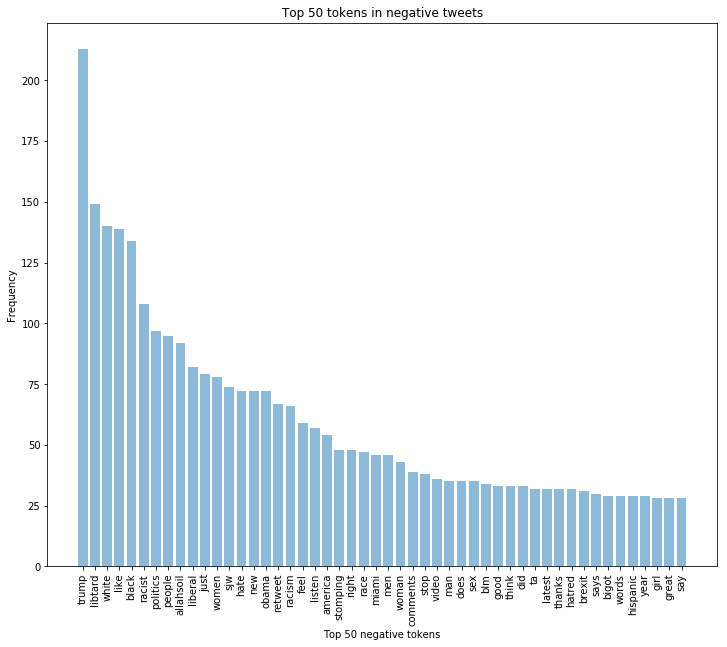

In [156]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

So, as we can see here, these are the 50 most frequent tokens in respect to the hate speech tweet class.

Text(0.5,1,'Top 50 tokens in positive tweets')

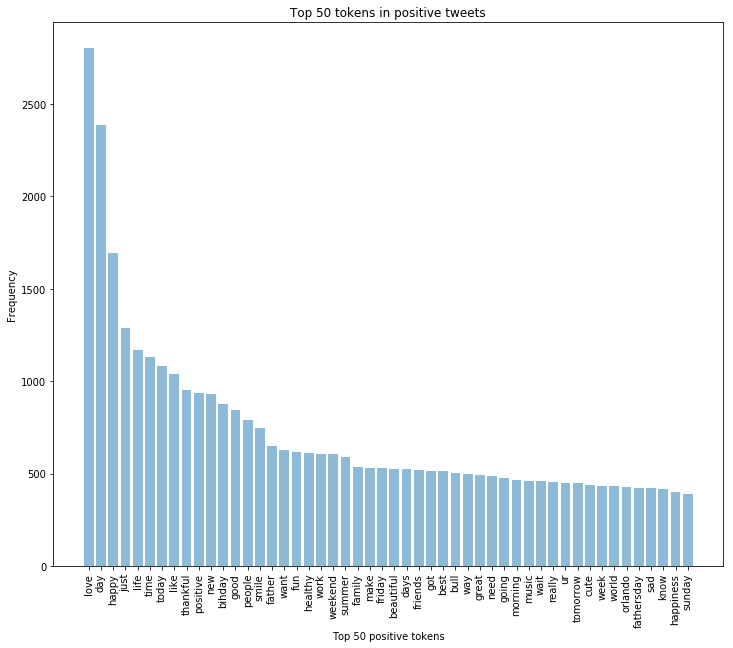

In [157]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

So, as we can see here, these are the 50 most frequent tokens in respect to the non hate speech tweet class.

Text(0.5,1,'Negative Frequency vs Positive Frequency')

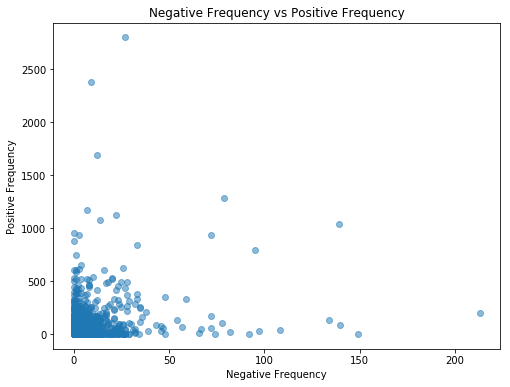

In [158]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In the plot above, my goal was to find if there is some relationship between the frequency in relation to positive and negative tokens. The scale of the plot is not the same in the two axis, so one has to be careful when analyzing this results. 

NOTE: each point represents a token!

NOTE 2: The tokens that are more meaningful are the ones in the 1st and 4th quarter. The point of no significant would be the points in the line y=x. A measure of meaningfulness would be the distance to this line!

Using the metrics for ranking tokens from this (https://www.youtube.com/watch?v=H7X9CA2pWKo) PyData Conference, let’s explore what we can get out of frequency of each token. Intuitively, if a word appears more often in one class compared to another, this can be a good measure of how much the word is meaningful to characterise the class.

I call this the pos_rate, that basically is a measure of how much a token appears in the positive class related to the positive and negative classes.

In [159]:
term_freq_df['pos_rate'] = term_freq_df['positive'] * 1./term_freq_df['total']
term_freq_df.sort_values(by='pos_rate', ascending=False).iloc[:10]

positive  negative  total  pos_rate
aaa                          3         0      3       1.0
internationalyogaday         2         0      2       1.0
international               19         0     19       1.0
internalize                 10         0     10       1.0
smallbiz                     3         0      3       1.0
intern                       2         0      2       1.0
intermarket                  4         0      4       1.0
interiors                    2         0      2       1.0
interiordesign               7         0      7       1.0
interior                     4         0      4       1.0

So the metric above is not really useful, because, as we can see in the table above, this rate can be really high if a word appears few times in the positive class and none on the negative class. 

Given this, I used other metric, pos_freq_pct, that basically measures the frequency in class.

In [160]:
term_freq_df['pos_freq_pct'] = term_freq_df['positive'] * 1./term_freq_df['positive'].sum()
term_freq_df.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

positive  negative  total  pos_rate  pos_freq_pct
love          2801        27   2828  0.990453      0.015467
day           2384         9   2393  0.996239      0.013164
happy         1695        12   1707  0.992970      0.009360
just          1289        79   1368  0.942251      0.007118
life          1169         7   1176  0.994048      0.006455
time          1128        22   1150  0.980870      0.006229
today         1081        14   1095  0.987215      0.005969
like          1041       139   1180  0.882203      0.005748
thankful       952         0    952  1.000000      0.005257
positive       934         3    937  0.996798      0.005158

But since pos_freq_pct is just the frequency scaled over the total sum of the frequency, the rank of pos_freq_pct is exactly same as just the positive frequency.

So, and borrowing again from the metrics used in the PyData Conference in the ScatterText package, I wanted to combine the two metric above. However, the range of the two metric is different. Although they both range in the interval [0, 1] the frequency in-class ranges from [~0.0072, 0] and the pos_rate metric from [0,1]. If I computed the average between the two, one of the metric would have much more weight in the final result than the other. 

“Since the harmonic mean of a list of numbers tends strongly toward the least elements of the list, it tends (compared to the arithmetic mean) to mitigate the impact of large outliers and aggravate the impact of small ones.”

In [161]:
from scipy.stats import hmean
term_freq_df['pos_hmean'] = term_freq_df.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 else 0), axis=1)

In [162]:
term_freq_df.sort_values(by='pos_hmean', ascending=False).iloc[:10]

positive  negative  total  pos_rate  pos_freq_pct  pos_hmean
love          2801        27   2828  0.990453      0.015467   0.030459
day           2384         9   2393  0.996239      0.013164   0.025985
happy         1695        12   1707  0.992970      0.009360   0.018545
just          1289        79   1368  0.942251      0.007118   0.014129
life          1169         7   1176  0.994048      0.006455   0.012827
time          1128        22   1150  0.980870      0.006229   0.012379
today         1081        14   1095  0.987215      0.005969   0.011867
like          1041       139   1180  0.882203      0.005748   0.011422
thankful       952         0    952  1.000000      0.005257   0.010459
positive       934         3    937  0.996798      0.005158   0.010262

The harmonic mean rank seems like the same as pos_freq_pct. By calculating the harmonic mean, the impact of small value (in this case, pos_freq_pct) is too aggravated and ended up dominating the mean value. This is again exactly same as just the frequency value rank and doesn’t provide a much meaningful result.

What we can try next is to get the CDF (Cumulative Distribution Function) (inspiration taken from here: https://svn.spraakdata.gu.se/repos/richard/pub/statnlp2016_web/l3.pdf) value of both pos_rate and pos_freq_pct. CDF can be explained as “distribution function of X, evaluated at x, is the probability that X will take a value less than or equal to x”. By calculating CDF value, we can see where the value of either pos_rate or pos_freq_pct lies in the distribution in terms of cumulative manner. 

In [163]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())
term_freq_df['pos_rate_normcdf'] = normcdf(term_freq_df['pos_rate'])
term_freq_df['pos_freq_pct_normcdf'] = normcdf(term_freq_df['pos_freq_pct'])
term_freq_df['pos_normcdf_hmean'] = hmean([term_freq_df['pos_rate_normcdf'], term_freq_df['pos_freq_pct_normcdf']])
term_freq_df.sort_values(by='pos_normcdf_hmean',ascending=False).iloc[:10]

positive  negative  total  pos_rate  pos_freq_pct  pos_hmean  \
thankful          952         0    952       1.0      0.005257   0.010459   
bihday            874         0    874       1.0      0.004826   0.009606   
weekend           604         0    604       1.0      0.003335   0.006648   
friday            531         0    531       1.0      0.002932   0.005847   
bull              504         0    504       1.0      0.002783   0.005551   
tomorrow          446         0    446       1.0      0.002463   0.004914   
happiness         398         0    398       1.0      0.002198   0.004386   
affirmation       364         0    364       1.0      0.002010   0.004012   
amazing           332         0    332       1.0      0.001833   0.003660   
gold              319         0    319       1.0      0.001762   0.003517   

             pos_rate_normcdf  pos_freq_pct_normcdf  pos_normcdf_hmean  
thankful             0.679588              1.000000           0.809232  
bihday               0.679588              1.000000           0.809232  
weekend              0.679588              1.000000           0.809232  
friday               0.679588              1.000000           0.809232  
bull                 0.679588              1.000000           0.809232  
tomorrow             0.679588              1.000000           0.809232  
happiness            0.679588              1.000000           0.809232  
affirmation          0.679588              1.000000           0.809232  
amazing              0.679588              0.999998           0.809231  
gold                 0.679588              0.999995           0.809231

We can see that the word “thankful” with pos_rate_normcdf of 0.679588, and pos_freq_pct_normcdf of 0.999354. This means that about 67.96% of the tokens will take a pos_rate value less than or equal to 1.

In [164]:
term_freq_df['neg_rate'] = term_freq_df['negative'] * 1./term_freq_df['total']
term_freq_df['neg_freq_pct'] = term_freq_df['negative'] * 1./term_freq_df['negative'].sum()
term_freq_df['neg_hmean'] = term_freq_df.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])                                                                if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0                                                                else 0), axis=1)
                                                       
term_freq_df['neg_rate_normcdf'] = normcdf(term_freq_df['neg_rate'])
term_freq_df['neg_freq_pct_normcdf'] = normcdf(term_freq_df['neg_freq_pct'])
term_freq_df['neg_normcdf_hmean'] = hmean([term_freq_df['neg_rate_normcdf'], term_freq_df['neg_freq_pct_normcdf']])
term_freq_df.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

positive  negative  total  pos_rate  pos_freq_pct  pos_hmean  \
sjw                0        74     74  0.000000      0.000000   0.000000   
allahsoil          0        92     92  0.000000      0.000000   0.000000   
sikh               0        27     27  0.000000      0.000000   0.000000   
paladino           0        27     27  0.000000      0.000000   0.000000   
libtard            3       149    152  0.019737      0.000017   0.000033   
condemns           0        26     26  0.000000      0.000000   0.000000   
teambts            0        26     26  0.000000      0.000000   0.000000   
vandalised         0        26     26  0.000000      0.000000   0.000000   
wso                0        26     26  0.000000      0.000000   0.000000   
hispanic           1        29     30  0.033333      0.000006   0.000011   

            pos_rate_normcdf  pos_freq_pct_normcdf  pos_normcdf_hmean  \
sjw                 0.000012              0.394995           0.000023   
allahsoil           0.000012              0.394995           0.000023   
sikh                0.000012              0.394995           0.000023   
paladino            0.000012              0.394995           0.000023   
libtard             0.000017              0.412077           0.000035   
condemns            0.000012              0.394995           0.000023   
teambts             0.000012              0.394995           0.000023   
vandalised          0.000012              0.394995           0.000023   
wso                 0.000012              0.394995           0.000023   
hispanic            0.000023              0.400668           0.000046   

            neg_rate  neg_freq_pct  neg_hmean  neg_rate_normcdf  \
sjw         1.000000      0.005189   0.010324          0.999988   
allahsoil   1.000000      0.006451   0.012820          0.999988   
sikh        1.000000      0.001893   0.003779          0.999988   
paladino    1.000000      0.001893   0.003779          0.999988   
libtard     0.980263      0.010448   0.020676          0.999983   
condemns    1.000000      0.001823   0.003640          0.999988   
teambts     1.000000      0.001823   0.003640          0.999988   
vandalised  1.000000      0.001823   0.003640          0.999988   
wso         1.000000      0.001823   0.003640          0.999988   
hispanic    0.966667      0.002034   0.004058          0.999977   

            neg_freq_pct_normcdf  neg_normcdf_hmean  
sjw                     1.000000           0.999994  
allahsoil               1.000000           0.999994  
sikh                    0.999996           0.999992  
paladino                0.999996           0.999992  
libtard                 1.000000           0.999991  
condemns                0.999991           0.999990  
teambts                 0.999991           0.999990  
vandalised              0.999991           0.999990  
wso                     0.999991           0.999990  
hispanic                0.999999           0.999988

So lets try to plot the negative harmonic mean and the positive harmonic mean:

Text(0.5,1,'neg_hmean vs pos_hmean')

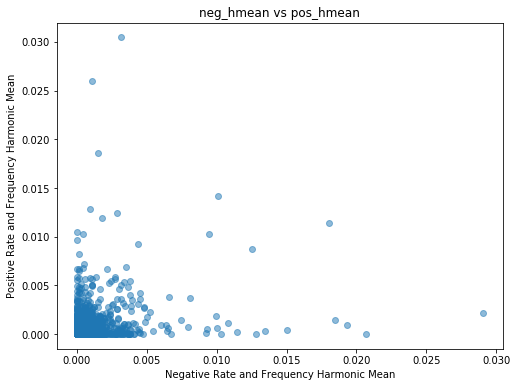

In [168]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

As we can see, although now the scales on each axis will be the same, there is not many meaninful insights that can bbe extracted from here.

Now lets try to plot the harmonic mean of the normalized CDF of the positive and negative samples:

Text(0.5,1,'neg_normcdf_hmean vs pos_normcdf_hmean')

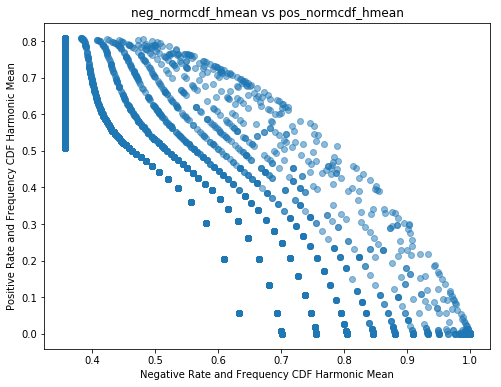

In [169]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

So finally, we can see that there is a relationship between the positive and negative samples. Each data point represents a token, and tokens in the first quarter are the most significant in terms of "positivity", and the data points in the fourth quarter are the most significant in terms of "negativity".

A more interactive plot can be seen below:

In [166]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(term_freq_df.pos_normcdf_hmean), high=max(term_freq_df.pos_normcdf_hmean))
p = figure(x_axis_label='neg_normcdf_hmean', y_axis_label='pos_normcdf_hmean')
p.circle('neg_normcdf_hmean','pos_normcdf_hmean',size=5,alpha=0.3,source=term_freq_df,color={'field': 'pos_normcdf_hmean', 'transform': color_mapper})
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)

Loading BokehJS ...

## Algorithmic Part

### Logistic Regression + TF-IDF Vectorization (n_features=[1000, ..., 10000], ngram_range=[N/A, (1,2), (1,3))

LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
accuracy score: 94.68%
f1-score score: 67.01%
train and test time: 0.88s
--------------------------------------------------------------------------------
Validation result for 20000 features
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
accuracy score: 95.50%
f1-score score: 70.17%
train and test time: 0.81s
--------------------------------------------------------------------------------
Validation result for 30000 features
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
accuracy score: 95.77%
f1-score score: 71.77%
train and test time: 0.93s
--------------------------------------------------------

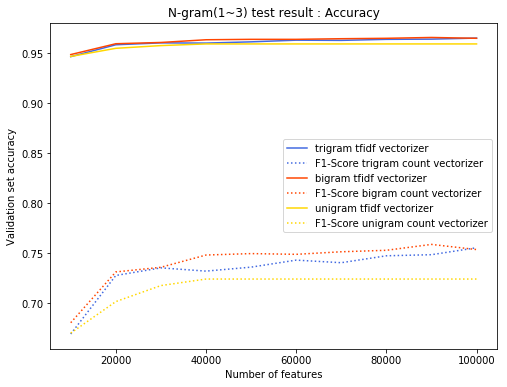

In [225]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

x_train, x_valid, y_train, y_valid = train_test_split(train_data.new_tweet, train_data.label, test_size=0.15)

def accuracy_summary(pipeline, x_train, y_train, x_valid, y_valid):
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_valid)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_valid, y_pred)
    print(type(y_valid))
    print(type(y_pred))
    f1_scores = f1_score(y_valid, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    print("f1-score score: {0:.2f}%".format(f1_scores*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, f1_scores, train_test_time

cvec = CountVectorizer()
lr = LogisticRegression(C=10, class_weight="balanced")
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print((classifier))
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,nfeature_f1score,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_valid, y_valid)
        result.append((n,nfeature_accuracy,nfeature_f1score,tt_time))
    return result

from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(sublinear_tf=True)

feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))


nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','f1_score','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','f1_score','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','f1_score','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.f1_score,label='F1-Score trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.f1_score,label='F1-Score bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.f1_score, label='F1-Score unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [227]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(lr, open(filename, 'wb'))

### Classifier comparison, using bi-grams and n_features = 10000

In [200]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(C=10,class_weight="balanced"),
    LinearSVC(C=10,class_weight="balanced"),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(C=10,class_weight="balanced"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(class_weight="balanced"),
    AdaBoostClassifier(),
    Perceptron(class_weight="balanced"),
    RandomForestClassifier(class_weight="balanced"),
    PassiveAggressiveClassifier(class_weight="balanced"),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

tvec = TfidfVectorizer(sublinear_tf=True)
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 3), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print("F1-Score result for {}".format(n))
        print(c)
        clf_accuracy,clf_f1_score,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_valid, y_valid)
        result.append((n,clf_accuracy,clf_f1_score,tt_time))
    return result

trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))

Validation result for Logistic Regression
F1-Score result for Logistic Regression
LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
accuracy score: 96.18%
f1-score score: 72.83%
train and test time: 3.48s
--------------------------------------------------------------------------------
Validation result for Linear SVC
F1-Score result for Linear SVC
LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
accuracy score: 96.32%
f1-score score: 69.99%
train and test time: 5.08s
-----------------

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
accuracy score: 35.32%
f1-score score: 11.66%
train and test time: 25.63s
--------------------------------------------------------------------------------
Validation result for AdaBoost
F1-Score result for AdaBoost
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
accuracy score: 94.82%
f1-score score: 50.08%
train and test time: 7.68s
--------------------------------------------------------------------------------
Validation result for Perceptron
F1-Score result for Perceptron
Perceptron(alpha=0.0001, class_weight='balanced', eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_jobs=1,
      penalty=None, random_state=0, shuffle=True, tol=None, verbose=0,
      warm_start=False)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
accuracy score: 92.63%
f1-score score: 60.12%
train and test time: 3.29s
--------------------------------------------------------------------------------
Validation result for Passive-Aggresive
F1-Score result for Passive-Aggresive
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
accuracy score: 95.42%
f1-score score: 51.73%
train and test time: 8.26s
--------------------------------------------------------------------------------
Validation result for Nearest Centroid
F1-Score result for Nearest 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
accuracy score: 96.03%
f1-score score: 70.12%
train and test time: 3.14s
--------------------------------------------------------------------------------


One thing that would be interesting, is to use the VotingClassifier() from sklearn package to combine different classifier into one. Maybe next time...

## Doc2Vec

In [173]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
import multiprocessing
from sklearn import utils

def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(LabeledSentence(t.split(), [prefix + '_%s' % i]))
    return result

x_test = test_data["new_tweet"]
  
all_x = pd.concat([x_train,x_valid,x_test])
all_x_w2v = labelize_tweets_ug(all_x, 'all')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  if sys.path[0] == '':


### Doc2Vec (Distributed Bag-Of-Words) + Logistic Regression

In [174]:
from sklearn.linear_model import LogisticRegression

cores = multiprocessing.cpu_count()
model_ug_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dbow.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dbow.alpha -= 0.002
    model_ug_dbow.min_alpha = model_ug_dbow.alpha
    
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
        n += 1
    return vecs

train_vecs_dbow = get_vectors(model_ug_dbow, x_train, 100)
validation_vecs_dbow = get_vectors(model_ug_dbow, x_valid, 100)

clf = LogisticRegression(C=10, class_weight="balanced")
clf.fit(train_vecs_dbow, y_train)
from sklearn.metrics import accuracy_score, f1_score
predictions = clf.predict(validation_vecs_dbow)
print(f1_score(predictions, y_valid))
clf.score(validation_vecs_dbow, y_valid)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/models/doc2vec.py:535: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 49159/49159 [00:00<00:00, 2041463.27it/s]


0.3587670540677109


0.8015016424213984

### Doc2Vec (Distributed Memory Concatenated) + Logistic Regression

In [175]:
cores = multiprocessing.cpu_count()
model_ug_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dmc.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dmc.alpha -= 0.002
    model_ug_dmc.min_alpha = model_ug_dmc.alpha
   
train_vecs_dmc = get_vectors(model_ug_dmc, x_train, 100)
validation_vecs_dmc = get_vectors(model_ug_dmc, x_valid, 100)

clf = LogisticRegression(C=10, class_weight="balanced")
clf.fit(train_vecs_dmc, y_train)
from sklearn.metrics import accuracy_score, f1_score
predictions = clf.predict(validation_vecs_dbow)
print(f1_score(predictions, y_valid))
clf.score(validation_vecs_dbow, y_valid)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/models/doc2vec.py:535: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 49159/49159 [00:00<00:00, 2017019.39it/s]


0.2938388625592417


0.8601595495072736

### Doc2Vec (Distributed Memory Mean) + Logistic Regression

In [176]:
cores = multiprocessing.cpu_count()
model_ug_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dmm.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dmm.alpha -= 0.002
    model_ug_dmm.min_alpha = model_ug_dmm.alpha
    
train_vecs_dmm = get_vectors(model_ug_dmm, x_train, 100)
validation_vecs_dmm = get_vectors(model_ug_dmm, x_valid, 100)

clf = LogisticRegression(C=10, class_weight="balanced")
clf.fit(train_vecs_dmm, y_train)
clf.score(validation_vecs_dmm, y_valid)
from sklearn.metrics import accuracy_score, f1_score
predictions = clf.predict(validation_vecs_dbow)
print(f1_score(predictions, y_valid))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/models/doc2vec.py:535: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 49159/49159 [00:00<00:00, 2159418.85it/s]


0.16710353866317168


### Doc2Vec (DMC+DBOW) + Logistic Regression

In [177]:
def get_concat_vectors(model1,model2, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
        n += 1
    return vecs

train_vecs_dbow_dmc = get_concat_vectors(model_ug_dbow,model_ug_dmc, x_train, 200)
validation_vecs_dbow_dmc = get_concat_vectors(model_ug_dbow,model_ug_dmc, x_valid, 200)

clf = LogisticRegression(C=10, class_weight="balanced")
clf.fit(train_vecs_dbow_dmc, y_train)
clf.score(validation_vecs_dbow_dmc, y_valid)
from sklearn.metrics import accuracy_score, f1_score
predictions = clf.predict(validation_vecs_dbow_dmc)
print(f1_score(predictions, y_valid))

0.35840484603735484


### Aritificial Neural Network (Keras) + TF-IDF

In [178]:
seed = 7
np.random.seed(seed)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [179]:
def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            counter=0

In [180]:
from keras import backend as K

def f1(y_true, y_pred):
    
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec1 = TfidfVectorizer(sublinear_tf=True,max_features=100000,ngram_range=(1, 3))
tvec1.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [182]:
x_train_tfidf = tvec1.transform(x_train)
x_validation_tfidf = tvec1.transform(x_valid).toarray()

In [184]:
model_s_2 = Sequential()
model_s_2.add(Dense(128, activation='relu', input_dim=100000))
model_s_2.add(Dense(1, activation='sigmoid'))
model_s_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1])

model_s_2.fit(x_train_tfidf, y_train, 256,
                    epochs=10, validation_data=(x_validation_tfidf, y_valid), class_weight={0: 0.5377187079407806, 1: 7.128010704727921})

Train on 25569 samples, validate on 6393 samples
Epoch 1/10
25569/25569 [==============================] - 68s 3ms/step - loss: 0.5391 - acc: 0.8316 - f1: 0.4518 - val_loss: 0.3307 - val_acc: 0.9007 - val_f1: 0.5467
Epoch 2/10
25569/25569 [==============================] - 71s 3ms/step - loss: 0.1795 - acc: 0.9615 - f1: 0.7773 - val_loss: 0.1773 - val_acc: 0.9348 - val_f1: 0.6273
Epoch 3/10
25569/25569 [==============================] - 70s 3ms/step - loss: 0.0674 - acc: 0.9847 - f1: 0.8996 - val_loss: 0.1385 - val_acc: 0.9473 - val_f1: 0.6606
Epoch 4/10
25569/25569 [==============================] - 65s 3ms/step - loss: 0.0348 - acc: 0.9929 - f1: 0.9509 - val_loss: 0.1253 - val_acc: 0.9498 - val_f1: 0.6579
Epoch 5/10
25569/25569 [==============================] - 67s 3ms/step - loss: 0.0215 - acc: 0.9953 - f1: 0.9658 - val_loss: 0.1259 - val_acc: 0.9506 - val_f1: 0.6613
Epoch 6/10
25569/25569 [==============================] - 68s 3ms/step - loss: 0.0146 - acc: 0.9969 - f1: 0.9782 - v

In [185]:
model_s_2 = Sequential()
model_s_2.add(Dense(128, activation='relu', input_dim=100000))
model_s_2.add(Dense(64, activation='relu'))
model_s_2.add(Dense(1, activation='sigmoid'))
model_s_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1])

model_s_2.fit(x_train_tfidf, y_train, 256,
                    epochs=10, validation_data=(x_validation_tfidf, y_valid), class_weight={0: 0.5377187079407806, 1: 7.128010704727921})

Train on 25569 samples, validate on 6393 samples
Epoch 1/10
25569/25569 [==============================] - 66s 3ms/step - loss: 0.4624 - acc: 0.8814 - f1: 0.4513 - val_loss: 0.2823 - val_acc: 0.8792 - val_f1: 0.5020
Epoch 2/10
25569/25569 [==============================] - 64s 2ms/step - loss: 0.0705 - acc: 0.9736 - f1: 0.8378 - val_loss: 0.1398 - val_acc: 0.9487 - val_f1: 0.6554
Epoch 3/10
25569/25569 [==============================] - 63s 2ms/step - loss: 0.0159 - acc: 0.9952 - f1: 0.9662 - val_loss: 0.1481 - val_acc: 0.9528 - val_f1: 0.6674
Epoch 4/10
25569/25569 [==============================] - 63s 2ms/step - loss: 0.0069 - acc: 0.9977 - f1: 0.9841 - val_loss: 0.1557 - val_acc: 0.9546 - val_f1: 0.6601
Epoch 5/10
25569/25569 [==============================] - 65s 3ms/step - loss: 0.0041 - acc: 0.9988 - f1: 0.9916 - val_loss: 0.1654 - val_acc: 0.9546 - val_f1: 0.6691
Epoch 6/10
25569/25569 [==============================] - 61s 2ms/step - loss: 0.0029 - acc: 0.9993 - f1: 0.9942 - v

In [186]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=100000))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1])

model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
                    epochs=5, validation_data=(x_validation_tfidf, y_valid),
                    steps_per_epoch=x_train_tfidf.shape[0]/32, class_weight={0: 0.5377187079407806, 1: 7.128010704727921})

Epoch 1/5
800/799 [==============================] - 127s 158ms/step - loss: 0.4072 - acc: 0.8565 - f1: 0.4034 - val_loss: 0.2605 - val_acc: 0.8792 - val_f1: 0.0599
Epoch 2/5
800/799 [==============================] - 125s 156ms/step - loss: 0.0803 - acc: 0.9704 - f1: 0.7579 - val_loss: 0.1625 - val_acc: 0.9354 - val_f1: 0.0529
Epoch 3/5
800/799 [==============================] - 127s 158ms/step - loss: 0.0263 - acc: 0.9918 - f1: 0.8521 - val_loss: 0.1467 - val_acc: 0.9468 - val_f1: 0.0504
Epoch 4/5
800/799 [==============================] - 121s 151ms/step - loss: 0.0132 - acc: 0.9966 - f1: 0.8788 - val_loss: 0.1486 - val_acc: 0.9498 - val_f1: 0.0491
Epoch 5/5
800/799 [==============================] - 123s 154ms/step - loss: 0.0080 - acc: 0.9982 - f1: 0.8860 - val_loss: 0.1538 - val_acc: 0.9510 - val_f1: 0.0486


In [187]:
from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(x_train_tfidf)
x_train_tfidf_norm = norm.transform(x_train_tfidf)
x_validation_tfidf_norm = norm.transform(x_validation_tfidf)

In [188]:
model_n = Sequential()
model_n.add(Dense(64, activation='relu', input_dim=100000))
model_n.add(Dense(1, activation='sigmoid'))
model_n.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1])

model_n.fit_generator(generator=batch_generator(x_train_tfidf_norm, y_train, 32),
                    epochs=5, validation_data=(x_validation_tfidf_norm, y_valid),
                    steps_per_epoch=x_train_tfidf_norm.shape[0]/32, class_weight={0: 0.5377187079407806, 1: 7.128010704727921})

Epoch 1/5
800/799 [==============================] - 118s 147ms/step - loss: 0.4091 - acc: 0.8553 - f1: 0.4015 - val_loss: 0.2601 - val_acc: 0.8811 - val_f1: 0.0598
Epoch 2/5
800/799 [==============================] - 119s 149ms/step - loss: 0.0806 - acc: 0.9705 - f1: 0.7579 - val_loss: 0.1612 - val_acc: 0.9366 - val_f1: 0.0535
Epoch 3/5
800/799 [==============================] - 117s 146ms/step - loss: 0.0258 - acc: 0.9918 - f1: 0.8523 - val_loss: 0.1460 - val_acc: 0.9467 - val_f1: 0.0501
Epoch 4/5
800/799 [==============================] - 111s 139ms/step - loss: 0.0128 - acc: 0.9968 - f1: 0.8797 - val_loss: 0.1483 - val_acc: 0.9498 - val_f1: 0.0491
Epoch 5/5
800/799 [==============================] - 112s 140ms/step - loss: 0.0079 - acc: 0.9982 - f1: 0.8864 - val_loss: 0.1535 - val_acc: 0.9512 - val_f1: 0.0486


In [189]:
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_dim=100000))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',f1])

model1.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
                    epochs=5, validation_data=(x_validation_tfidf, y_valid),
                    steps_per_epoch=x_train_tfidf.shape[0]/32, class_weight={0: 0.5377187079407806, 1: 7.128010704727921})

Epoch 1/5
800/799 [==============================] - 120s 150ms/step - loss: 0.4240 - acc: 0.8569 - f1: 0.3986 - val_loss: 0.2520 - val_acc: 0.8846 - val_f1: 0.0593
Epoch 2/5
800/799 [==============================] - 115s 144ms/step - loss: 0.1057 - acc: 0.9602 - f1: 0.7134 - val_loss: 0.1755 - val_acc: 0.9280 - val_f1: 0.0546
Epoch 3/5
800/799 [==============================] - 115s 143ms/step - loss: 0.0374 - acc: 0.9882 - f1: 0.8341 - val_loss: 0.1466 - val_acc: 0.9446 - val_f1: 0.0505
Epoch 4/5
800/799 [==============================] - 113s 142ms/step - loss: 0.0180 - acc: 0.9950 - f1: 0.8699 - val_loss: 0.1459 - val_acc: 0.9504 - val_f1: 0.0491
Epoch 5/5
800/799 [==============================] - 114s 143ms/step - loss: 0.0111 - acc: 0.9974 - f1: 0.8827 - val_loss: 0.1504 - val_acc: 0.9499 - val_f1: 0.0480


In [190]:
def batch_generator_shuffle(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    np.random.shuffle(index)
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            np.random.shuffle(index)
            counter=0

In [191]:
model_s = Sequential()
model_s.add(Dense(64, activation='relu', input_dim=100000))
model_s.add(Dense(1, activation='sigmoid'))
model_s.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1])

model_s.fit_generator(generator=batch_generator_shuffle(x_train_tfidf, y_train, 32),
                    epochs=5, validation_data=(x_validation_tfidf, y_valid),
                    steps_per_epoch=x_train_tfidf.shape[0]/32, class_weight={0: 0.5377187079407806, 1: 7.128010704727921})

Epoch 1/5
800/799 [==============================] - 115s 144ms/step - loss: 0.4092 - acc: 0.8205 - f1: 0.3869 - val_loss: 0.2532 - val_acc: 0.8910 - val_f1: 0.0616
Epoch 2/5
800/799 [==============================] - 116s 145ms/step - loss: 0.0800 - acc: 0.9709 - f1: 0.7505 - val_loss: 0.1417 - val_acc: 0.9448 - val_f1: 0.0502
Epoch 3/5
800/799 [==============================] - 114s 142ms/step - loss: 0.0269 - acc: 0.9917 - f1: 0.8500 - val_loss: 0.1402 - val_acc: 0.9487 - val_f1: 0.0483
Epoch 4/5
800/799 [==============================] - 114s 143ms/step - loss: 0.0132 - acc: 0.9966 - f1: 0.8671 - val_loss: 0.1398 - val_acc: 0.9539 - val_f1: 0.0461
Epoch 5/5
800/799 [==============================] - 115s 144ms/step - loss: 0.0074 - acc: 0.9982 - f1: 0.8936 - val_loss: 0.1530 - val_acc: 0.9506 - val_f1: 0.0482


In [192]:
model_s_1 = Sequential()
model_s_1.add(Dense(64, activation='relu', input_dim=100000))
model_s_1.add(Dropout(0.2))
model_s_1.add(Dense(1, activation='sigmoid'))
model_s_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1])

model_s_1.fit_generator(generator=batch_generator_shuffle(x_train_tfidf, y_train, 32),
                    epochs=5, validation_data=(x_validation_tfidf, y_valid),
                    steps_per_epoch=x_train_tfidf.shape[0]/32, class_weight={0: 0.5377187079407806, 1: 7.128010704727921})

Epoch 1/5
800/799 [==============================] - 127s 159ms/step - loss: 0.4274 - acc: 0.8582 - f1: 0.3895 - val_loss: 0.2310 - val_acc: 0.8977 - val_f1: 0.0587
Epoch 2/5
800/799 [==============================] - 125s 156ms/step - loss: 0.1075 - acc: 0.9614 - f1: 0.7145 - val_loss: 0.1608 - val_acc: 0.9374 - val_f1: 0.0540
Epoch 3/5
800/799 [==============================] - 123s 153ms/step - loss: 0.0383 - acc: 0.9884 - f1: 0.8355 - val_loss: 0.1418 - val_acc: 0.9463 - val_f1: 0.0496
Epoch 4/5
800/799 [==============================] - 121s 151ms/step - loss: 0.0187 - acc: 0.9946 - f1: 0.8678 - val_loss: 0.1404 - val_acc: 0.9518 - val_f1: 0.0468
Epoch 5/5
800/799 [==============================] - 114s 143ms/step - loss: 0.0112 - acc: 0.9971 - f1: 0.8774 - val_loss: 0.1475 - val_acc: 0.9518 - val_f1: 0.0461


In [193]:
import keras
custom_adam = keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model_testing_2 = Sequential()
model_testing_2.add(Dense(64, activation='relu', input_dim=100000))
model_testing_2.add(Dense(1, activation='sigmoid'))
model_testing_2.compile(optimizer=custom_adam,
              loss='binary_crossentropy',
              metrics=['accuracy', f1])

model_testing_2.fit_generator(generator=batch_generator_shuffle(x_train_tfidf, y_train, 32),
                    epochs=2, validation_data=(x_validation_tfidf, y_valid),
                    steps_per_epoch=x_train_tfidf.shape[0]/32,class_weight={0: 0.5377187079407806, 1: 7.128010704727921})

Epoch 1/2
800/799 [==============================] - 116s 145ms/step - loss: 0.3691 - acc: 0.8459 - f1: 0.3922 - val_loss: 0.2832 - val_acc: 0.8849 - val_f1: 0.0610
Epoch 2/2
800/799 [==============================] - 121s 152ms/step - loss: 0.0498 - acc: 0.9807 - f1: 0.8031 - val_loss: 0.1600 - val_acc: 0.9492 - val_f1: 0.0477


In [194]:
custom_adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model_testing_3 = Sequential()
model_testing_3.add(Dense(64, activation='relu', input_dim=100000))
model_testing_3.add(Dense(1, activation='sigmoid'))
model_testing_3.compile(optimizer=custom_adam,
              loss='binary_crossentropy',
              metrics=['accuracy', f1])

model_testing_3.fit_generator(generator=batch_generator_shuffle(x_train_tfidf, y_train, 32),
                    epochs=2, validation_data=(x_validation_tfidf, y_valid),
                    steps_per_epoch=x_train_tfidf.shape[0]/32, class_weight={0: 0.5377187079407806, 1: 7.128010704727921})


Epoch 1/2
800/799 [==============================] - 128s 161ms/step - loss: 0.3596 - acc: 0.8347 - f1: 0.3941 - val_loss: 0.2538 - val_acc: 0.8910 - val_f1: 0.0588
Epoch 2/2
800/799 [==============================] - 125s 156ms/step - loss: 0.0421 - acc: 0.9860 - f1: 0.8303 - val_loss: 0.1645 - val_acc: 0.9501 - val_f1: 0.0454


In [195]:
from gensim.models import Doc2Vec

def get_concat_vectors(model1,model2, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
        n += 1
    return vecs

### Doc2Vec (D-BOW + DMC)

In [196]:
train_vecs_ugdbow_tgdmm  = get_concat_vectors(model_ug_dbow,model_ug_dmc, x_train, 200)
validation_vecs_ugdbow_tgdmm = get_concat_vectors(model_ug_dbow,model_ug_dmc, x_valid, 200)
print(train_vecs_ugdbow_tgdmm.shape)

(25569, 200)


#### Logistic Regression

In [197]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=10, class_weight="balanced")
clf.fit(train_vecs_ugdbow_tgdmm, y_train)

LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [198]:
from sklearn.metrics import accuracy_score, f1_score
predictions = clf.predict(validation_vecs_ugdbow_tgdmm)
print(f1_score(predictions, y_valid))

0.35840484603735484


#### Neural Network

In [199]:
model_s_2 = Sequential()
model_s_2.add(Dense(128, activation='relu', input_dim=200))
model_s_2.add(Dense(64, activation='relu'))
model_s_2.add(Dense(1, activation='sigmoid'))
model_s_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1])

model_s_2.fit(train_vecs_ugdbow_tgdmm, y_train, 256,
                    epochs=40, validation_data=(validation_vecs_ugdbow_tgdmm, y_valid), class_weight={0: 0.5377187079407806, 1: 7.128010704727921})

Train on 25569 samples, validate on 6393 samples
Epoch 1/40
25569/25569 [==============================] - 1s 42us/step - loss: 0.5315 - acc: 0.7472 - f1: 0.2879 - val_loss: 0.4201 - val_acc: 0.8020 - val_f1: 0.3563
Epoch 2/40
25569/25569 [==============================] - 0s 13us/step - loss: 0.4332 - acc: 0.7915 - f1: 0.3548 - val_loss: 0.4653 - val_acc: 0.7829 - val_f1: 0.3458
Epoch 3/40
25569/25569 [==============================] - 0s 13us/step - loss: 0.4026 - acc: 0.8079 - f1: 0.3779 - val_loss: 0.4117 - val_acc: 0.8093 - val_f1: 0.3639
Epoch 4/40
25569/25569 [==============================] - 0s 13us/step - loss: 0.3734 - acc: 0.8258 - f1: 0.4088 - val_loss: 0.4841 - val_acc: 0.7730 - val_f1: 0.3406
Epoch 5/40
25569/25569 [==============================] - 0s 13us/step - loss: 0.3346 - acc: 0.8413 - f1: 0.4381 - val_loss: 0.4073 - val_acc: 0.8117 - val_f1: 0.3650
Epoch 6/40
25569/25569 [==============================] - 0s 13us/step - loss: 0.2917 - acc: 0.8614 - f1: 0.4816 - v

### Pre-trained Glove + Logistic Regression

In [232]:
import gensim.downloader as api
from sklearn.preprocessing import scale
glove_twitter = api.load("glove-twitter-200")

def get_w2v_general(tweet, size, vectors, aggregation='mean'):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tweet.split():
        try:
            vec += vectors[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if aggregation == 'mean':
        if count != 0:
            vec /= count
        return vec
    elif aggregation == 'sum':
        return vec

train_vecs_glove_mean = scale(np.concatenate([get_w2v_general(z, 200, glove_twitter,'mean') for z in x_train]))
validation_vecs_glove_mean = scale(np.concatenate([get_w2v_general(z, 200, glove_twitter,'mean') for z in x_valid]))
clf = LogisticRegression()
clf.fit(train_vecs_glove_mean, y_train)
print(clf.score(validation_vecs_glove_mean, y_valid))

train_vecs_glove_sum = scale(np.concatenate([get_w2v_general(z, 200, glove_twitter,'sum') for z in x_train]))
validation_vecs_glove_sum = scale(np.concatenate([get_w2v_general(z, 200, glove_twitter,'sum') for z in x_valid]))
clf = LogisticRegression()
clf.fit(train_vecs_glove_sum, y_train)
print(clf.score(validation_vecs_glove_sum, y_valid))

0.9461939520333681
0.948488008342023


In [234]:
print("F1-Score:",f1_score(clf.predict(validation_vecs_glove_sum), y_valid))

F1-Score: 0.5348399246704331


### Pre-trained Glove + Logistic Regression

In [235]:
model_glove = Sequential()
model_glove.add(Dense(128, activation='relu', input_dim=200))
model_glove.add(Dense(64, activation='relu'))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1])

model_s_2.fit(train_vecs_glove_mean, y_train, 256,
                    epochs=40, validation_data=(validation_vecs_glove_mean, y_valid), class_weight={0: 0.5377187079407806, 1: 7.128010704727921})

Train on 27167 samples, validate on 4795 samples
Epoch 1/40
27167/27167 [==============================] - 1s 29us/step - loss: 2.7041 - acc: 0.8048 - f1: 0.3653 - val_loss: 2.1618 - val_acc: 0.8261 - val_f1: 0.4048
Epoch 2/40
27167/27167 [==============================] - 0s 13us/step - loss: 0.9312 - acc: 0.8181 - f1: 0.4157 - val_loss: 0.3969 - val_acc: 0.7314 - val_f1: 0.3193
Epoch 3/40
27167/27167 [==============================] - 0s 13us/step - loss: 0.4173 - acc: 0.8022 - f1: 0.3990 - val_loss: 0.3667 - val_acc: 0.8225 - val_f1: 0.4049
Epoch 4/40
27167/27167 [==============================] - 0s 14us/step - loss: 0.3628 - acc: 0.8377 - f1: 0.4451 - val_loss: 0.3417 - val_acc: 0.8323 - val_f1: 0.4182
Epoch 5/40
27167/27167 [==============================] - 0s 12us/step - loss: 0.3275 - acc: 0.8491 - f1: 0.4614 - val_loss: 0.3060 - val_acc: 0.8509 - val_f1: 0.4435
Epoch 6/40
27167/27167 [==============================] - 0s 11us/step - loss: 0.3031 - acc: 0.8555 - f1: 0.4696 - v

## CNN + Word2Vec

In [236]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils

In [237]:
def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t.split(), [prefix + '_%s' % i]))
    return result

In [239]:
all_x = pd.concat([x_train,x_valid,test_data.new_tweet])
all_x_w2v = labelize_tweets_ug(all_x, 'all')

In [245]:
cores = multiprocessing.cpu_count()
model_ug_cbow = Word2Vec(sg=0, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_cbow.build_vocab([x.words for x in tqdm(all_x_w2v)])
model_ug_sg = Word2Vec(sg=1, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_sg.build_vocab([x.words for x in tqdm(all_x_w2v)])

100%|██████████| 49159/49159 [00:00<00:00, 1598974.72it/s]


In [246]:
for epoch in range(30):
    model_ug_cbow.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_cbow.alpha -= 0.002
    model_ug_cbow.min_alpha = model_ug_cbow.alpha
    model_ug_sg.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_sg.alpha -= 0.002
    model_ug_sg.min_alpha = model_ug_sg.alpha

100%|██████████| 49159/49159 [00:00<00:00, 1544767.11it/s]


In [247]:
len(model_ug_cbow.wv.vocab.keys())

19886

In [248]:
embeddings_index = {}
for w in model_ug_cbow.wv.vocab.keys():
    embeddings_index[w] = np.append(model_ug_cbow.wv[w],model_ug_sg.wv[w])
print('Found %s word vectors.' % len(embeddings_index))

Found 19886 word vectors.


In [249]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

In [250]:
len(tokenizer.word_index)

34043

In [252]:
for x in x_train[:3]:
    print(x)

happy to suppo golf tourney we won th place ontothefinals
happy holidays original idea by flax music production tropicalhouse flax pay vibes reggae swe
this is the worst mass shooting in history when is enough enough gunviolence orlandoshooting


In [253]:
sequences[:3]

[[25, 2, 542, 1525, 8762, 28, 643, 211, 308, 13330],
 [25,
  1082,
  1720,
  1058,
  56,
  8763,
  103,
  2181,
  13331,
  8763,
  178,
  1059,
  3090,
  8764],
 [13, 7, 1, 763, 822, 360, 5, 572, 33, 7, 420, 420, 3346, 764]]

Each word is represented as a number, and we can see that the number of words in each sentence is matching the length of numbers in the "sequences". We can later make connections of which word each number represents. But we still didn't pad our data, so each sentence has varying length. Let's deal with this.

In [254]:
length = []
for x in x_train:
    length.append(len(x.split()))

In [255]:
max(length)

30

In [256]:
x_train_seq = pad_sequences(sequences, maxlen=30)
print('Shape of data tensor:', x_train_seq.shape)

Shape of data tensor: (27167, 30)


In [257]:
x_train_seq[:3]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,    25,     2,   542,  1525,  8762,    28,   643,
          211,   308, 13330],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,    25,  1082,
         1720,  1058,    56,  8763,   103,  2181, 13331,  8763,   178,
         1059,  3090,  8764],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,    13,     7,
            1,   763,   822,   360,     5,   572,    33,     7,   420,
          420,  3346,   764]], dtype=int32)

In [258]:
sequences_val = tokenizer.texts_to_sequences(x_valid)
x_val_seq = pad_sequences(sequences_val, maxlen=30)

In [268]:
num_words = 35000
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [269]:
seed = 7

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [278]:
model_ptw2v = Sequential()
e = Embedding(35000, 200, weights=[embedding_matrix], input_length=30, trainable=False)
model_ptw2v.add(e)
model_ptw2v.add(Flatten())
model_ptw2v.add(Dense(256, activation='relu'))
model_ptw2v.add(Dense(1, activation='sigmoid'))
model_ptw2v.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1])
model_ptw2v.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_valid), epochs=5, batch_size=256, verbose=1, class_weight={0: 0.5377187079407806, 1: 7.128010704727921})

Train on 27167 samples, validate on 4795 samples
Epoch 1/5
27167/27167 [==============================] - 7s 247us/step - loss: 0.3613 - acc: 0.8368 - f1: 0.4386 - val_loss: 0.3688 - val_acc: 0.8380 - val_f1: 0.4352
Epoch 2/5
27167/27167 [==============================] - 6s 208us/step - loss: 0.1602 - acc: 0.9296 - f1: 0.6581 - val_loss: 0.2095 - val_acc: 0.9147 - val_f1: 0.5638
Epoch 3/5
27167/27167 [==============================] - 6s 210us/step - loss: 0.0799 - acc: 0.9658 - f1: 0.8026 - val_loss: 0.1963 - val_acc: 0.9241 - val_f1: 0.5861
Epoch 4/5
27167/27167 [==============================] - 6s 207us/step - loss: 0.0391 - acc: 0.9863 - f1: 0.9100 - val_loss: 0.1549 - val_acc: 0.9512 - val_f1: 0.6585
Epoch 5/5
27167/27167 [==============================] - 5s 200us/step - loss: 0.0158 - acc: 0.9961 - f1: 0.9730 - val_loss: 0.1617 - val_acc: 0.9525 - val_f1: 0.6514


In [279]:
model_ptw2v = Sequential()
e = Embedding(35000, 200, input_length=30)
model_ptw2v.add(e)
model_ptw2v.add(Flatten())
model_ptw2v.add(Dense(256, activation='relu'))
model_ptw2v.add(Dense(256, activation='relu'))
model_ptw2v.add(Dense(1, activation='sigmoid'))
model_ptw2v.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1])
model_ptw2v.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_valid), epochs=10, batch_size=256, verbose=1, class_weight={0: 0.5377187079407806, 1: 7.128010704727921})

Train on 27167 samples, validate on 4795 samples
Epoch 1/10
27167/27167 [==============================] - 21s 782us/step - loss: 0.4690 - acc: 0.7671 - f1: 0.3329 - val_loss: 0.2441 - val_acc: 0.9030 - val_f1: 0.5459
Epoch 2/10
27167/27167 [==============================] - 20s 733us/step - loss: 0.0939 - acc: 0.9653 - f1: 0.7946 - val_loss: 0.1474 - val_acc: 0.9439 - val_f1: 0.6445
Epoch 3/10
27167/27167 [==============================] - 20s 755us/step - loss: 0.0146 - acc: 0.9953 - f1: 0.9672 - val_loss: 0.1478 - val_acc: 0.9560 - val_f1: 0.6713
Epoch 4/10
27167/27167 [==============================] - 20s 730us/step - loss: 0.0028 - acc: 0.9992 - f1: 0.9933 - val_loss: 0.1930 - val_acc: 0.9406 - val_f1: 0.6212
Epoch 5/10
27167/27167 [==============================] - 20s 718us/step - loss: 0.0015 - acc: 0.9995 - f1: 0.9962 - val_loss: 0.1791 - val_acc: 0.9583 - val_f1: 0.6702
Epoch 6/10
27167/27167 [==============================] - 20s 736us/step - loss: 8.6259e-04 - acc: 0.9998 

In [284]:
from keras.layers import Input, Dense, concatenate, Activation, Conv1D, GlobalMaxPooling1D
from keras.models import Model

tweet_input = Input(shape=(30,), dtype='int32')

tweet_encoder = Embedding(35000, 200, weights=[embedding_matrix], input_length=30, trainable=True)(tweet_input)
bigram_branch = Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1)(tweet_encoder)
bigram_branch = GlobalMaxPooling1D()(bigram_branch)
trigram_branch = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1)(tweet_encoder)
trigram_branch = GlobalMaxPooling1D()(trigram_branch)
fourgram_branch = Conv1D(filters=100, kernel_size=4, padding='valid', activation='relu', strides=1)(tweet_encoder)
fourgram_branch = GlobalMaxPooling1D()(fourgram_branch)
merged = concatenate([bigram_branch, trigram_branch, fourgram_branch], axis=1)

merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.2)(merged)
merged = Dense(1)(merged)
output = Activation('sigmoid')(merged)
model = Model(inputs=[tweet_input], outputs=[output])
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy', f1])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
embedding_17 (Embedding)        (None, 30, 200)      7000000     input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 29, 100)      40100       embedding_17[0][0]               
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 28, 100)      60100       embedding_17[0][0]               
__________________________________________________________________________________________________
conv1d_6 (

In [286]:
model.fit(x_train_seq, y_train, batch_size=512, epochs=10,
                     validation_data=(x_val_seq, y_valid), class_weight={0: 0.5377187079407806, 1: 7.128010704727921}, verbose=1)

Train on 27167 samples, validate on 4795 samples
Epoch 1/10
27167/27167 [==============================] - 27s 1ms/step - loss: 4.6032e-04 - acc: 1.0000 - f1: 0.9998 - val_loss: 0.1628 - val_acc: 0.9675 - val_f1: 0.7470
Epoch 2/10
27167/27167 [==============================] - 29s 1ms/step - loss: 4.1569e-04 - acc: 1.0000 - f1: 0.9997 - val_loss: 0.1642 - val_acc: 0.9673 - val_f1: 0.7462
Epoch 3/10
27167/27167 [==============================] - 28s 1ms/step - loss: 3.3416e-04 - acc: 1.0000 - f1: 0.9998 - val_loss: 0.1678 - val_acc: 0.9679 - val_f1: 0.7496
Epoch 4/10
27167/27167 [==============================] - 28s 1ms/step - loss: 3.6029e-04 - acc: 1.0000 - f1: 0.9997 - val_loss: 0.1675 - val_acc: 0.9677 - val_f1: 0.7481
Epoch 5/10
27167/27167 [==============================] - 28s 1ms/step - loss: 3.0528e-04 - acc: 1.0000 - f1: 0.9997 - val_loss: 0.1703 - val_acc: 0.9677 - val_f1: 0.7481
Epoch 6/10
27167/27167 [==============================] - 30s 1ms/step - loss: 2.8849e-04 - acc: